In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Coffee Shop Sales.csv')

In [3]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values_percentage = (missing_values / len(df)) * 100

print(missing_values)
print(missing_values_percentage)

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64
transaction_id      0.0
transaction_date    0.0
transaction_time    0.0
transaction_qty     0.0
store_id            0.0
store_location      0.0
product_id          0.0
unit_price          0.0
product_category    0.0
product_type        0.0
product_detail      0.0
dtype: float64


In [5]:
df_cleaned = df.dropna()
df_cleaned

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [6]:
# Convert 'unit_price' to integer
df['unit_price'] = df['unit_price'].astype(int)

# Inspect the first few rows and columns to check data structure
print(df.head())
print(df.columns)

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1         1/1/2023          7:06:11                2   
1               2         1/1/2023          7:08:56                2   
2               3         1/1/2023          7:14:04                2   
3               4         1/1/2023          7:20:24                1   
4               5         1/1/2023          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32           3              Coffee   
1         5  Lower Manhattan          57           3                 Tea   
2         5  Lower Manhattan          59           4  Drinking Chocolate   
3         5  Lower Manhattan          22           2              Coffee   
4         5  Lower Manhattan          57           3                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

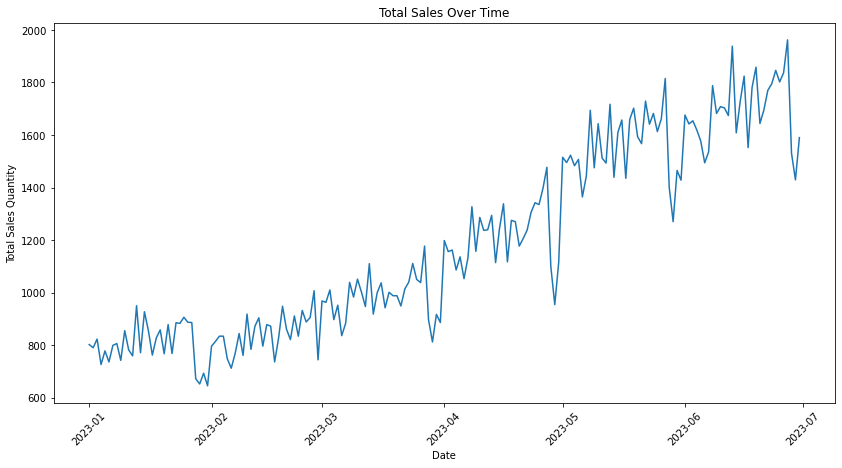

In [7]:
# Convert transaction_date to datetime if not already done
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Aggregate sales by day
df1 = df.groupby('transaction_date')['transaction_qty'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='transaction_date', y='transaction_qty', data=df1)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()

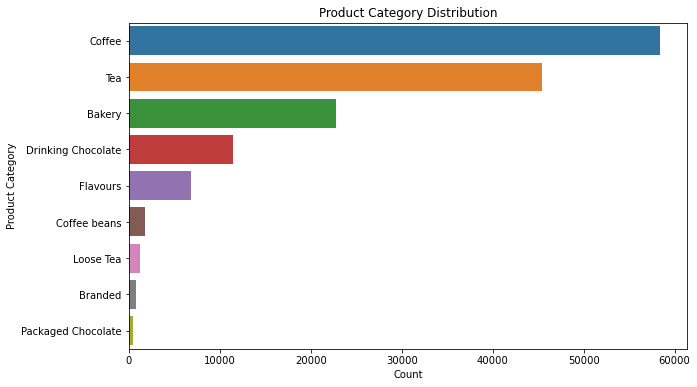

In [8]:
# Product category distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', data=df, order=df['product_category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

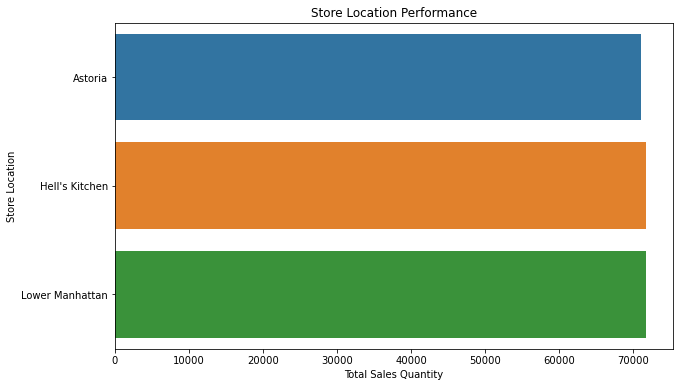

In [9]:
# Store location performance
store_sales = df.groupby('store_location')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_qty', y='store_location', data=store_sales)
plt.title('Store Location Performance')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Store Location')
plt.show()

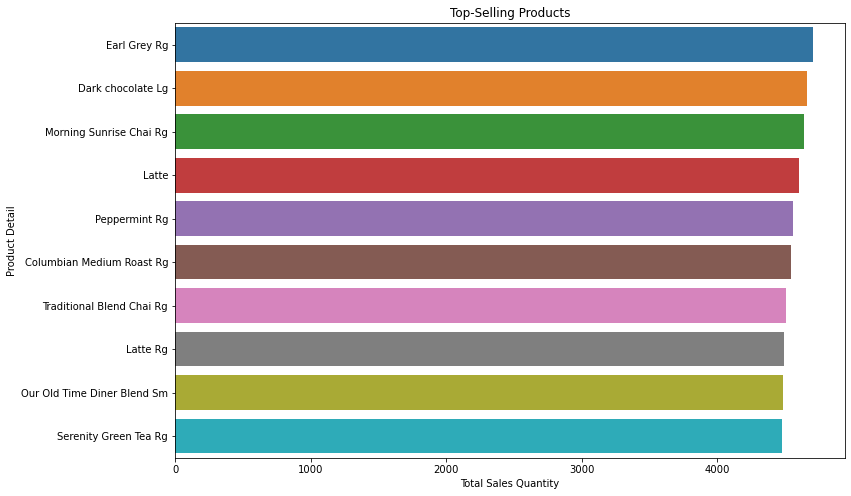

In [10]:
# Top-selling products
top_products = df.groupby('product_detail')['transaction_qty'].sum().reset_index().sort_values(by='transaction_qty', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='transaction_qty', y='product_detail', data=top_products)
plt.title('Top-Selling Products')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Detail')
plt.show()

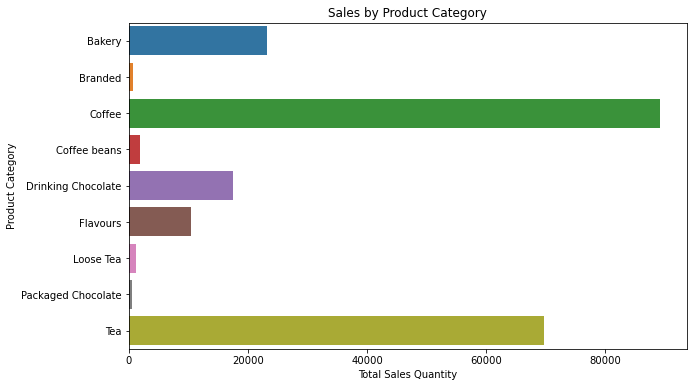

In [11]:
# Sales by product category
category_sales = df.groupby('product_category')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_qty', y='product_category', data=category_sales)
plt.title('Sales by Product Category')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Category')
plt.show()

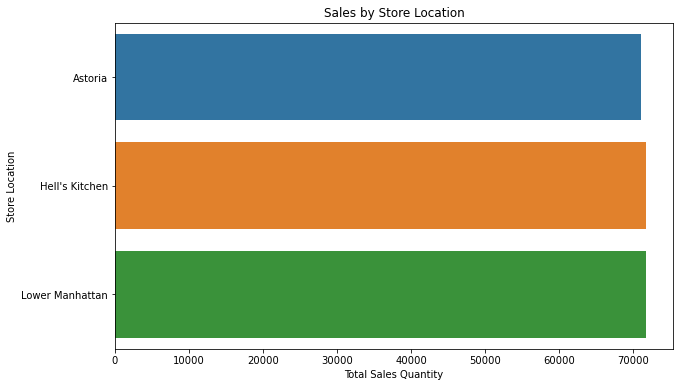

In [12]:
# Sales by store location
location_sales = df.groupby('store_location')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_qty', y='store_location', data=location_sales)
plt.title('Sales by Store Location')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Store Location')
plt.show()

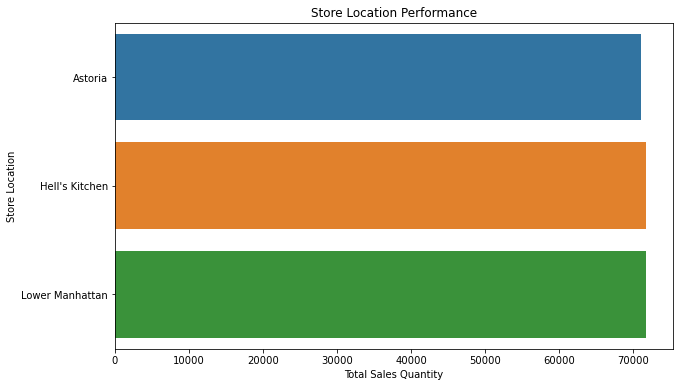

In [13]:
# Store location performance
store_sales = df.groupby('store_location')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_qty', y='store_location', data=store_sales)
plt.title('Store Location Performance')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Store Location')
plt.show()

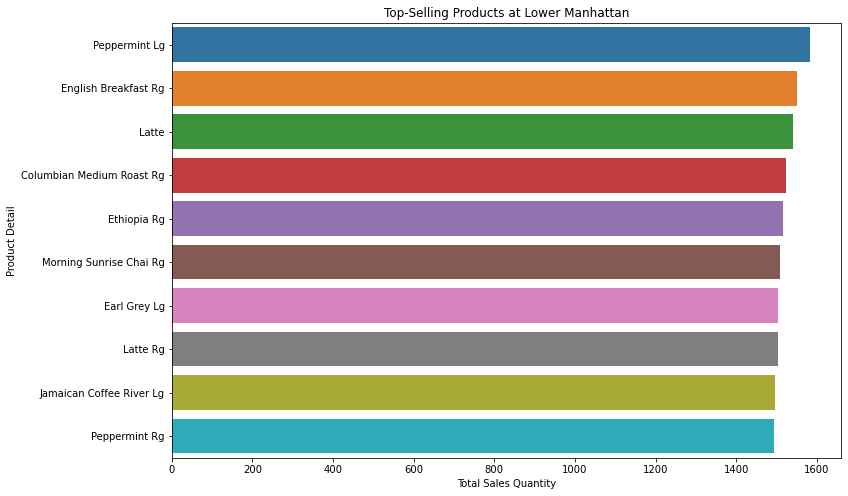

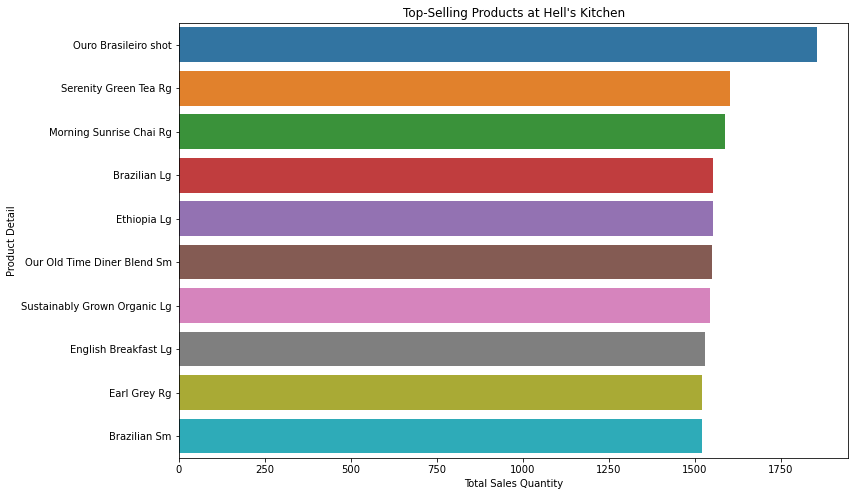

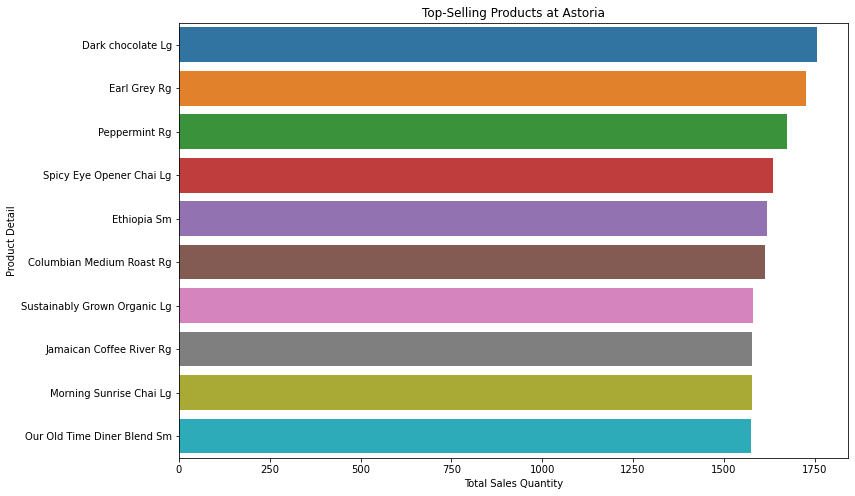

In [14]:
# Best products by store
top_products_by_store = df.groupby(['store_location', 'product_detail'])['transaction_qty'].sum().reset_index()

# Plot best products for each store
for store in df['store_location'].unique():
    store_data = top_products_by_store[top_products_by_store['store_location']
                                       == store].sort_values(by='transaction_qty', ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='transaction_qty', y='product_detail', data=store_data)
    plt.title(f'Top-Selling Products at {store}')
    plt.xlabel('Total Sales Quantity')
    plt.ylabel('Product Detail')
    plt.show()

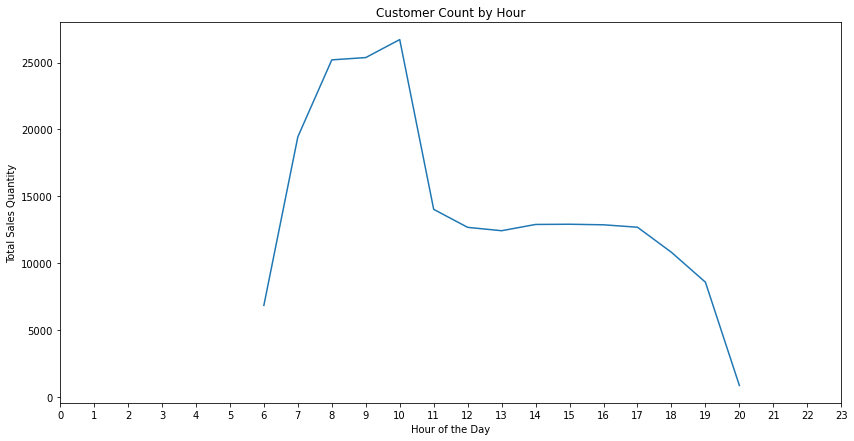

In [15]:
# Extract hour from transaction_time
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['hour'] = df['transaction_time'].dt.hour

# Customer count by hour
customer_count_by_hour = df.groupby('hour')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='transaction_qty', data=customer_count_by_hour)
plt.title('Customer Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(0, 24))
plt.show()

In [16]:
def generate_recommendations(df):
    # Placeholder function for generating recommendations
    recommendations = []

    # Analyzing store performance
    store_sales = df.groupby('store_location')['transaction_qty'].sum().reset_index()
    low_performing_stores = store_sales[store_sales['transaction_qty'] < store_sales['transaction_qty'].mean()]

    for store in low_performing_stores['store_location']:
        recommendations.append(f"Consider promotional campaigns or product diversification for store: {store}")

    # Analyzing best products
    top_products_by_store = df.groupby(['store_location', 'product_detail'])['transaction_qty'].sum().reset_index()
    for store in df['store_location'].unique():
        store_data = top_products_by_store[top_products_by_store['store_location'] == store].sort_values(by='transaction_qty', ascending=False).head(10)
        top_product = store_data.iloc[0]['product_detail']
        recommendations.append(f"Ensure that the top-selling product '{top_product}' is always in stock at store: {store}")

    # Analyzing peak customer times
    customer_count_by_hour = df.groupby('hour')['transaction_qty'].sum().reset_index()
    peak_hour = customer_count_by_hour.loc[customer_count_by_hour['transaction_qty'].idxmax()]['hour']
    recommendations.append(f"Increase staffing and inventory during peak hours (e.g., {peak_hour}:00) to enhance customer satisfaction.")

    return recommendations

recommendations = generate_recommendations(df)
for rec in recommendations:
    print(rec)

Consider promotional campaigns or product diversification for store: Astoria
Ensure that the top-selling product 'Peppermint Lg' is always in stock at store: Lower Manhattan
Ensure that the top-selling product 'Ouro Brasileiro shot' is always in stock at store: Hell's Kitchen
Ensure that the top-selling product 'Dark chocolate Lg' is always in stock at store: Astoria
Increase staffing and inventory during peak hours (e.g., 10:00) to enhance customer satisfaction.


In [17]:
# Customer count by hour
customer_count_by_hour = df.groupby('hour')['transaction_qty'].sum().reset_index()

# Identify the peak hour
peak_hour = customer_count_by_hour.loc[customer_count_by_hour['transaction_qty'].idxmax()]['hour']

print(f"The peak hour is: {peak_hour}")

The peak hour is: 10


In [18]:
# Filter data for the peak hour
peak_hour_data = df[df['hour'] == peak_hour]

# Group by product detail to find the most popular products at the peak hour
popular_products_at_peak_hour = peak_hour_data.groupby('product_detail')['transaction_qty'].sum().reset_index()
popular_products_at_peak_hour = popular_products_at_peak_hour.sort_values(by='transaction_qty', ascending=False)

print(f"Most popular products at peak hour ({peak_hour}):")
print(popular_products_at_peak_hour)


Most popular products at peak hour (10):
            product_detail  transaction_qty
48                Latte Rg              653
31             Ethiopia Lg              617
64           Peppermint Rg              603
11         Chocolate syrup              588
33             Ethiopia Sm              585
..                     ...              ...
70   Spicy Eye Opener Chai               19
42   Jamacian Coffee River               18
22               Earl Grey               16
62              Peppermint               16
77  Traditional Blend Chai               14

[80 rows x 2 columns]


In [19]:
# Merge the peak hour data with the original data to get prices
peak_hour_product_prices = pd.merge(peak_hour_data, df[['store_location', 'product_detail', 'unit_price']],
                                    on=['store_location', 'product_detail'], how='left')

# Get the unique products and their prices for each store
unique_product_prices = peak_hour_product_prices[['store_location', 'product_detail']].drop_duplicates()

print(f"Prices of popular products at peak hour ({peak_hour}) at each store:")
print(unique_product_prices)

Prices of popular products at peak hour (10) at each store:
          store_location            product_detail
0         Hell's Kitchen               Ethiopia Rg
980       Hell's Kitchen  Jamaican Coffee River Lg
1868     Lower Manhattan              Brazilian Rg
2746     Lower Manhattan       Chocolate Croissant
3777     Lower Manhattan               Ethiopia Rg
...                  ...                       ...
3889757   Hell's Kitchen    Traditional Blend Chai
4040146  Lower Manhattan   I Need My Bean! T-shirt
4151194          Astoria       Brazilian - Organic
4772877          Astoria       Organic Decaf Blend
6170433  Lower Manhattan     Jamacian Coffee River

[235 rows x 2 columns]


In [20]:
print(df.head())

   transaction_id transaction_date    transaction_time  transaction_qty  \
0               1       2023-01-01 2024-08-06 07:06:11                2   
1               2       2023-01-01 2024-08-06 07:08:56                2   
2               3       2023-01-01 2024-08-06 07:14:04                2   
3               4       2023-01-01 2024-08-06 07:20:24                1   
4               5       2023-01-01 2024-08-06 07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32           3              Coffee   
1         5  Lower Manhattan          57           3                 Tea   
2         5  Lower Manhattan          59           4  Drinking Chocolate   
3         5  Lower Manhattan          22           2              Coffee   
4         5  Lower Manhattan          57           3                 Tea   

            product_type               product_detail  hour  
0  Gourmet brewed coffee      

In [21]:
# Customer count by hour
customer_count_by_hour = df.groupby('hour')['transaction_qty'].sum().reset_index()

# Identify the peak hour
peak_hour = customer_count_by_hour.loc[customer_count_by_hour['transaction_qty'].idxmax()]['hour']

print(f"The peak hour is: {peak_hour}")

# Filter data for the peak hour
peak_hour_data = df[df['hour'] == peak_hour]

# Group by product detail to find the most popular products at the peak hour
popular_products_at_peak_hour = peak_hour_data.groupby('product_detail')['transaction_qty'].sum().reset_index()
popular_products_at_peak_hour = popular_products_at_peak_hour.sort_values(by='transaction_qty', ascending=False)

print(f"Most popular products at peak hour ({peak_hour}):")
print(popular_products_at_peak_hour)

# Check for the correct price column name
print(df.columns)

# Assuming the price column is named "price" instead of "unit_price"
# Adjust the column name accordingly if it's different in your dataset

# Merge the peak hour data with the original data to get prices
peak_hour_product_prices = pd.merge(peak_hour_data, df[['store_location', 'product_detail', 'unit_price']], 
                                    on=['store_location', 'product_detail'], how='left')

# Get the unique products and their prices for each store
unique_product_prices = peak_hour_product_prices[['store_location', 'product_detail']].drop_duplicates()

print(f"Prices of popular products at peak hour ({peak_hour}) at each store:")
print(unique_product_prices)



The peak hour is: 10
Most popular products at peak hour (10):
            product_detail  transaction_qty
48                Latte Rg              653
31             Ethiopia Lg              617
64           Peppermint Rg              603
11         Chocolate syrup              588
33             Ethiopia Sm              585
..                     ...              ...
70   Spicy Eye Opener Chai               19
42   Jamacian Coffee River               18
22               Earl Grey               16
62              Peppermint               16
77  Traditional Blend Chai               14

[80 rows x 2 columns]
Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'hour'],
      dtype='object')
Prices of popular products at peak hour (10) at each store:
          store_location            product_detail
0         Hell's Kitchen    

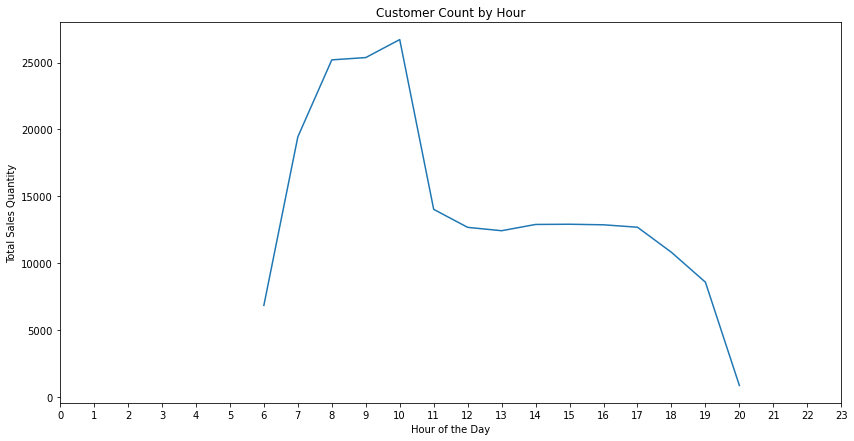

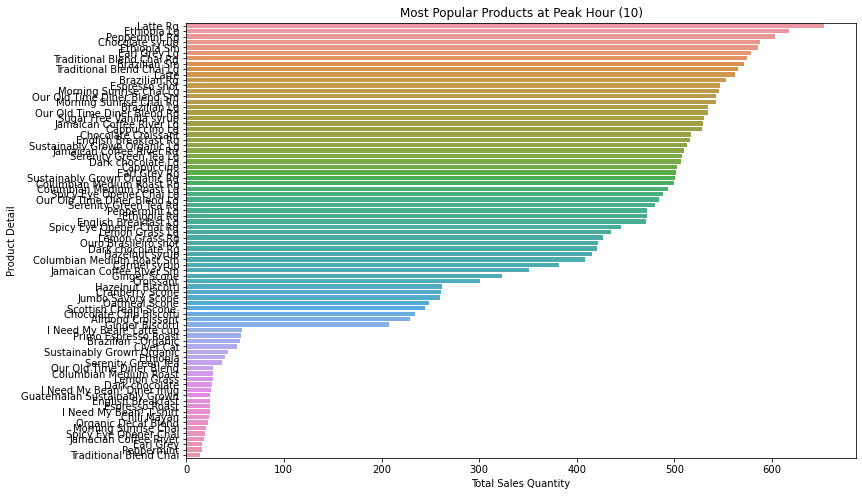

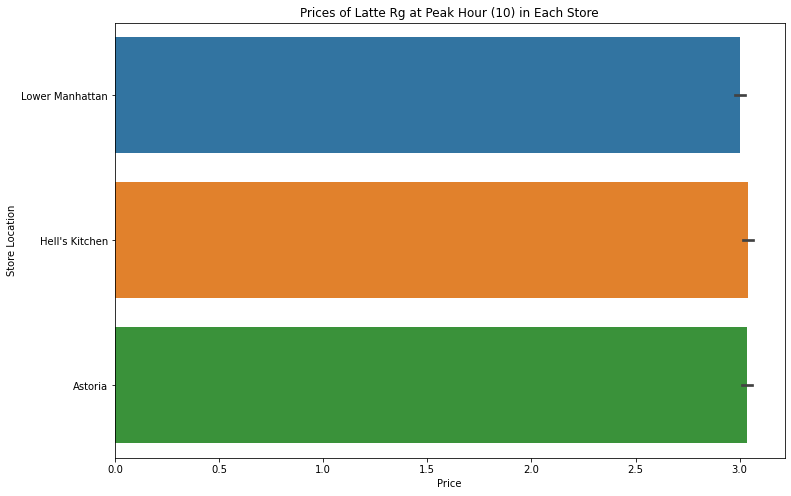

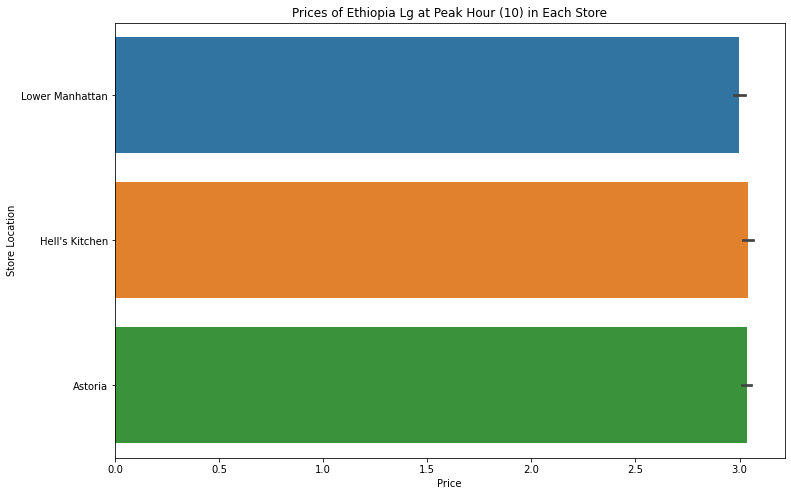

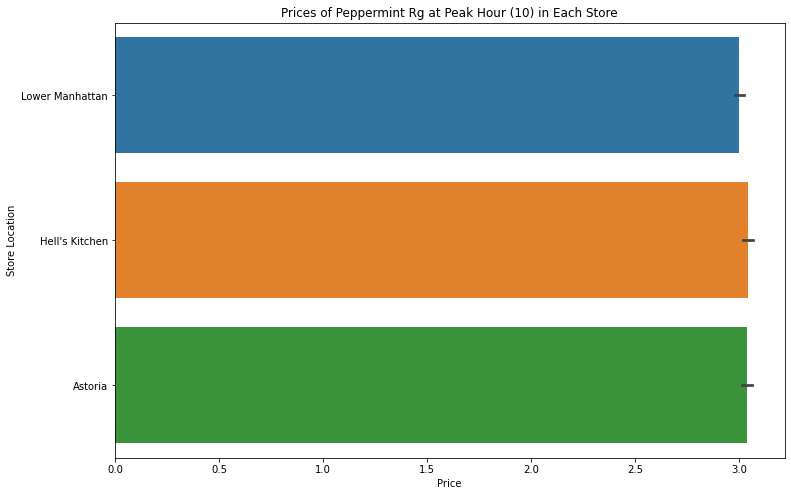

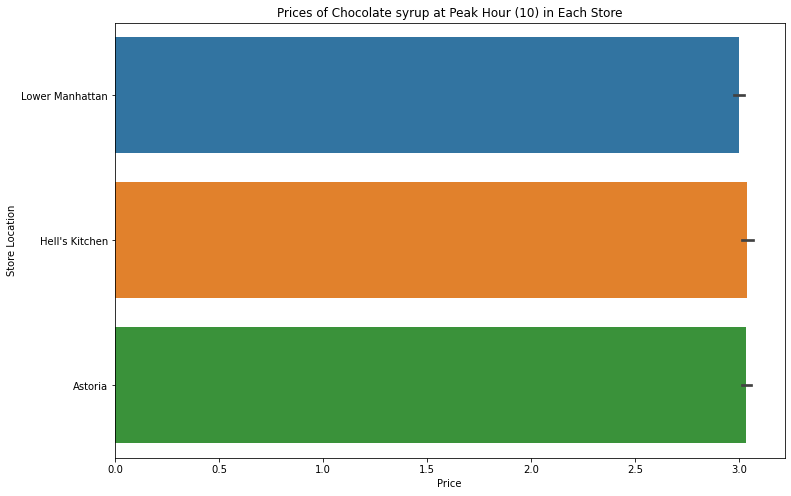

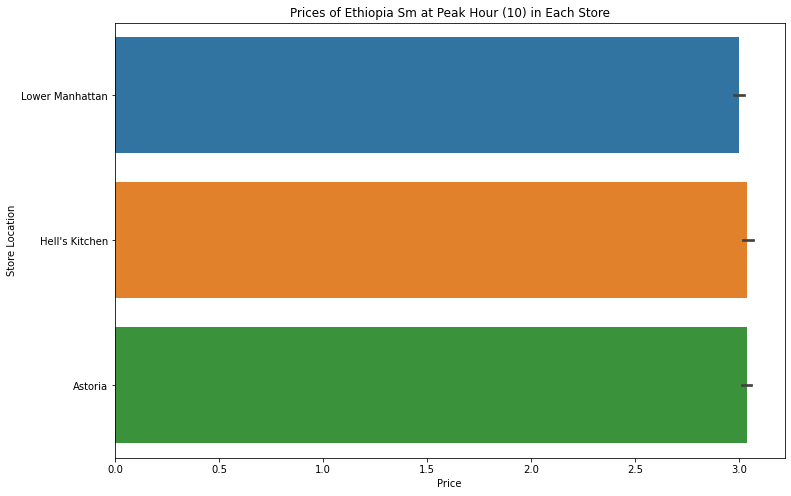

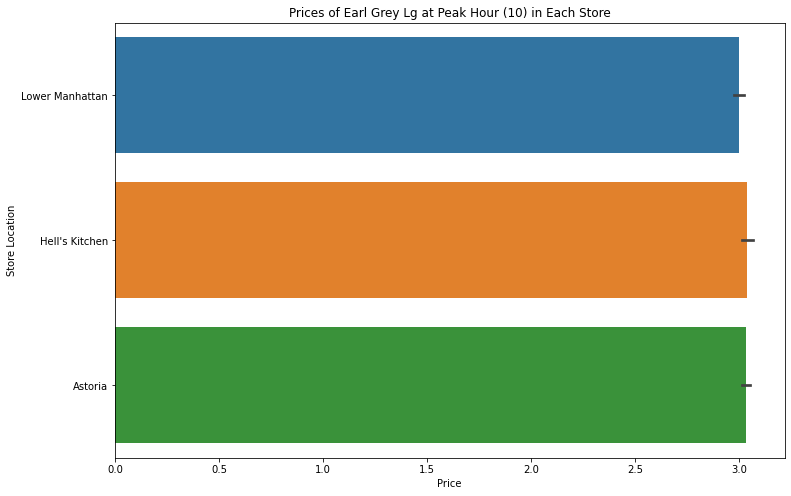

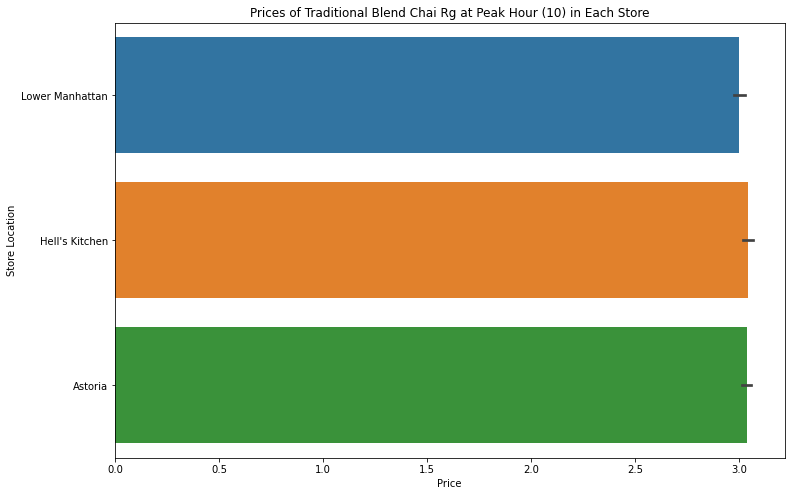

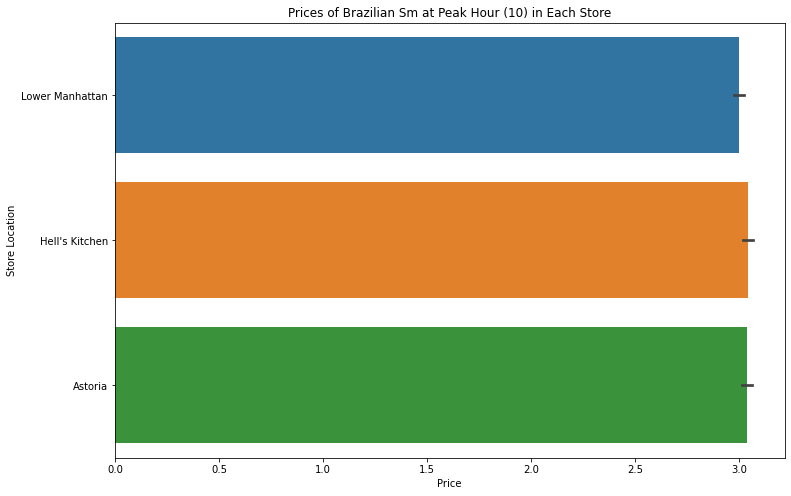

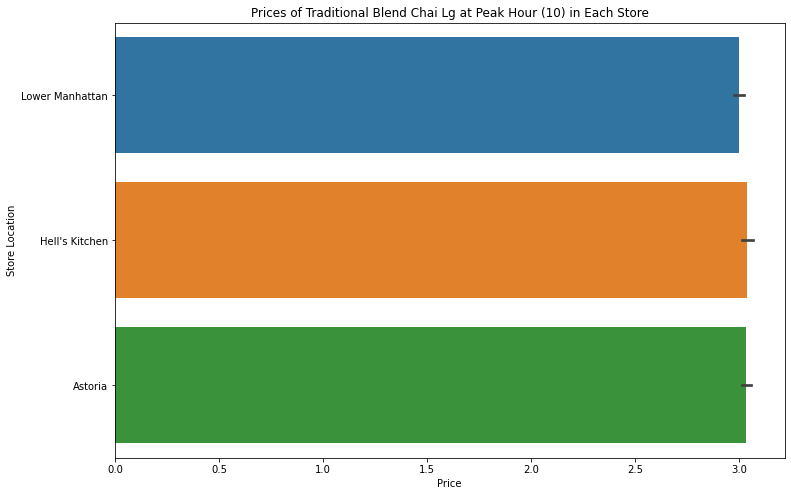

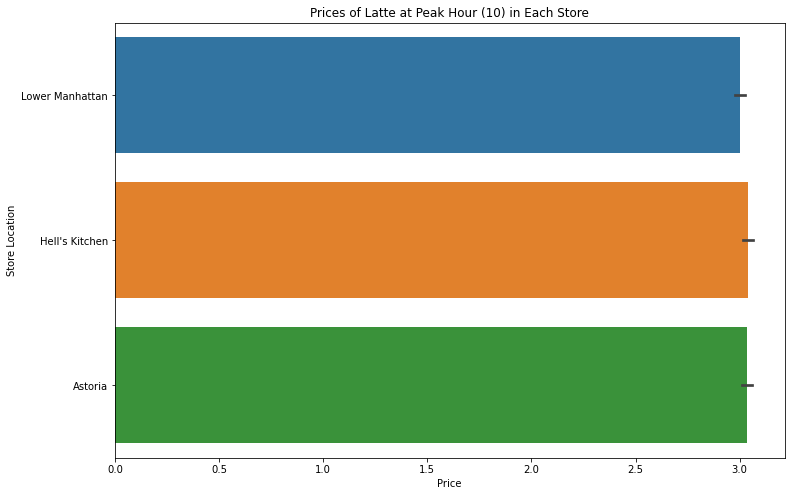

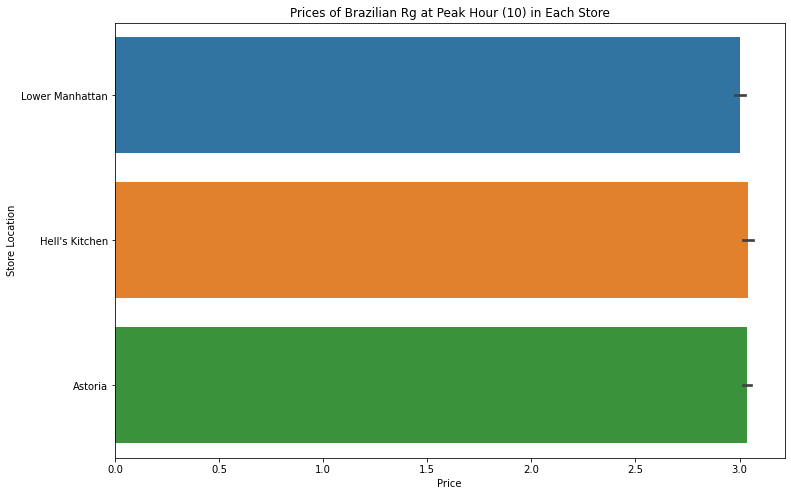

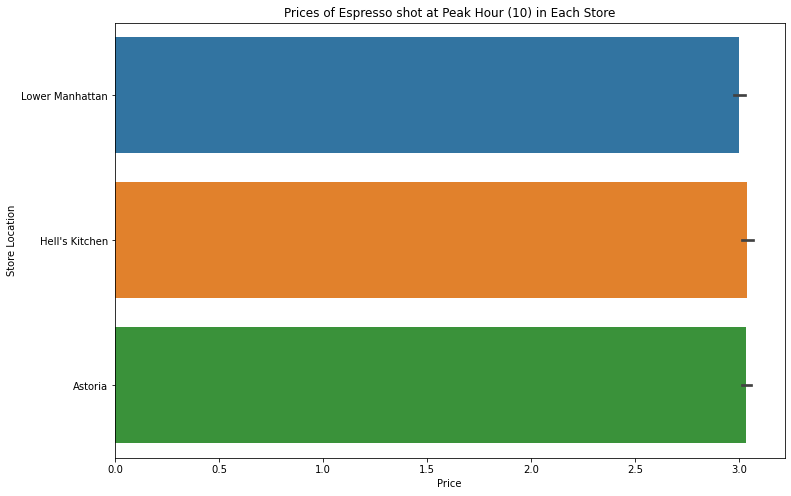

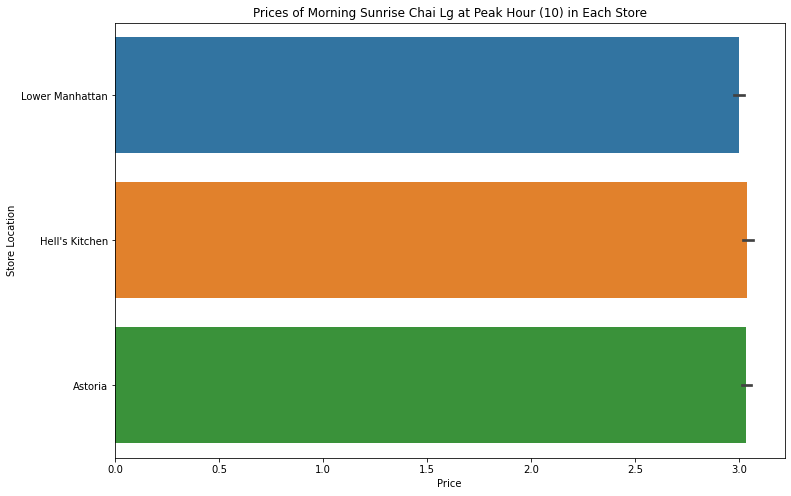

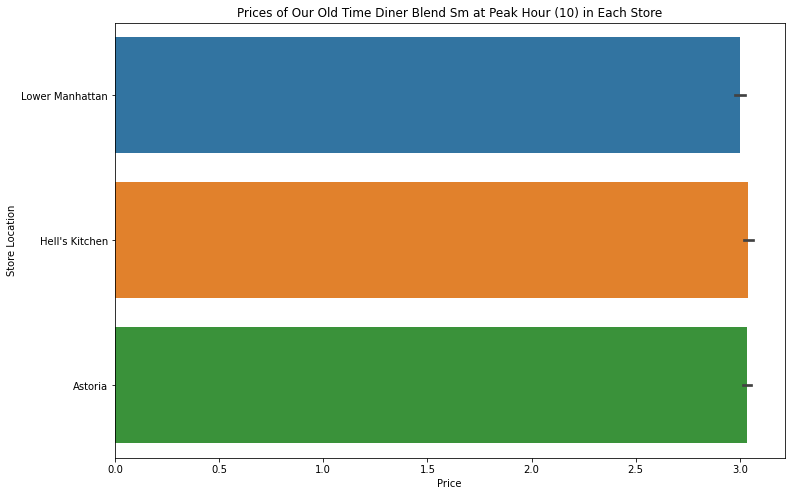

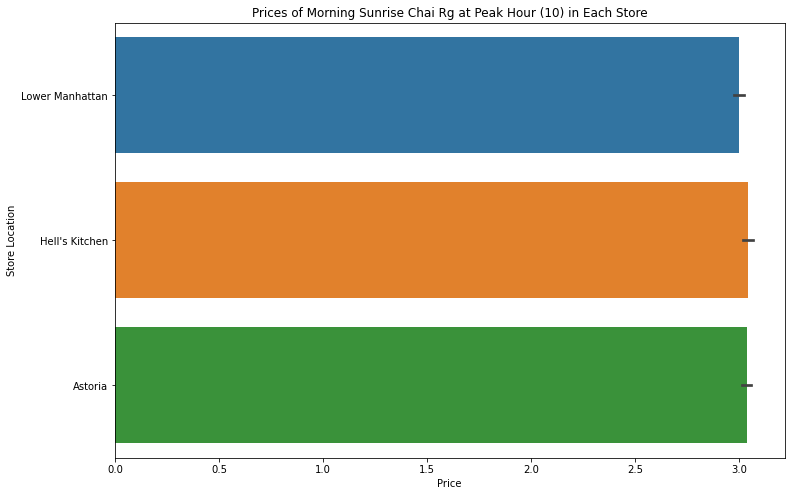

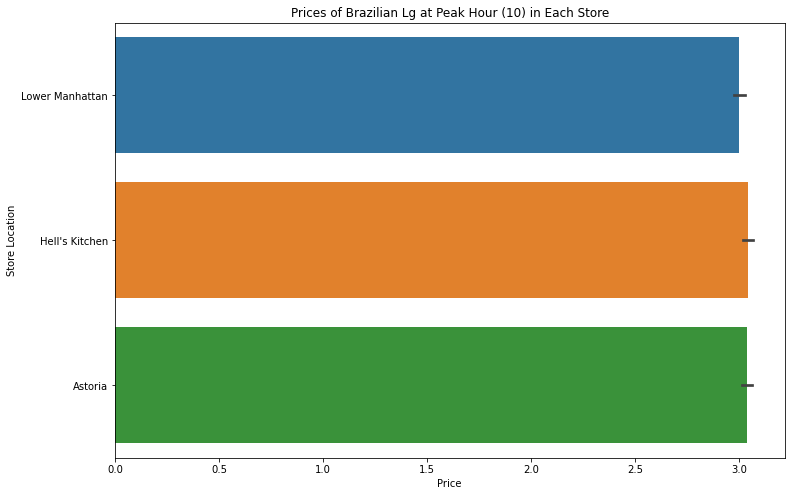

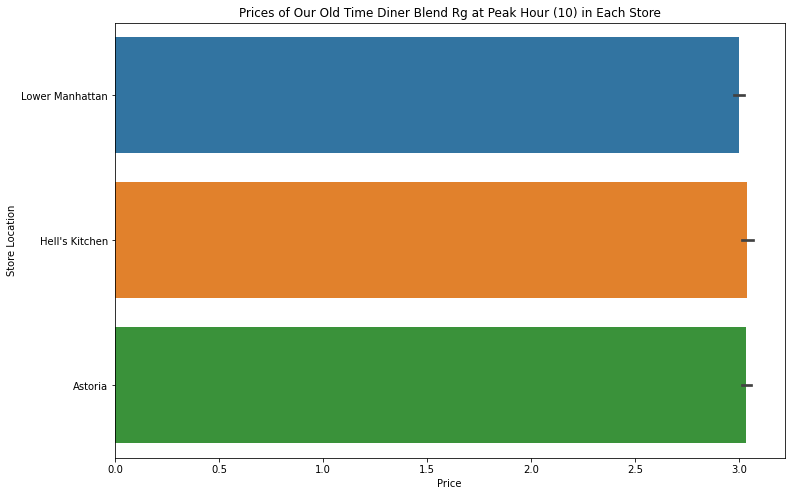

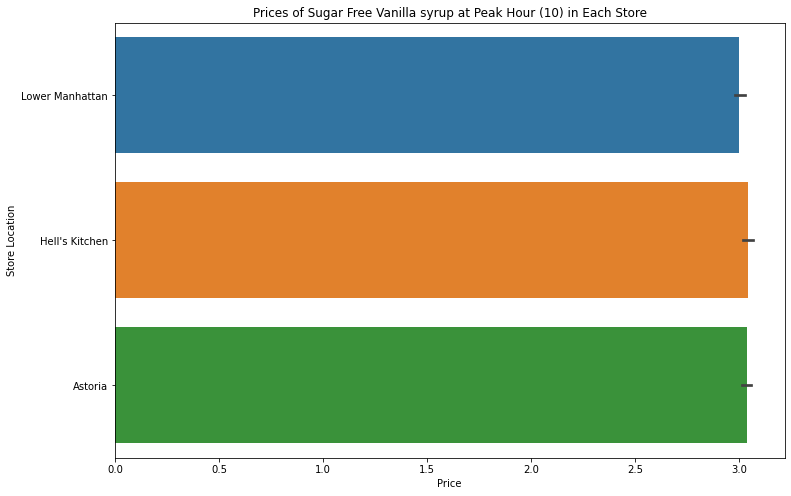

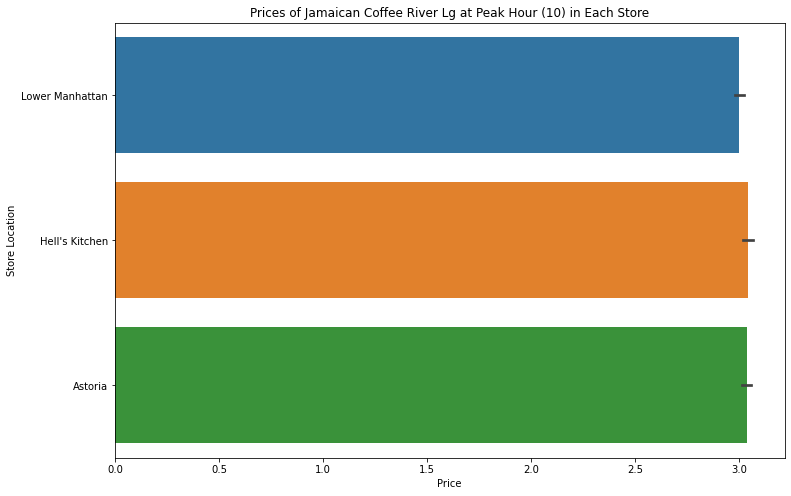

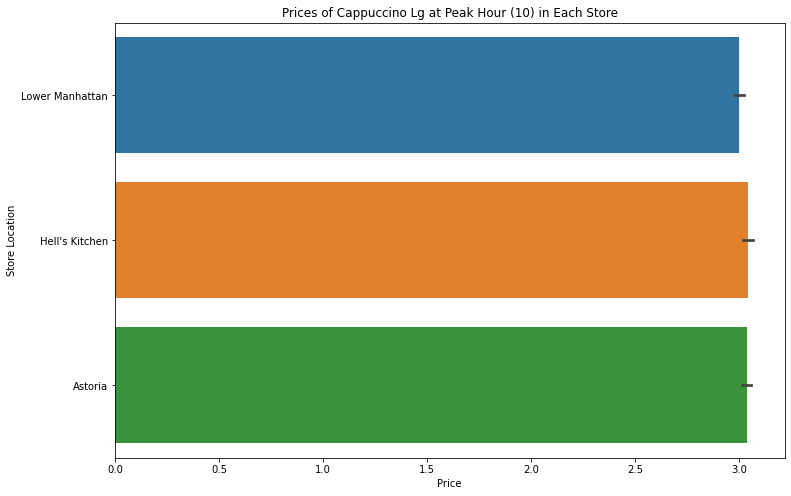

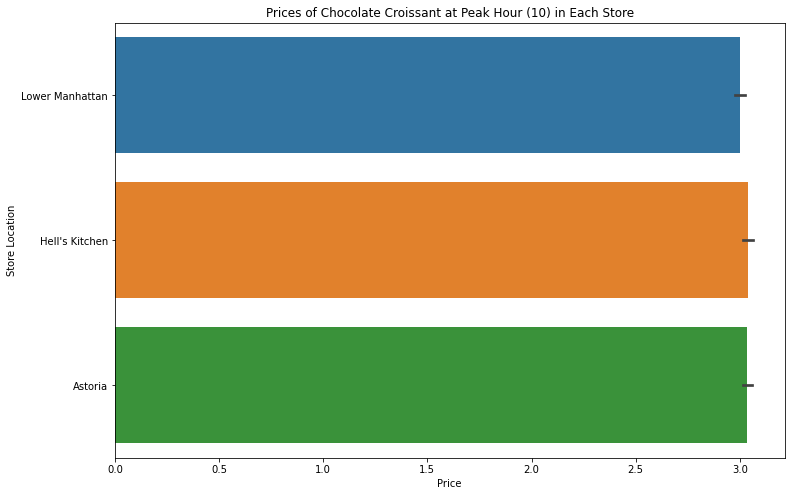

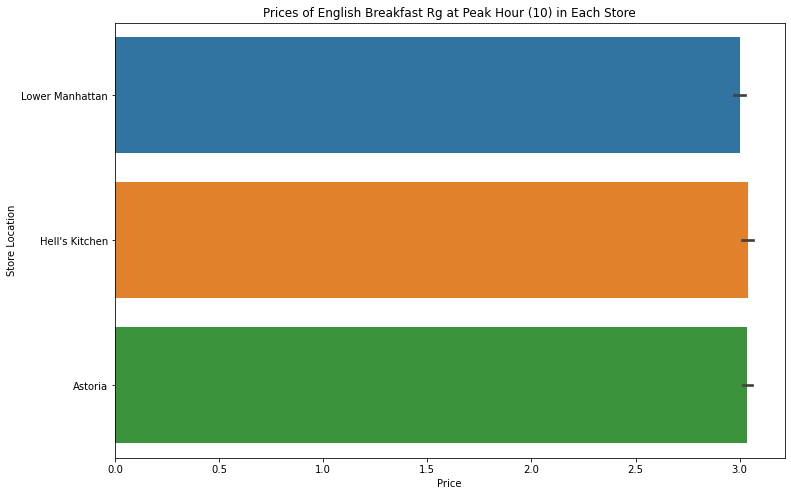

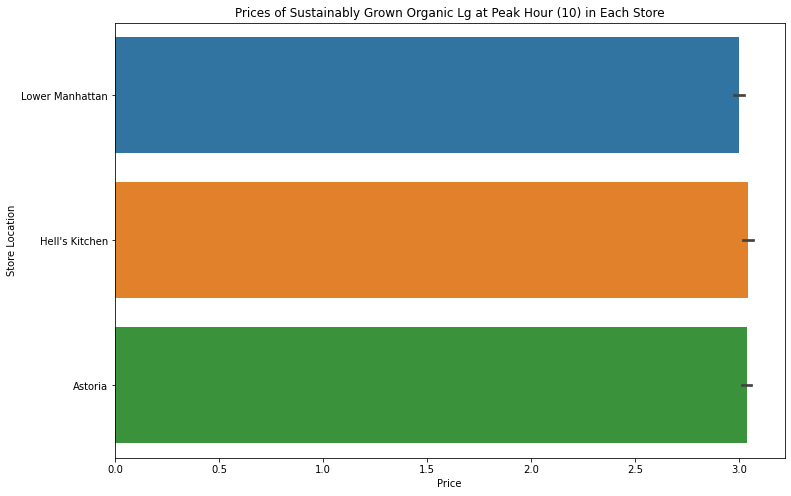

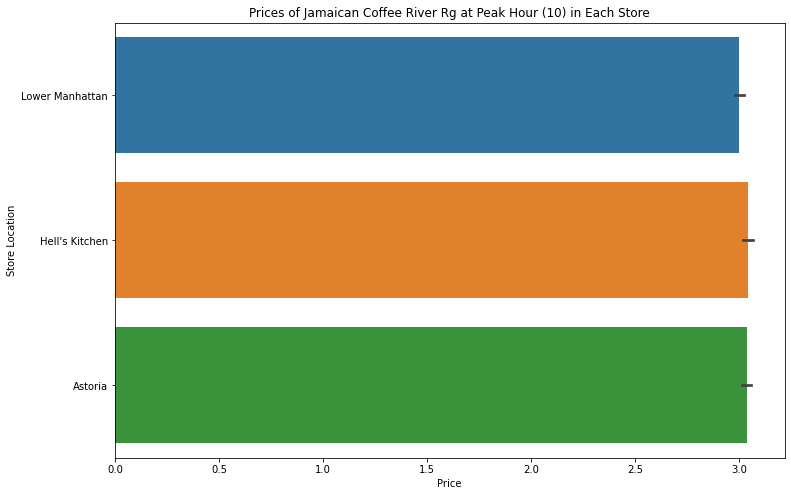

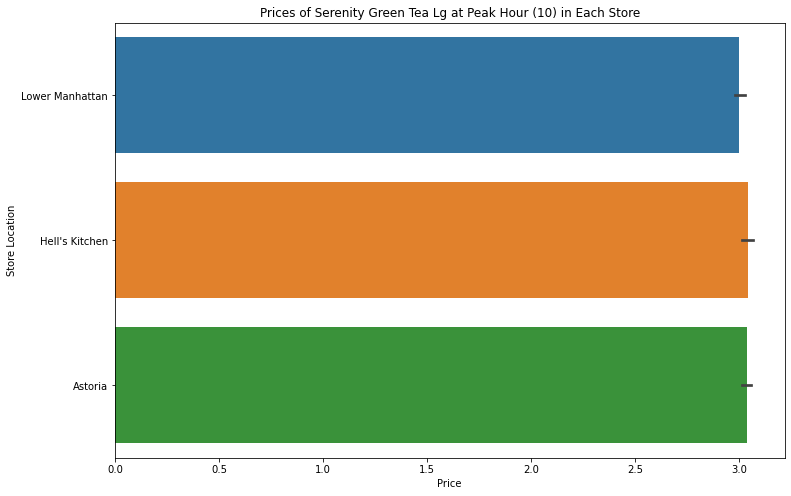

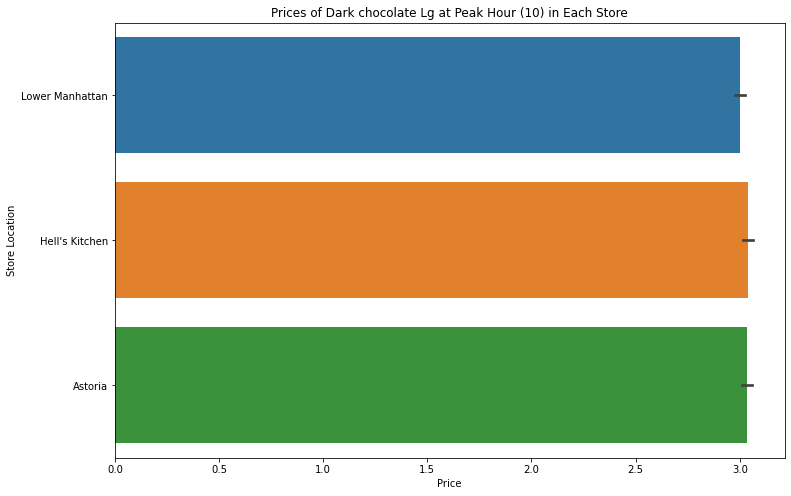

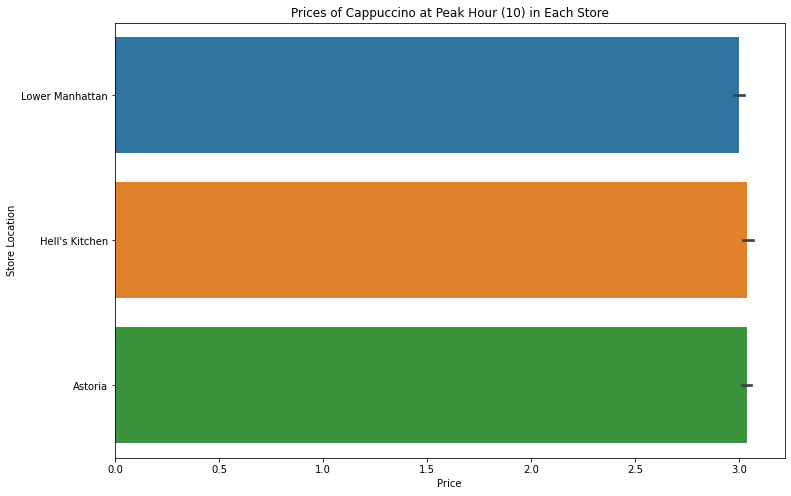

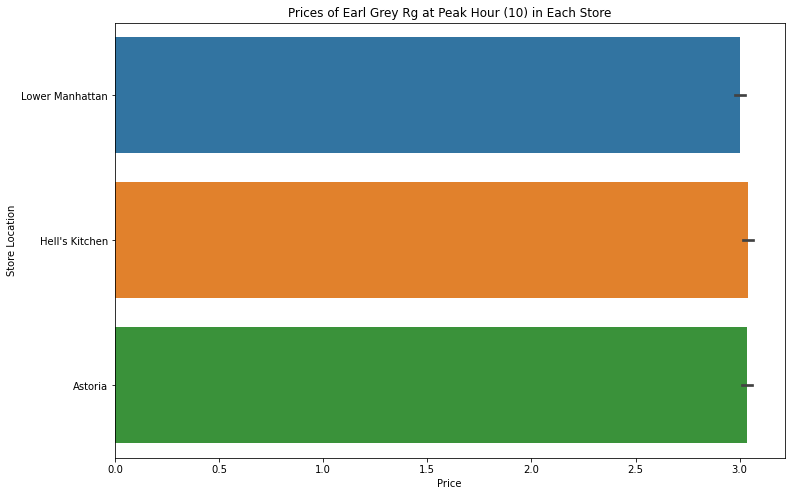

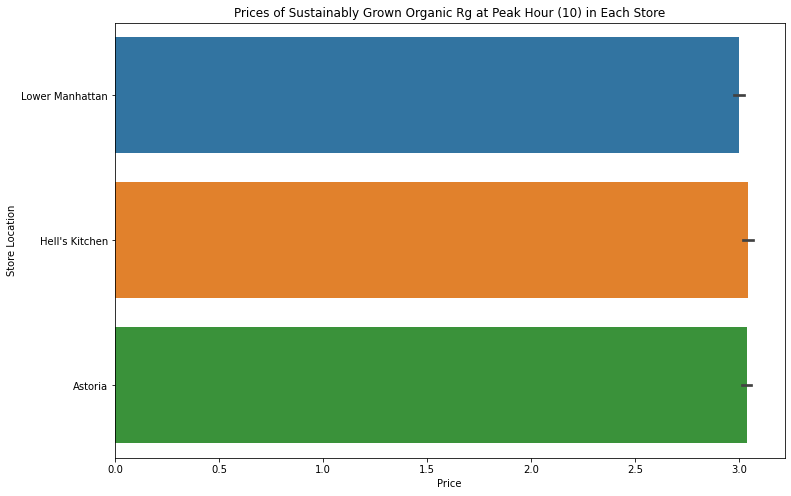

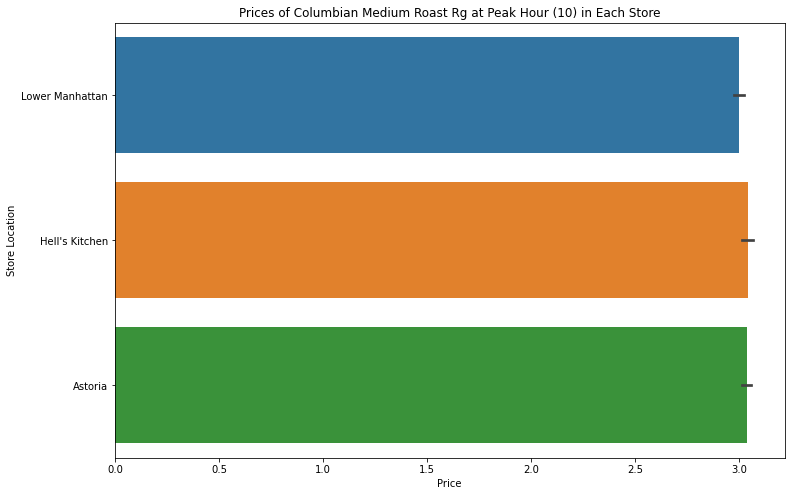

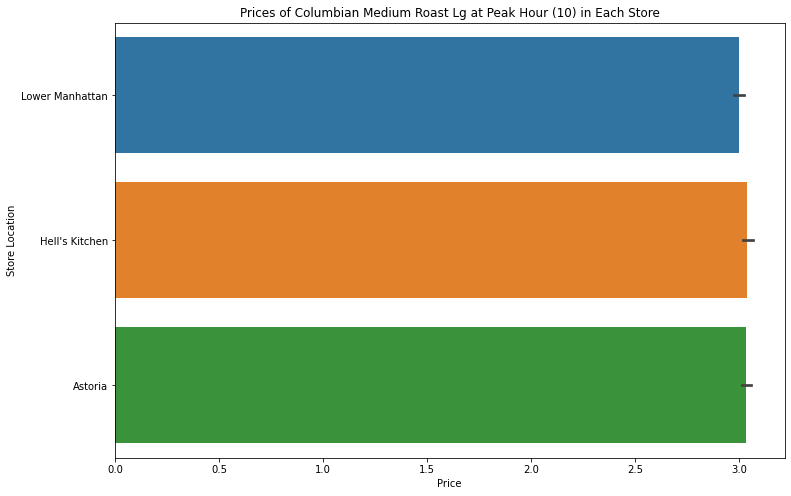

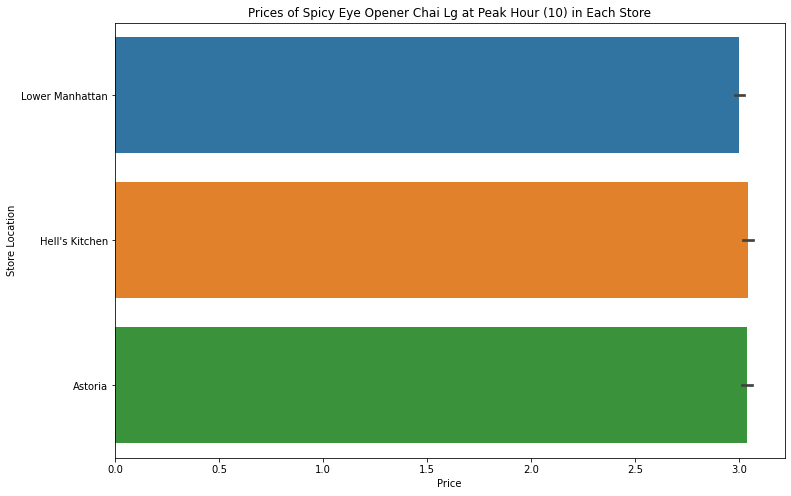

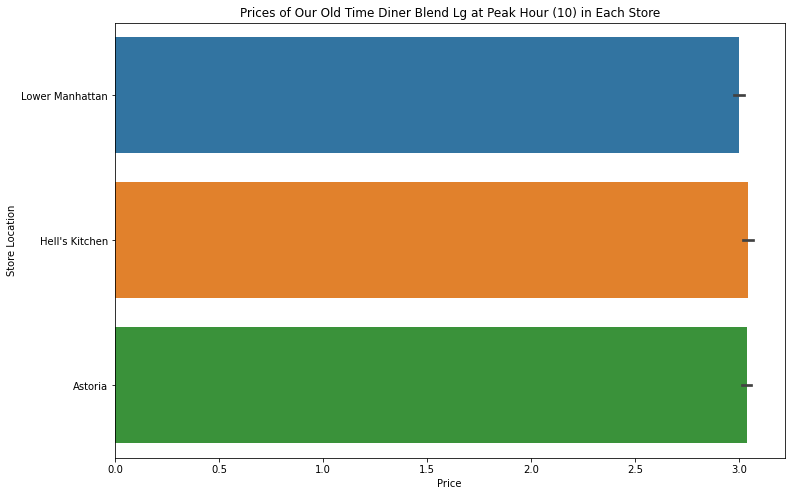

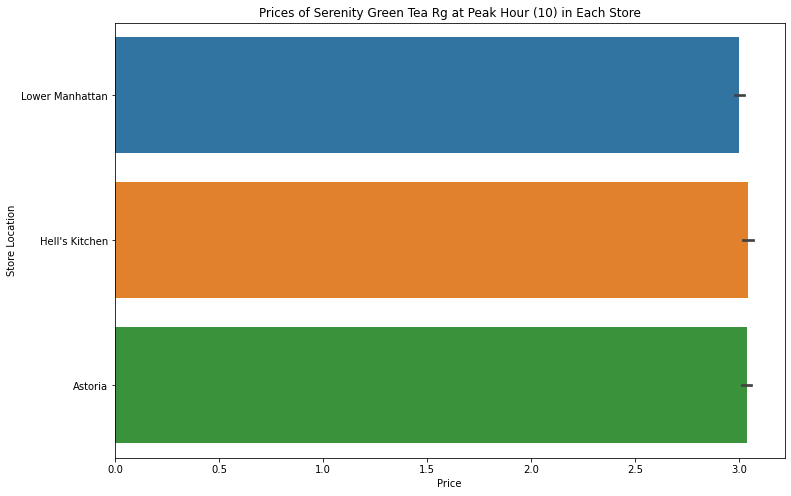

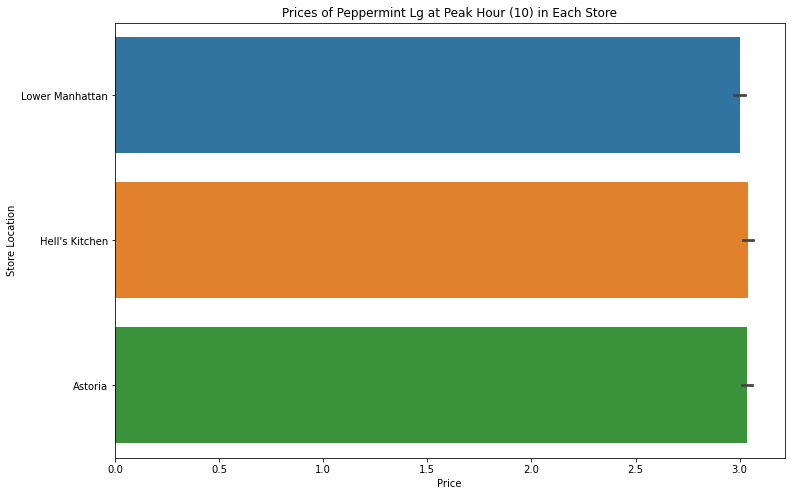

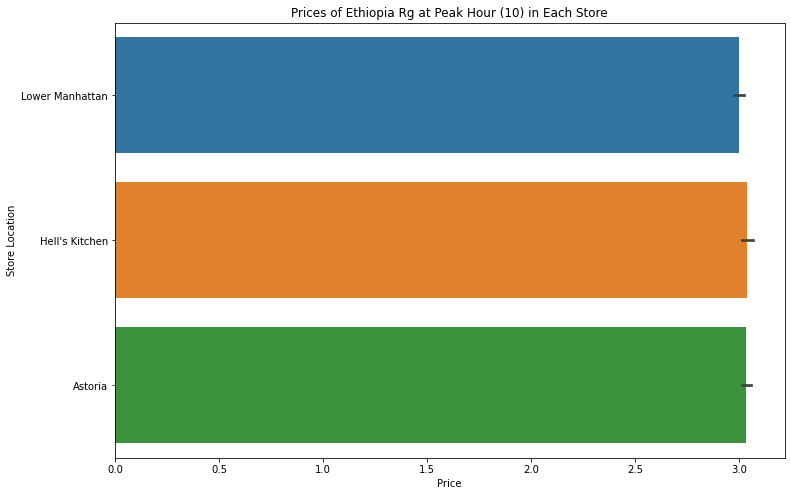

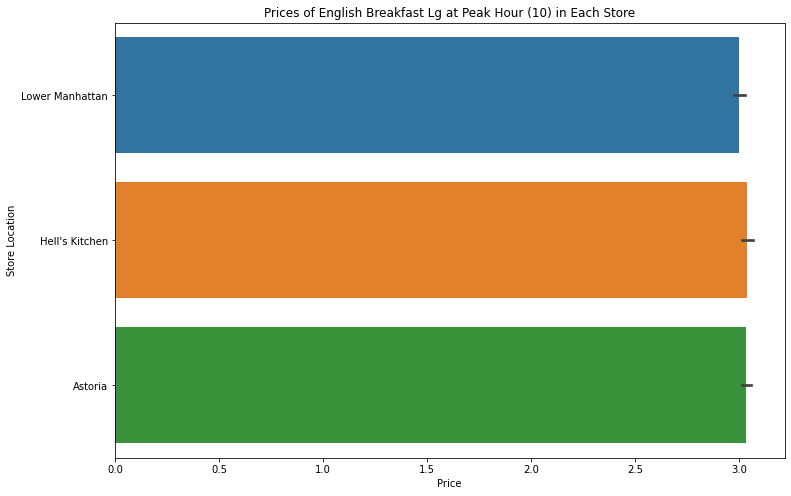

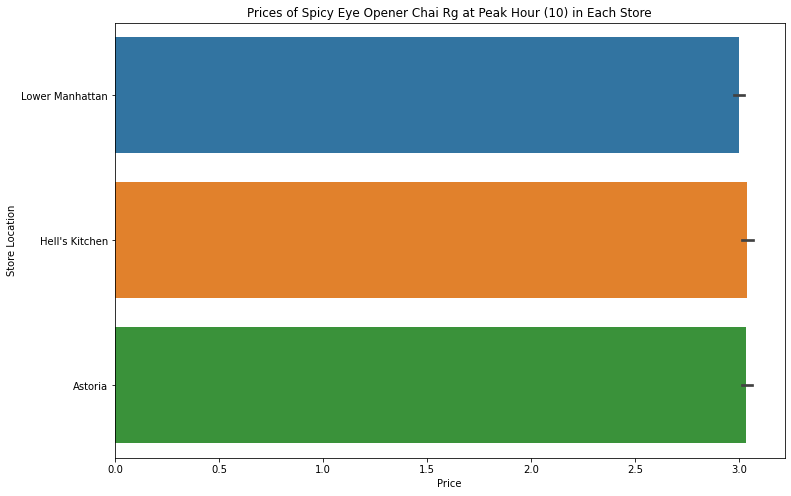

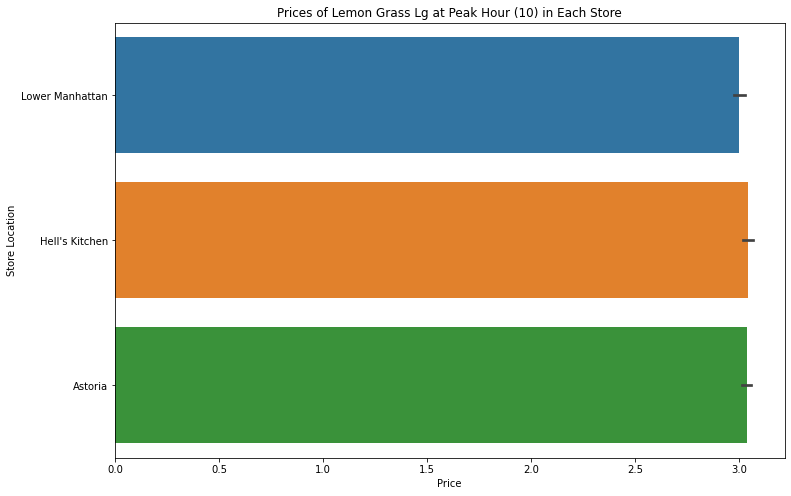

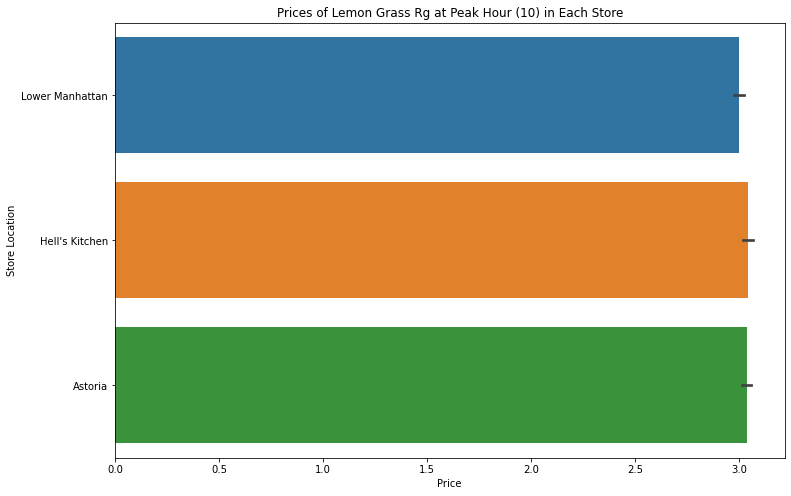

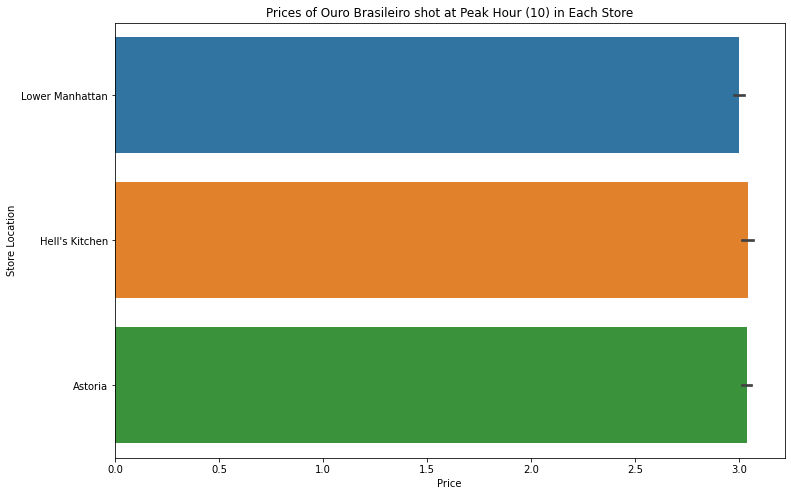

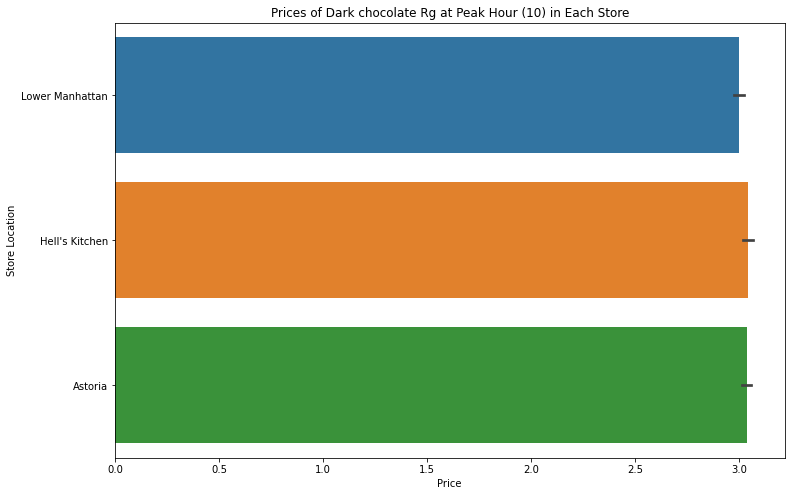

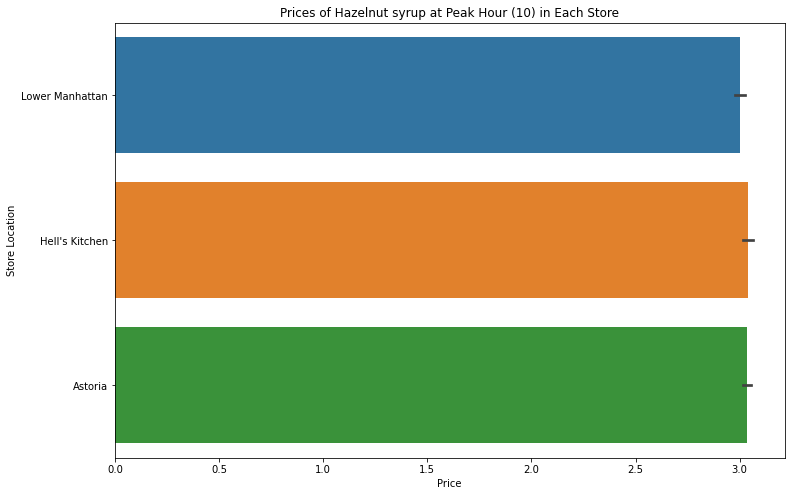

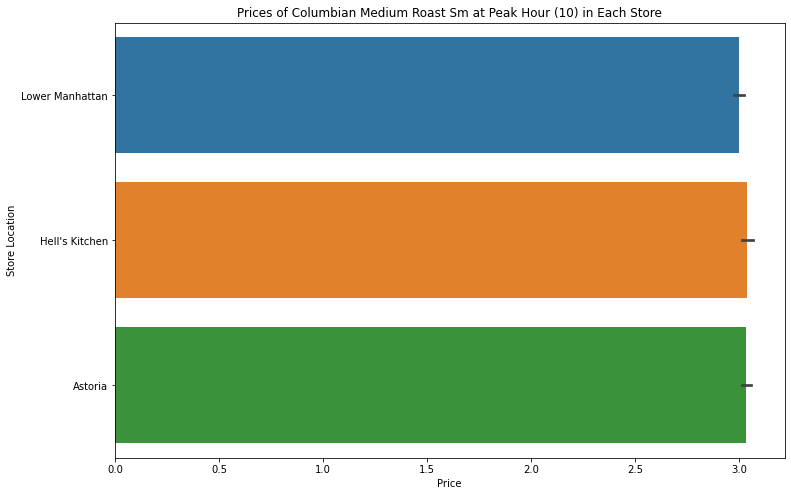

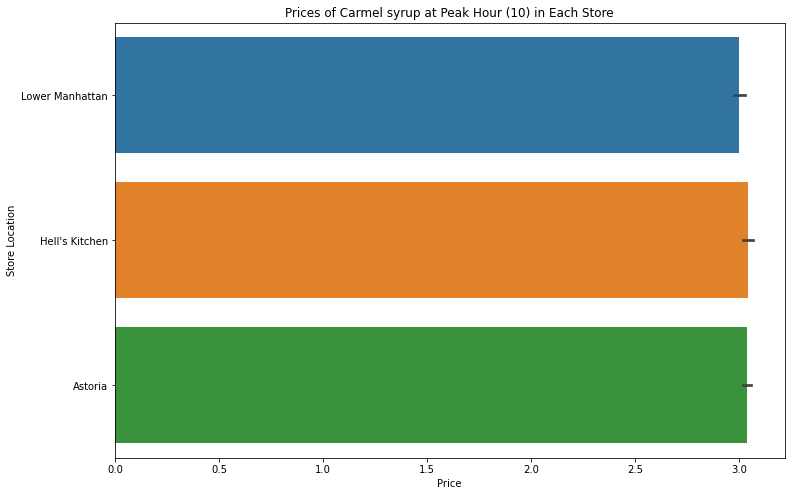

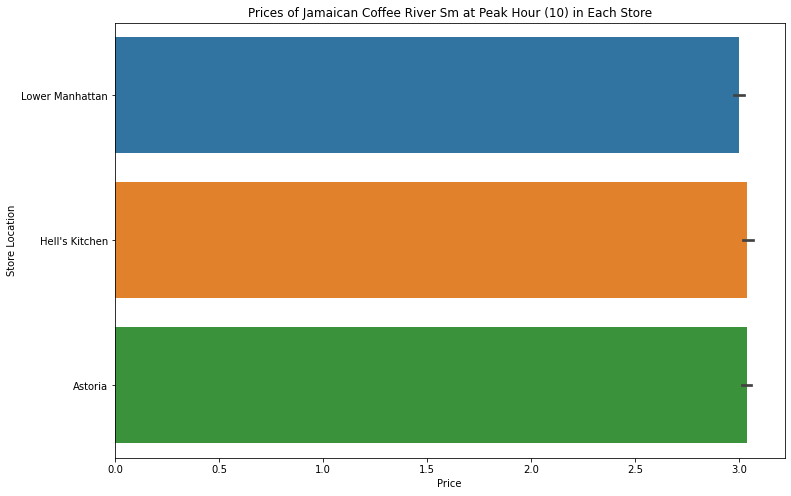

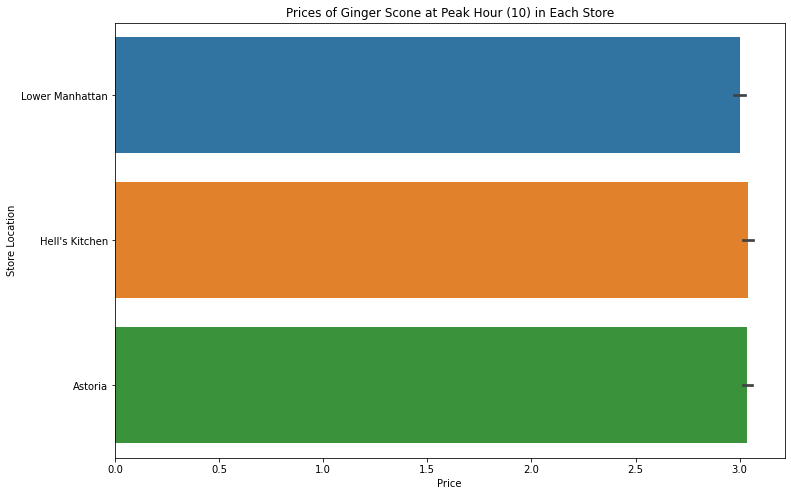

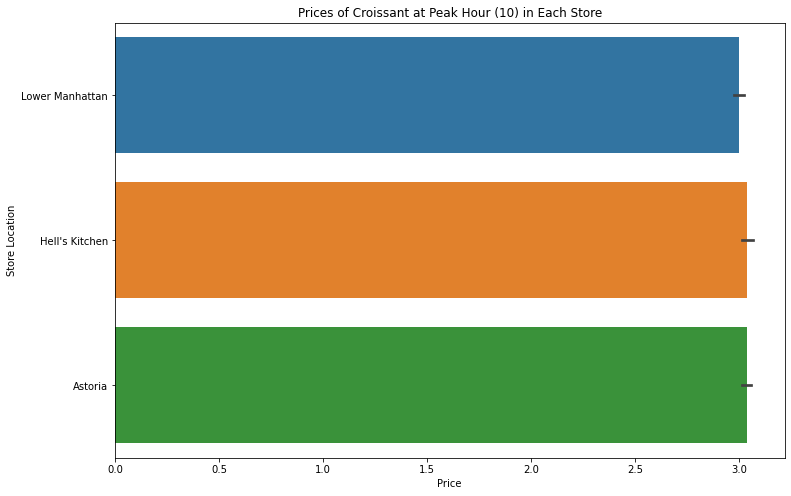

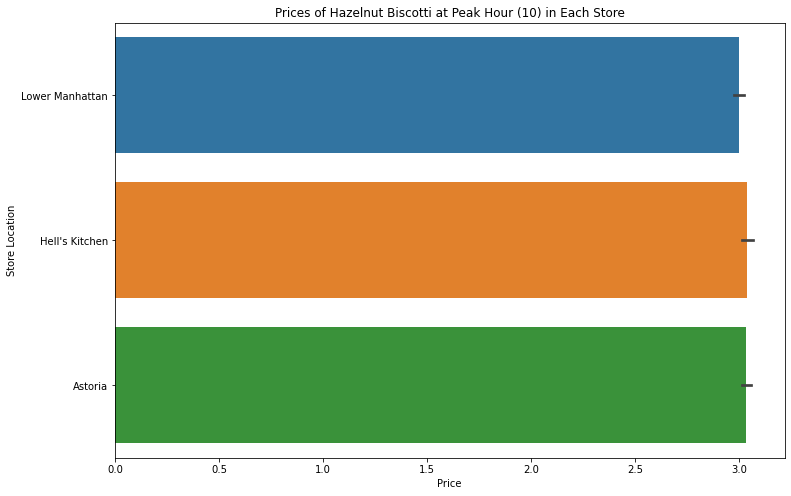

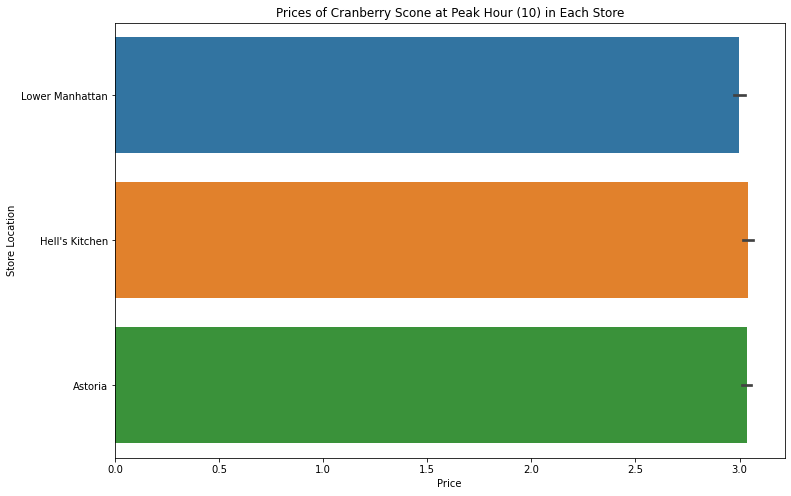

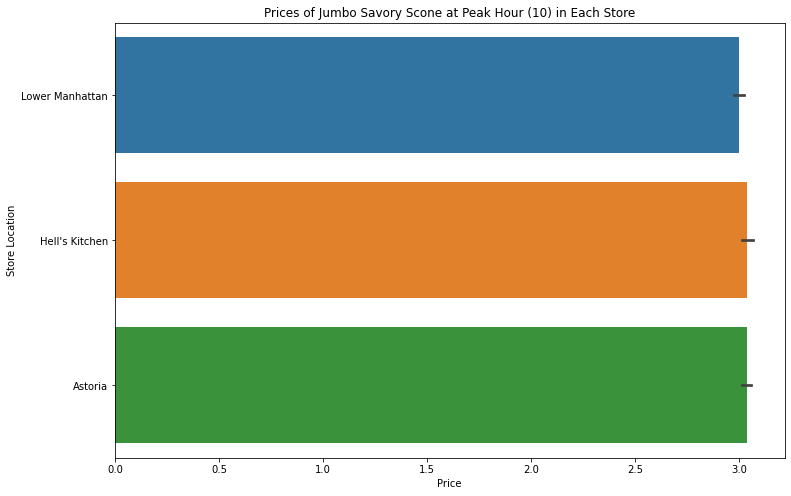

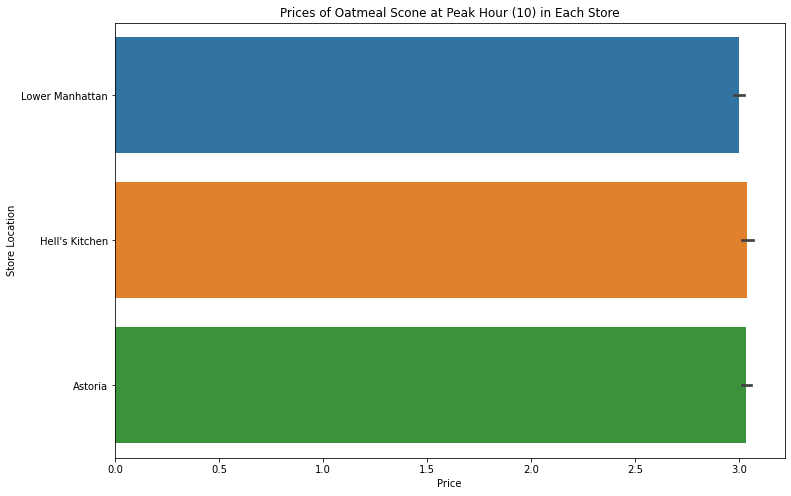

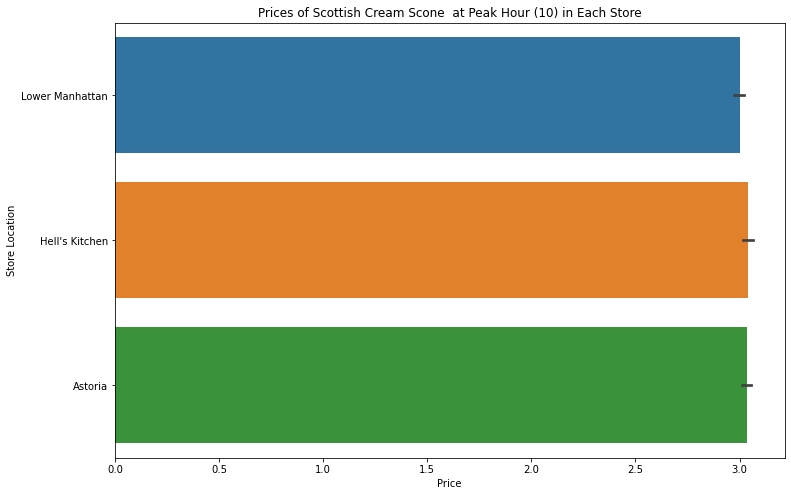

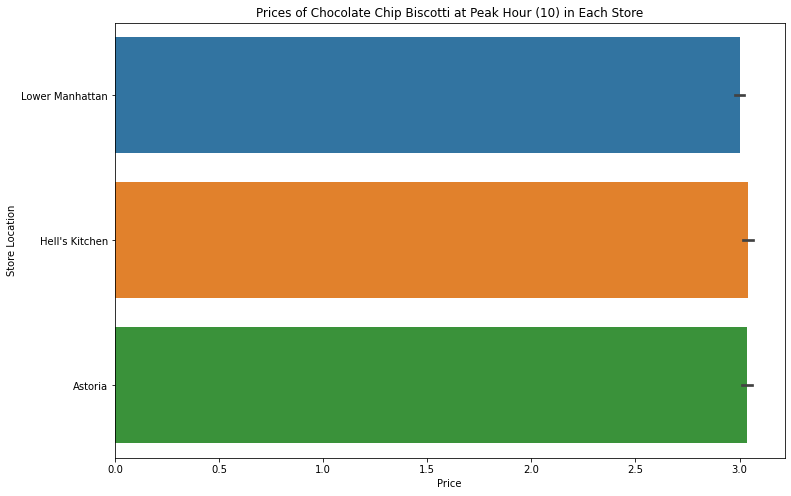

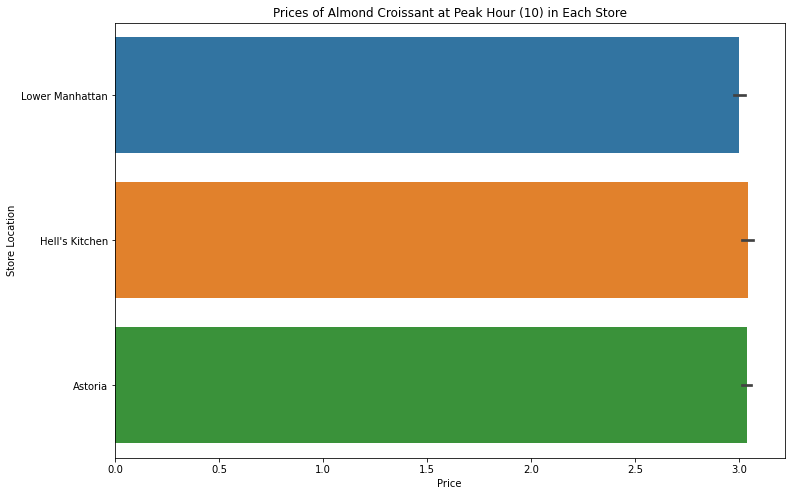

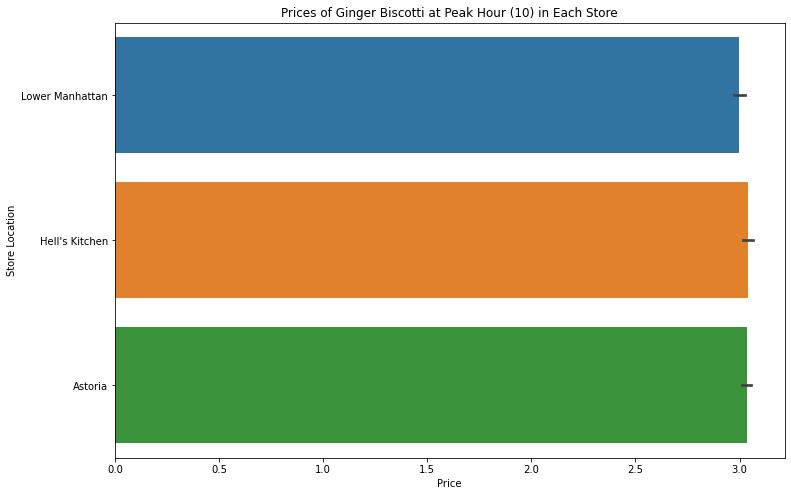

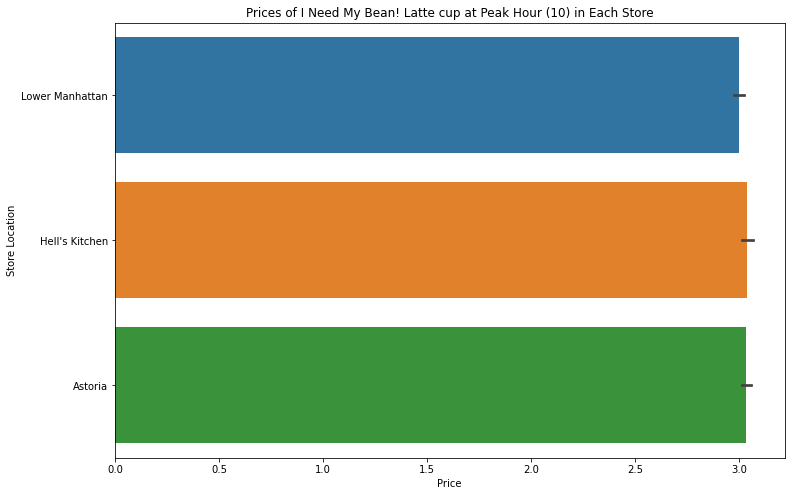

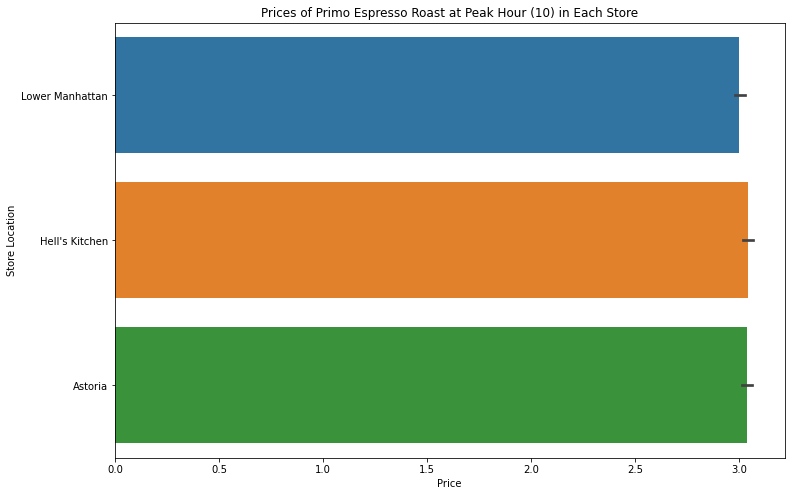

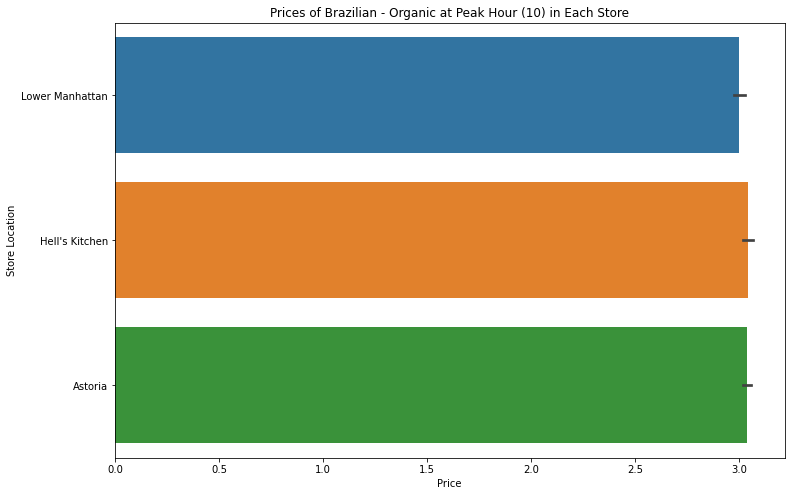

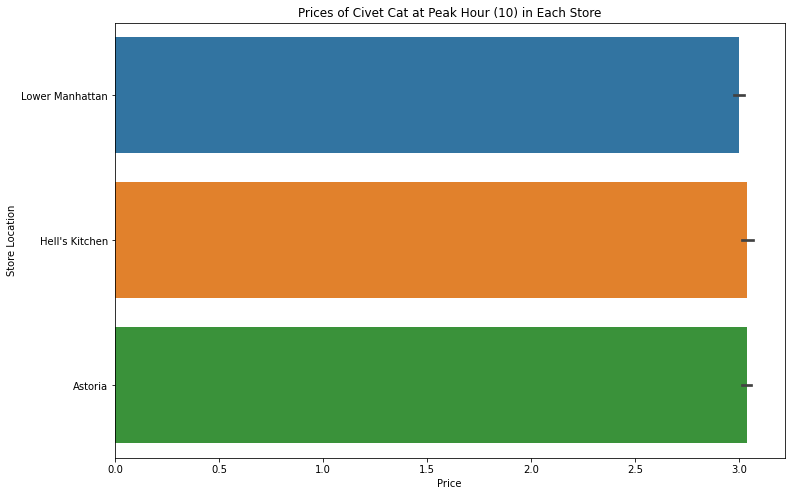

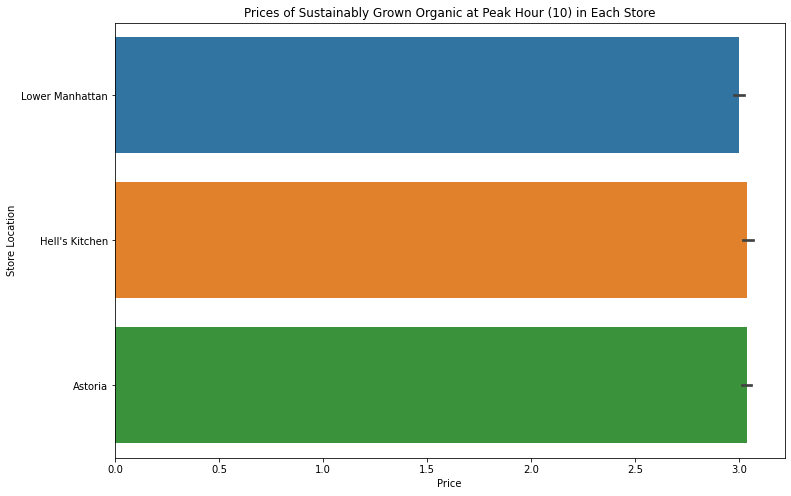

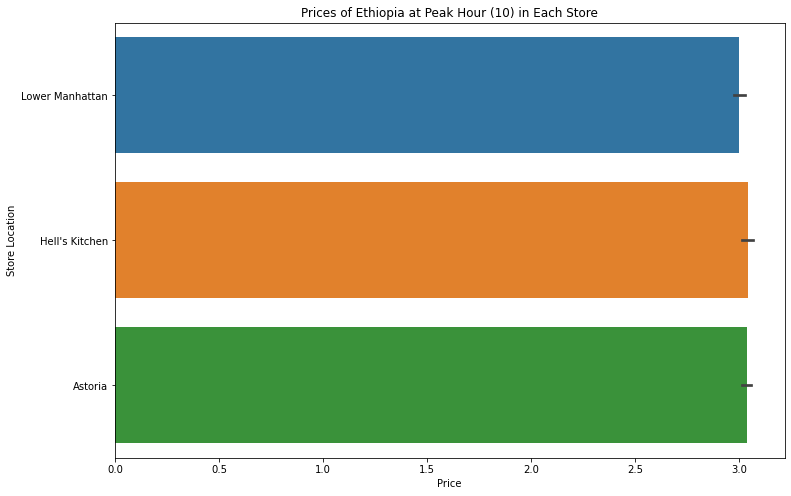

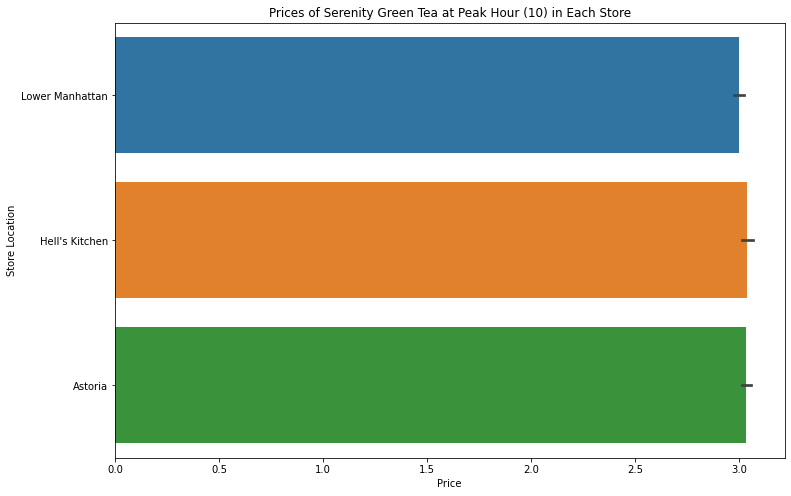

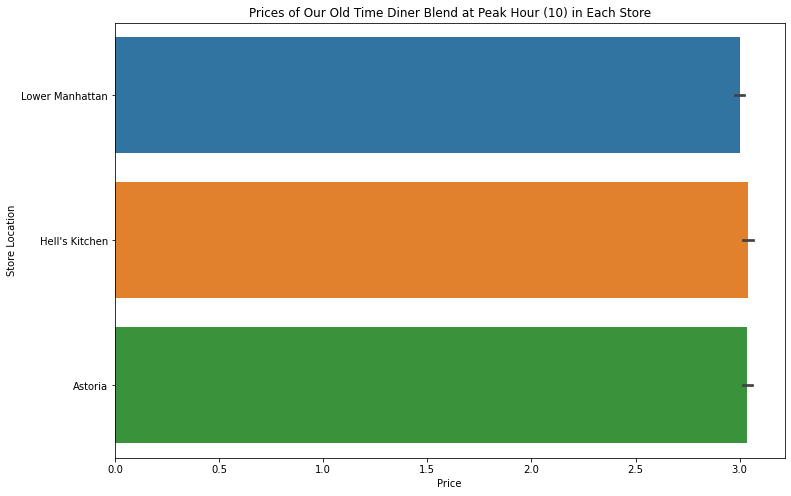

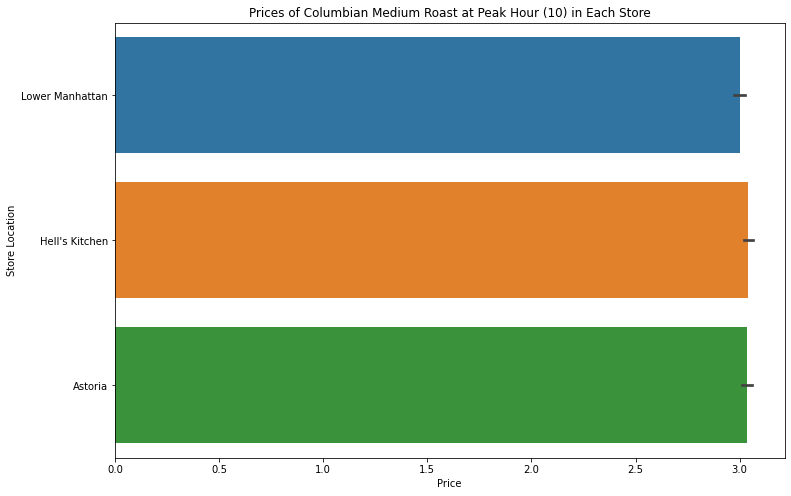

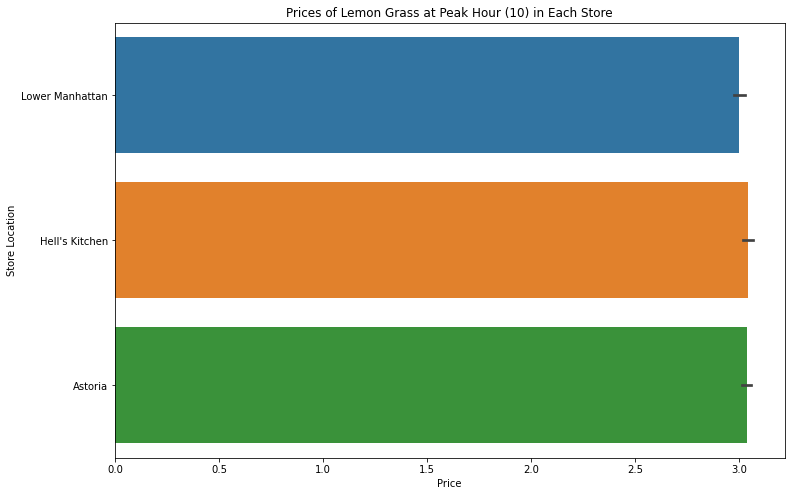

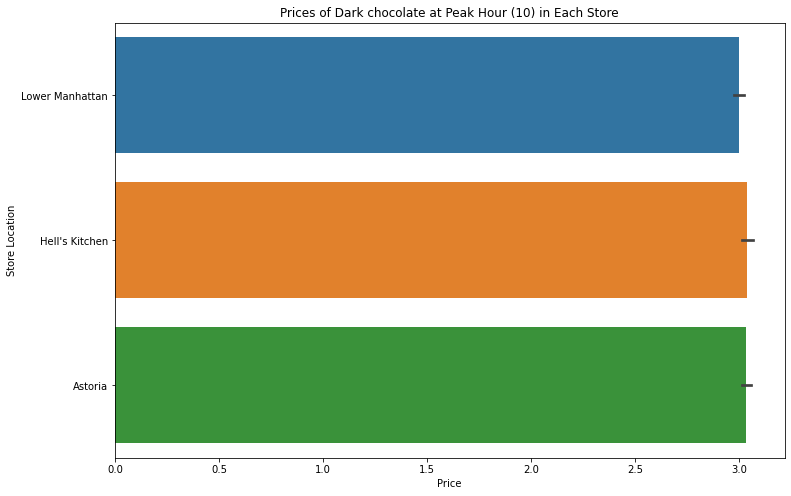

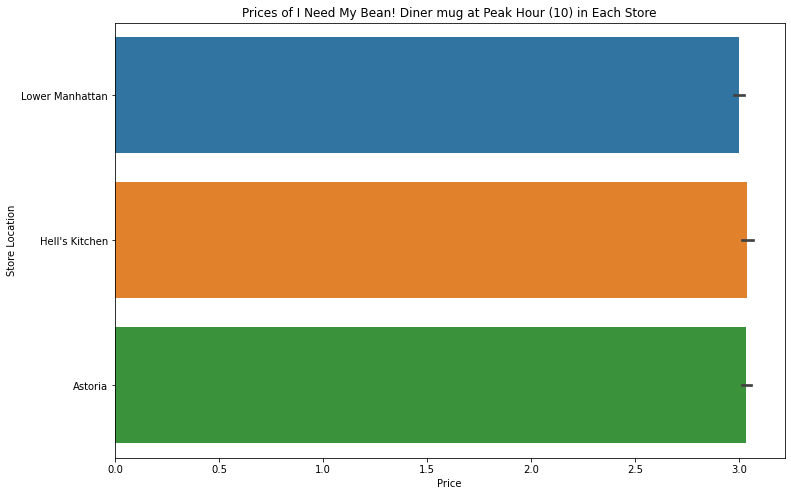

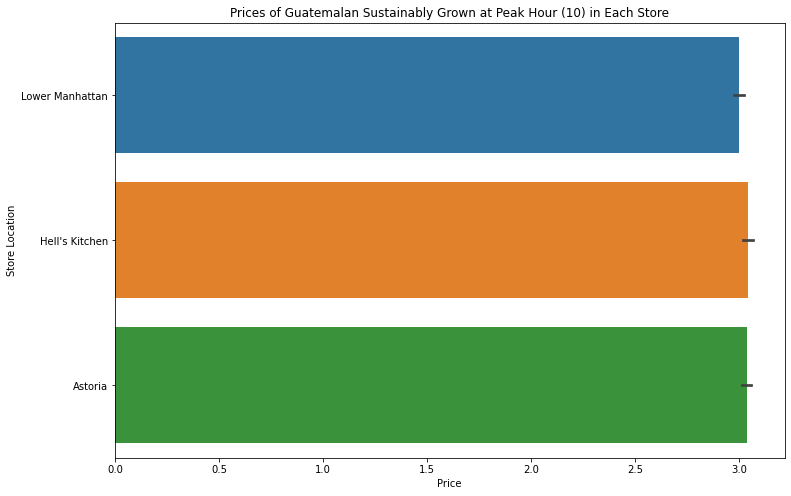

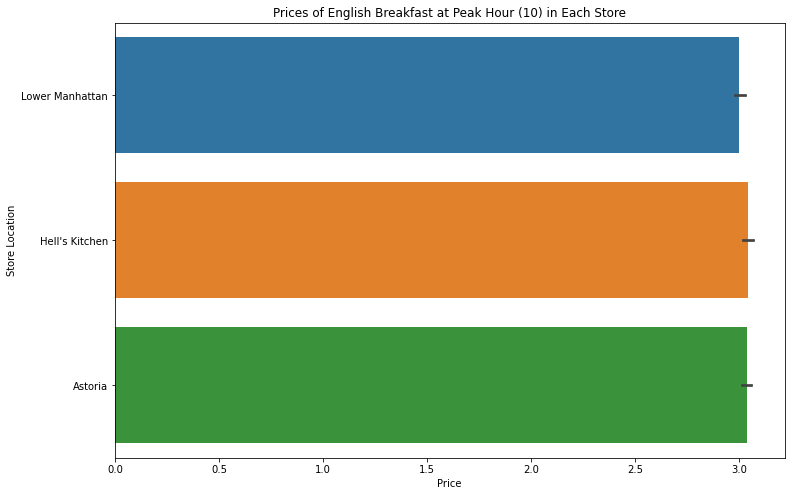

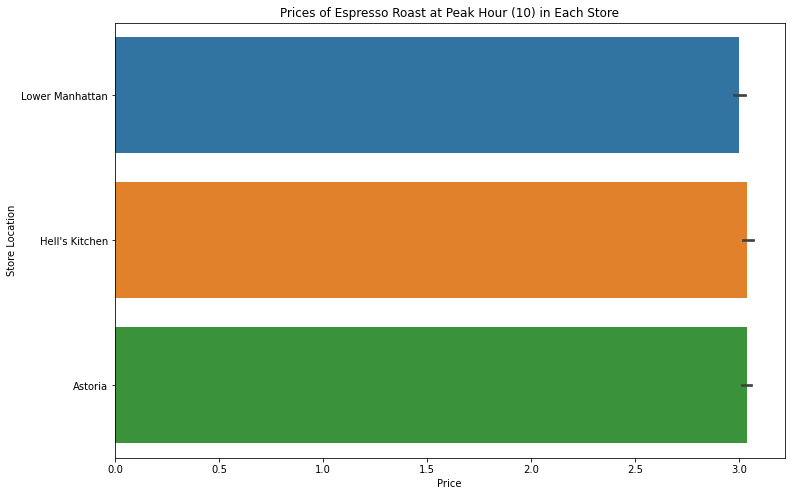

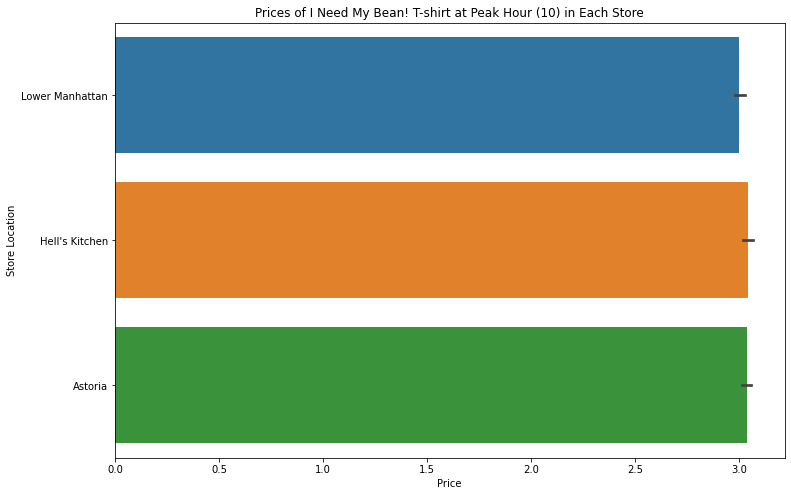

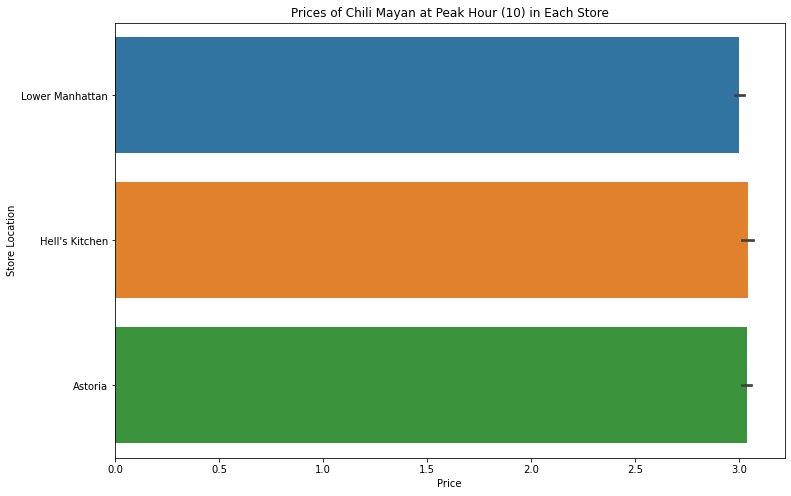

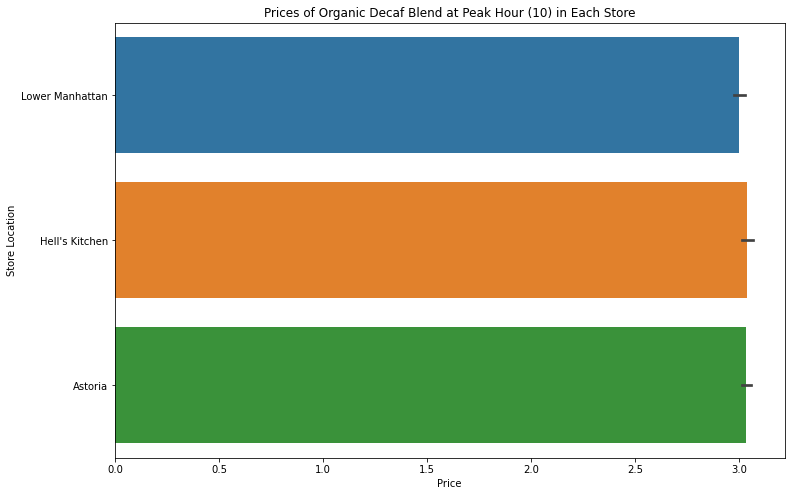

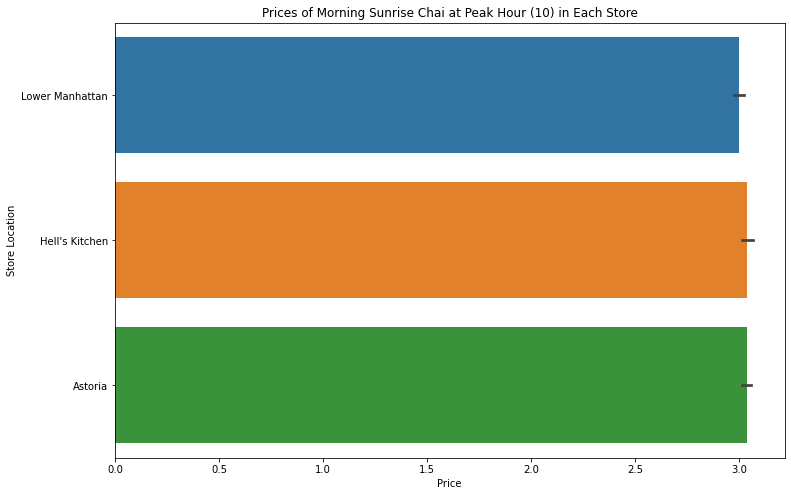

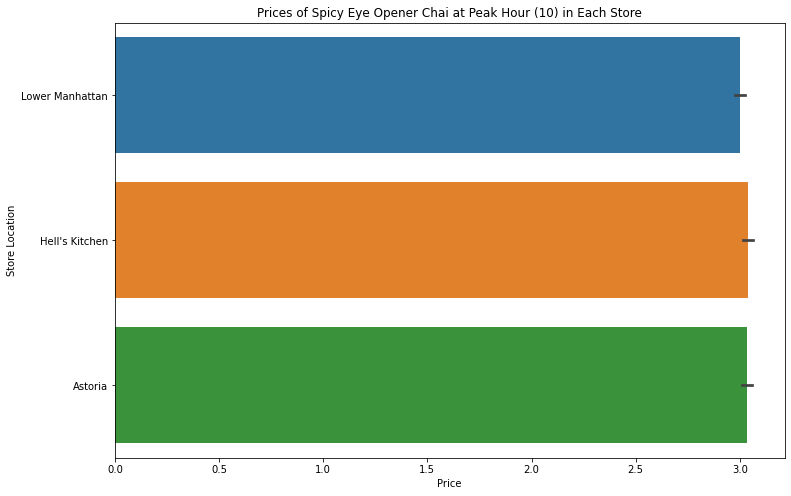

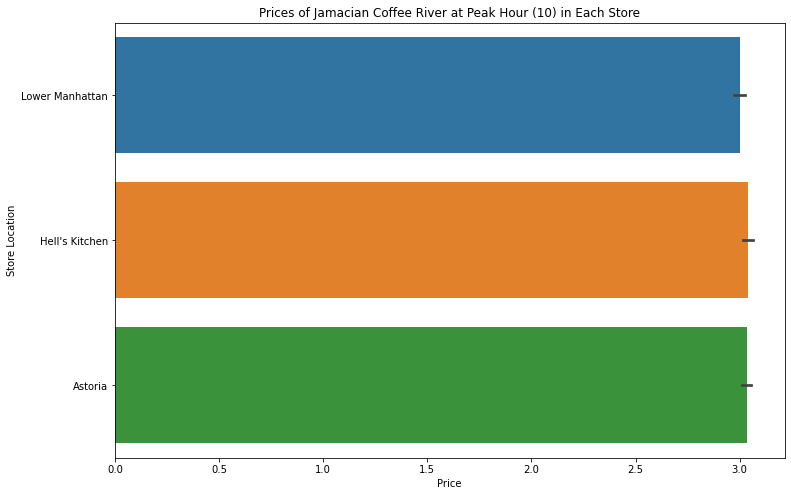

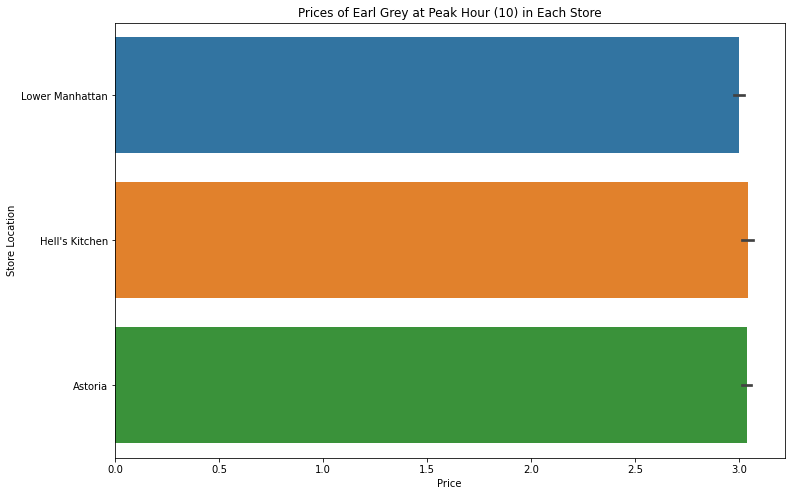

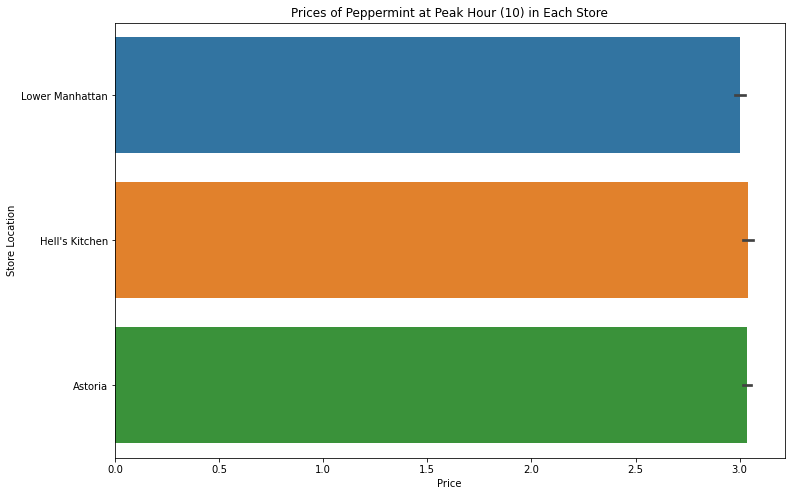

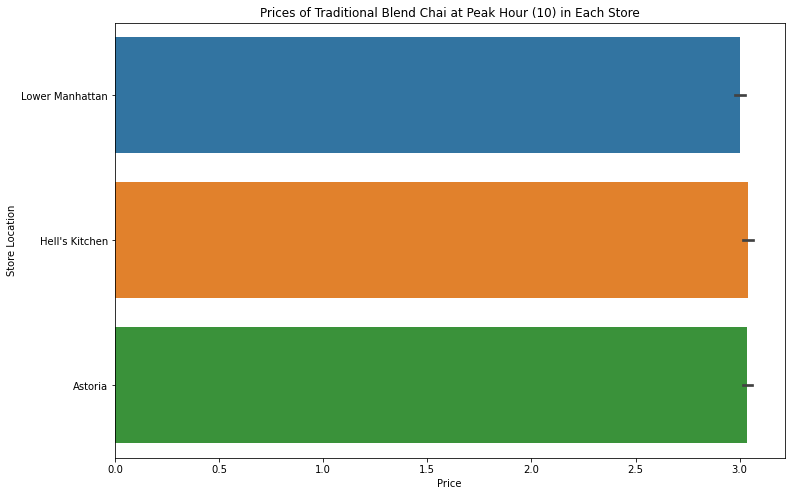

In [22]:
# Visualizations

# Plot customer count by hour
plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='transaction_qty', data=customer_count_by_hour)
plt.title('Customer Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(0, 24))
plt.show()

# Plot popular products at peak hour
plt.figure(figsize=(12, 8))
sns.barplot(x='transaction_qty', y='product_detail', data=popular_products_at_peak_hour)
plt.title(f'Most Popular Products at Peak Hour ({peak_hour})')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Detail')
plt.show()

# Plot prices of popular products at each store
for product in popular_products_at_peak_hour['product_detail']:
    product_prices = unique_product_prices[unique_product_prices['product_detail'] == product]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='unit_price', y='store_location', data=df)
    plt.title(f'Prices of {product} at Peak Hour ({peak_hour}) in Each Store')
    plt.xlabel('Price')
    plt.ylabel('Store Location')
    plt.show()

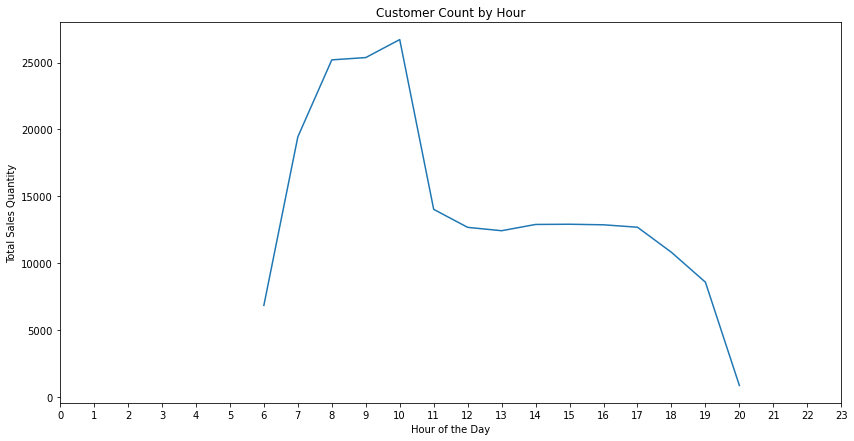

In [23]:
# Plot customer count by hour
plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='transaction_qty', data=customer_count_by_hour)
plt.title('Customer Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(0, 24))
plt.show()

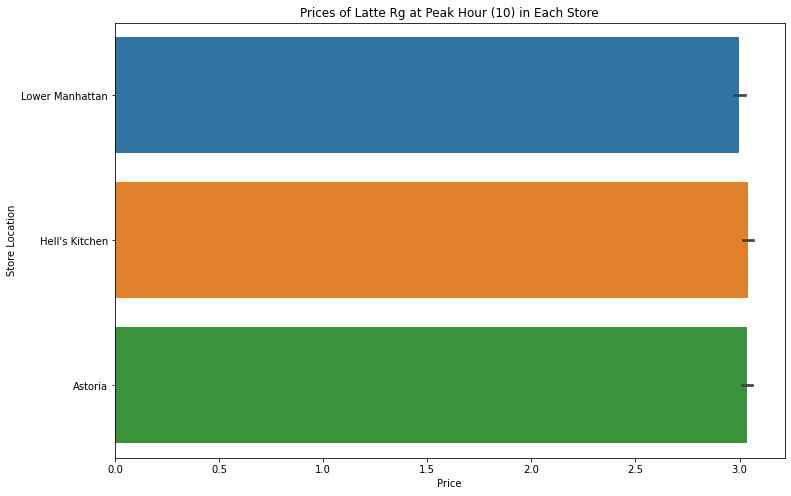

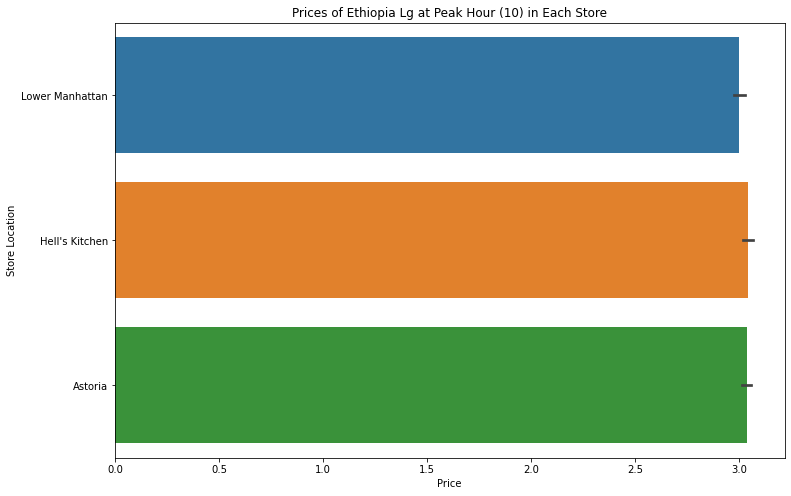

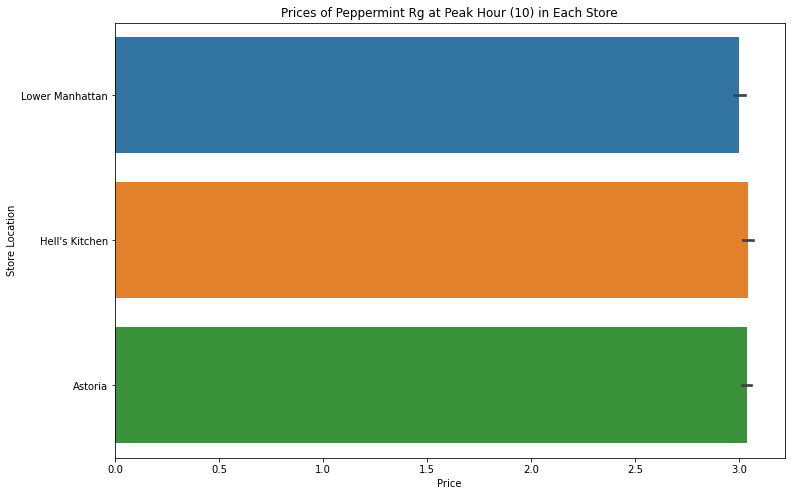

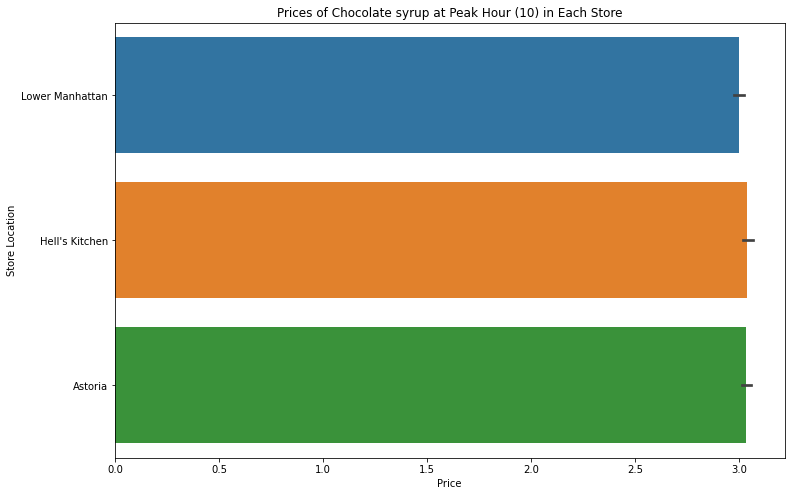

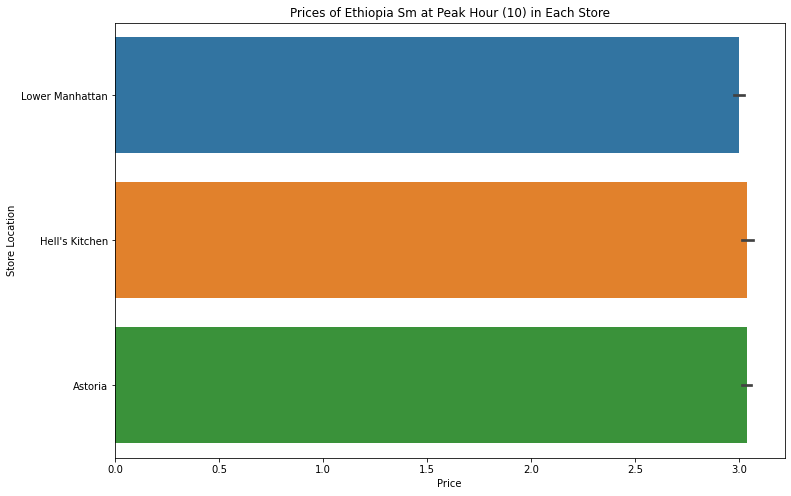

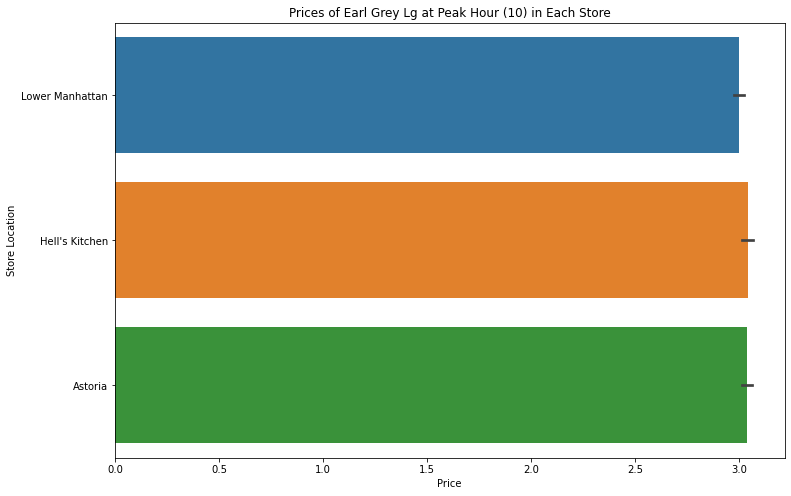

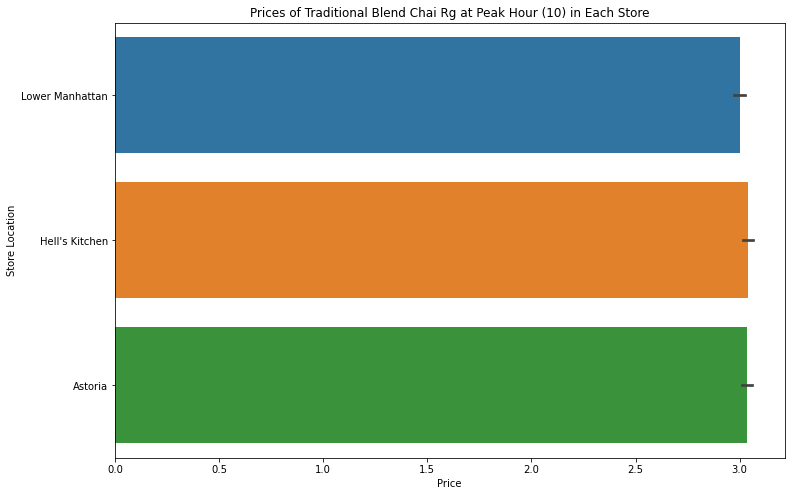

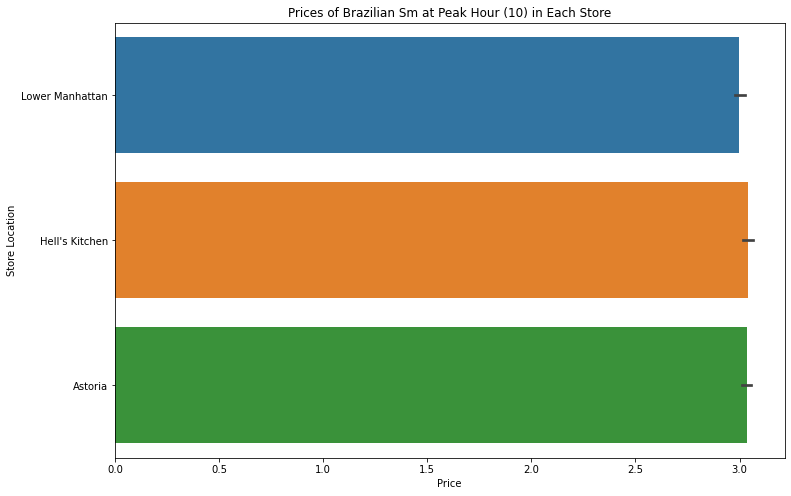

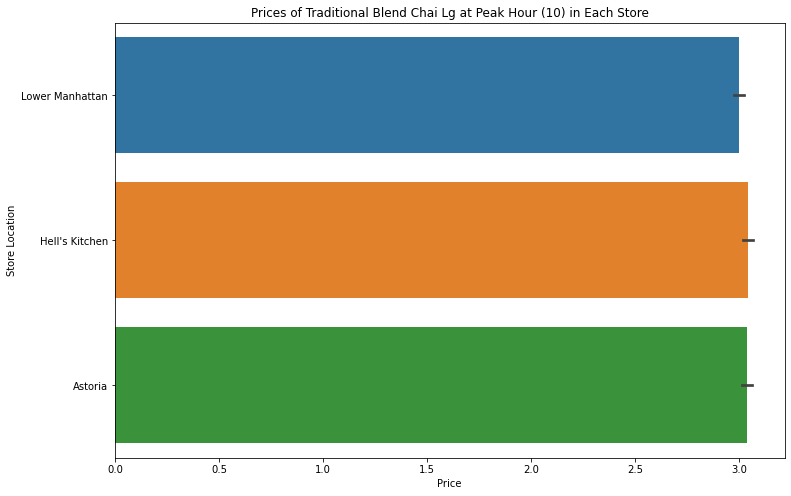

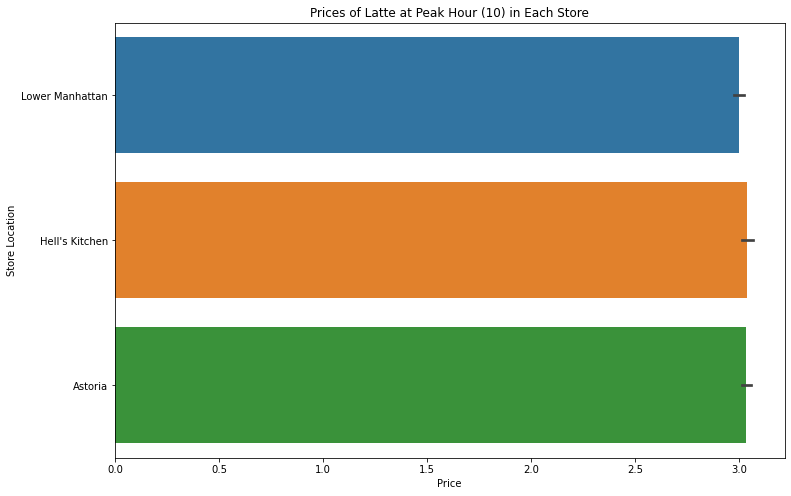

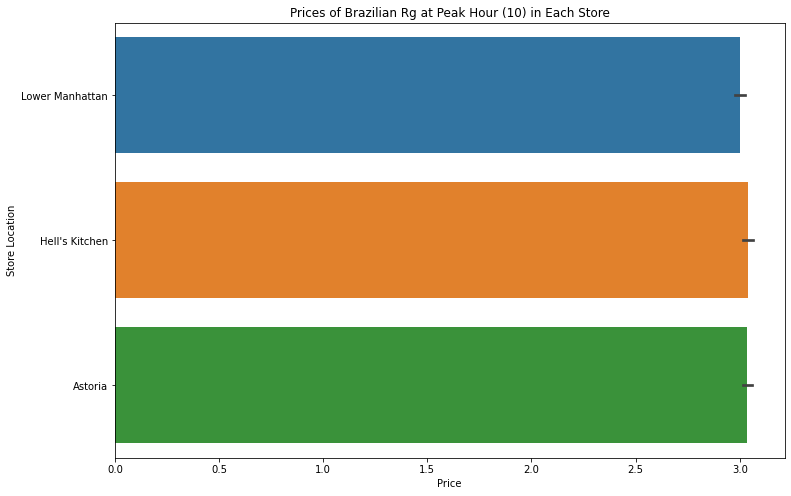

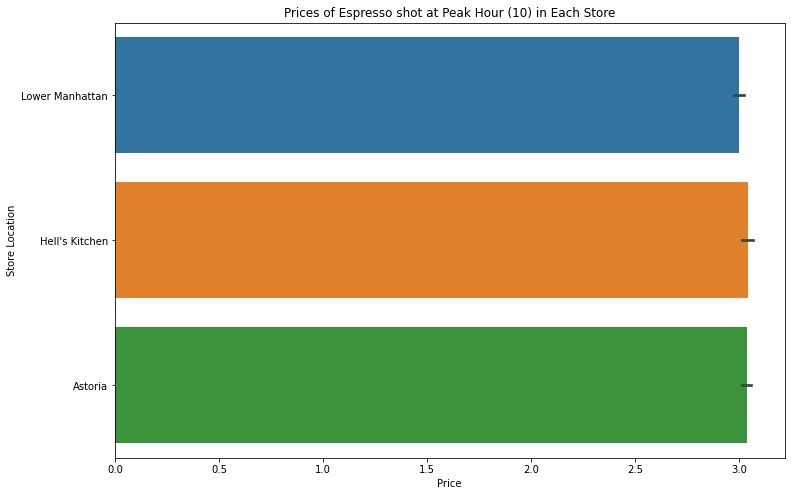

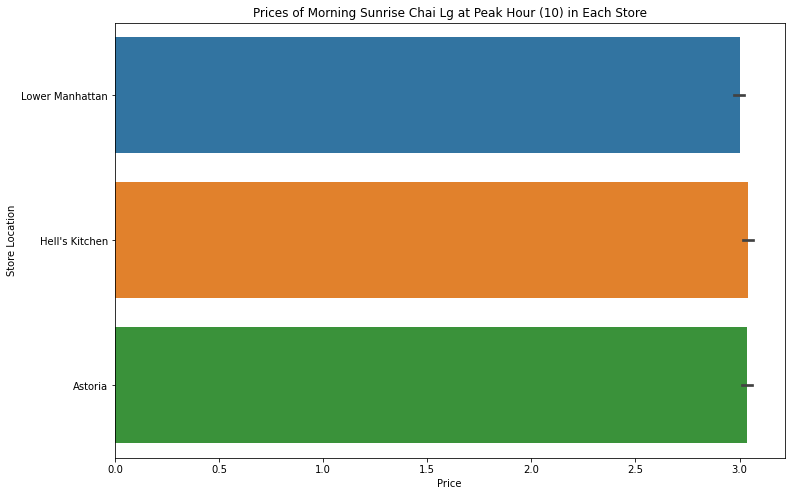

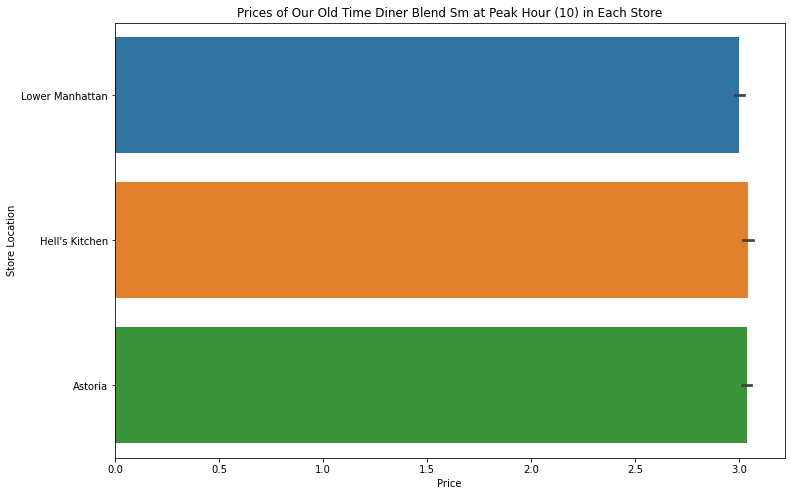

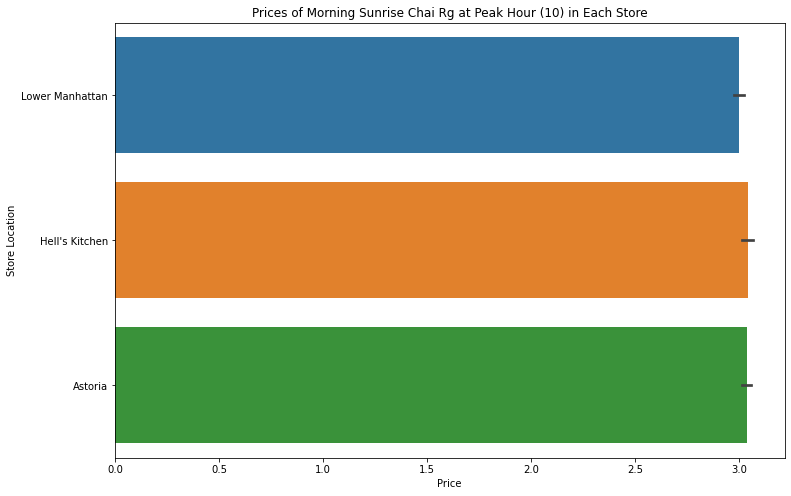

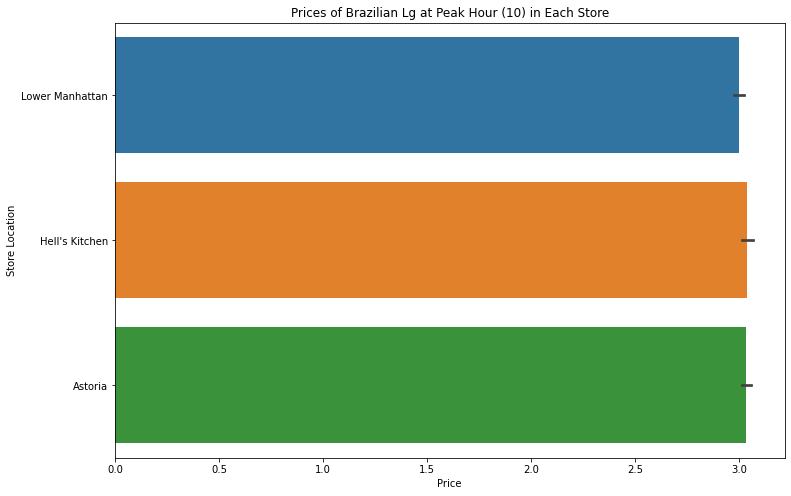

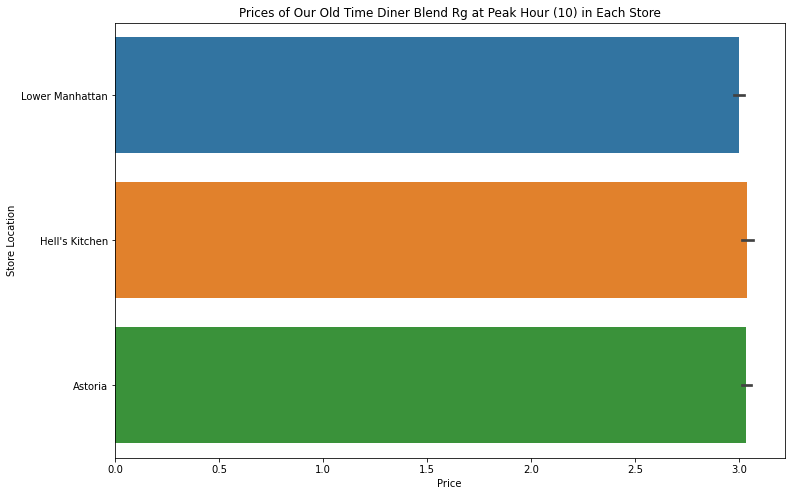

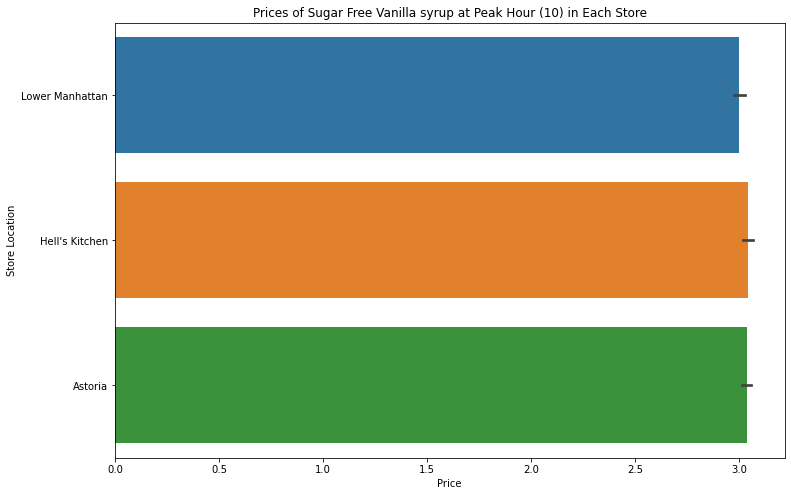

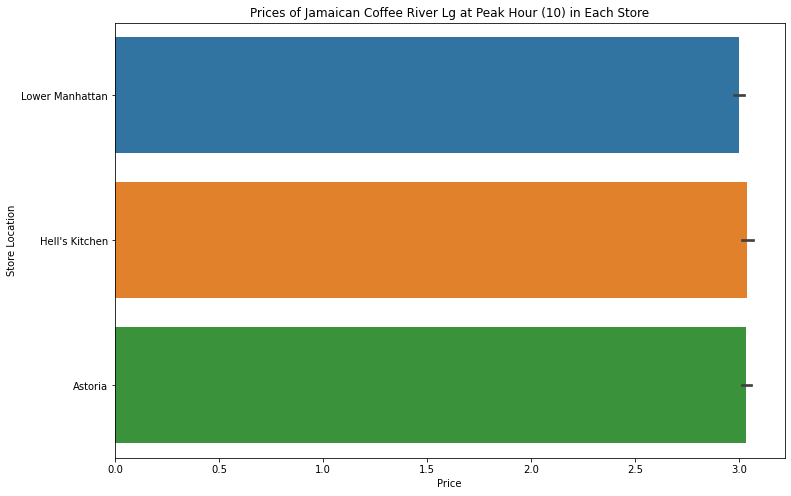

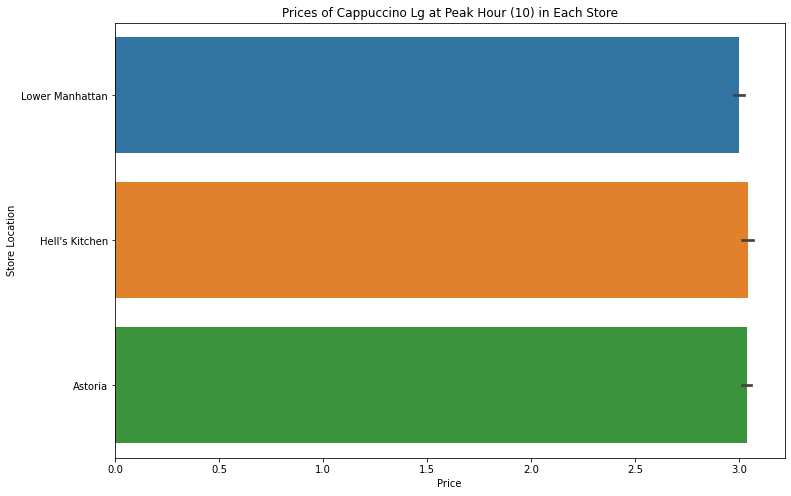

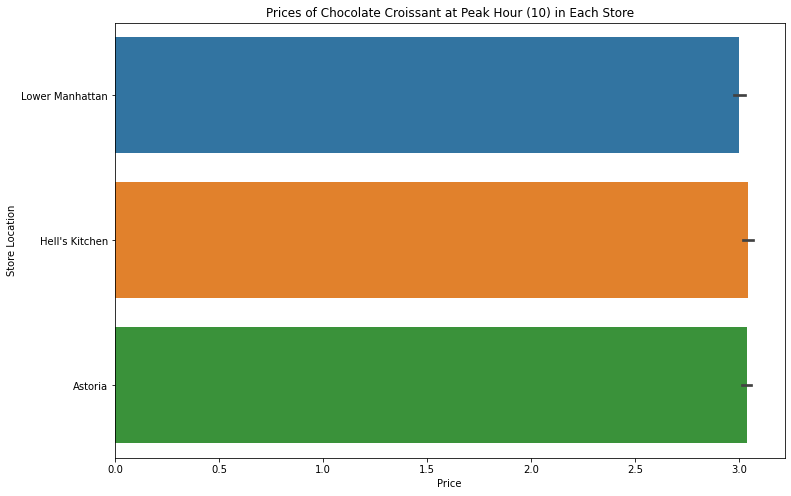

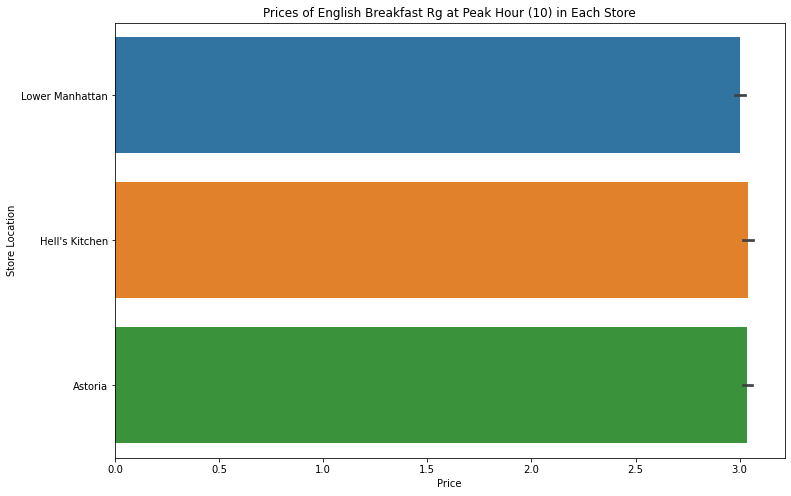

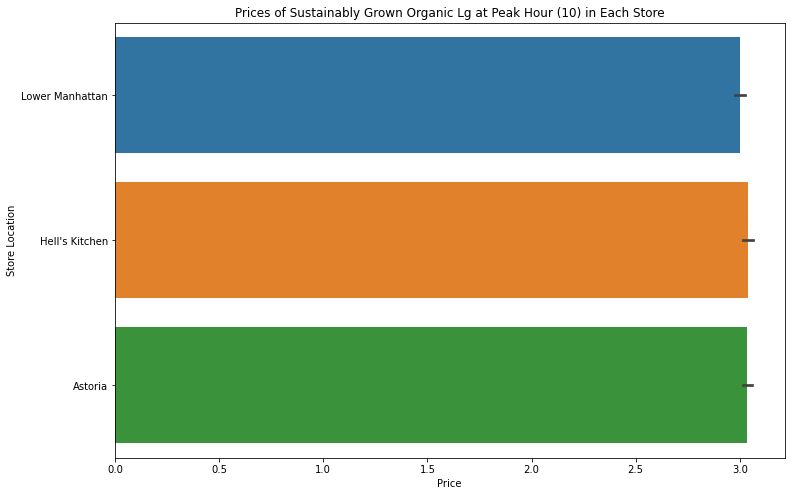

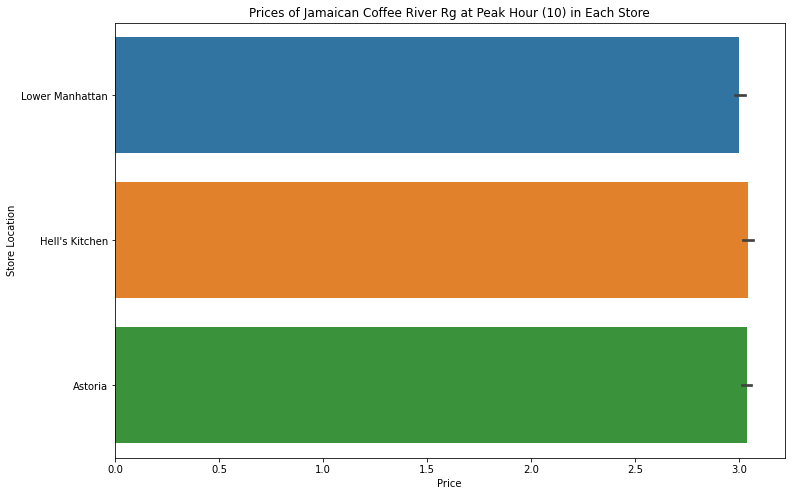

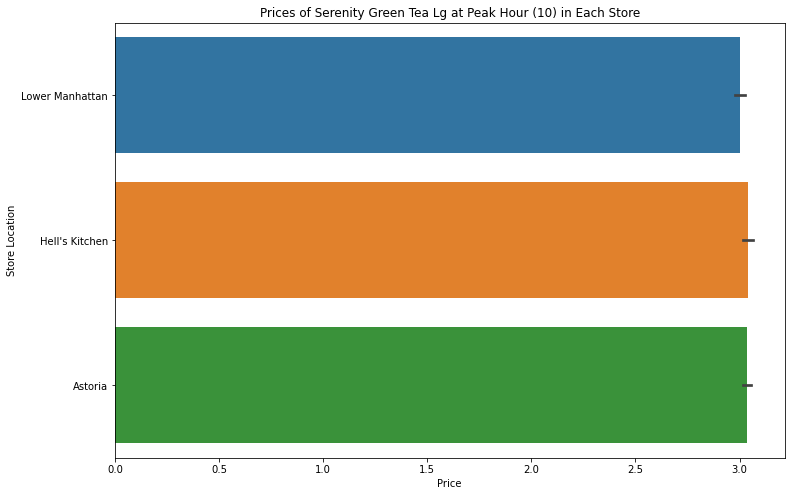

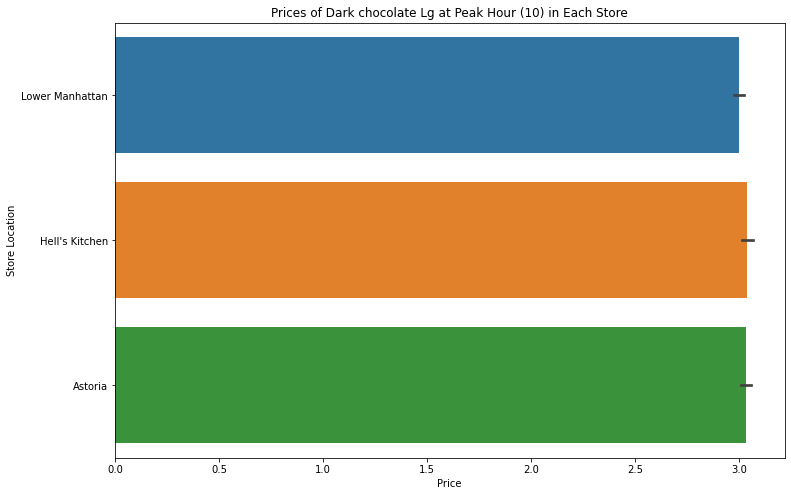

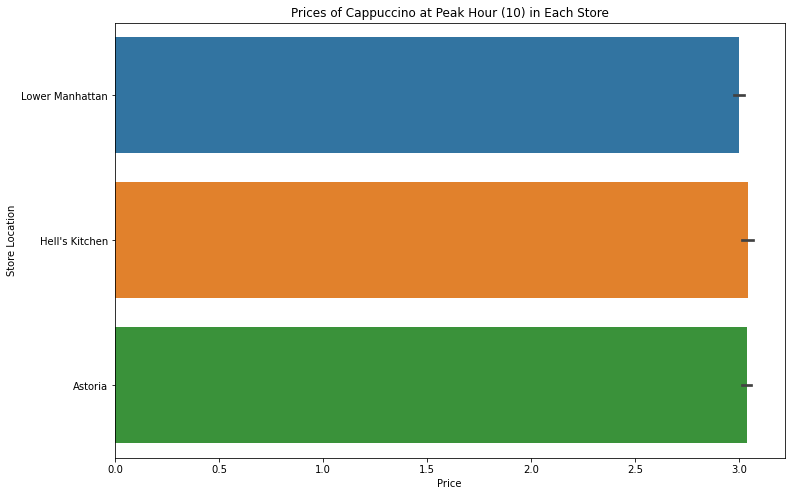

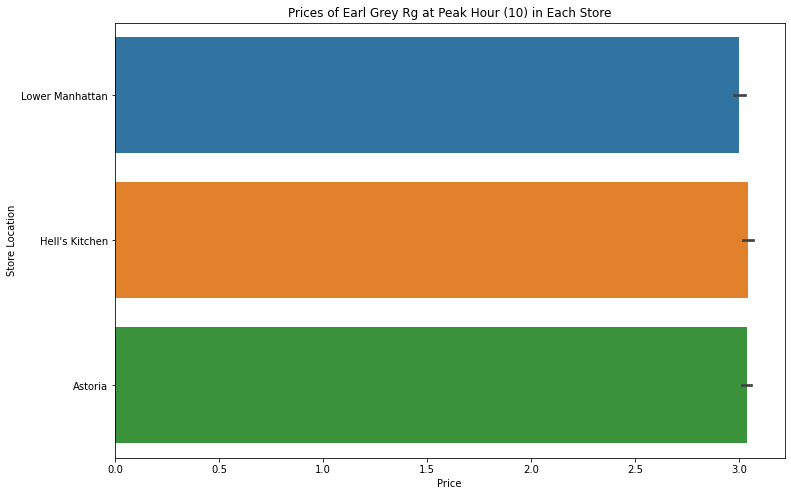

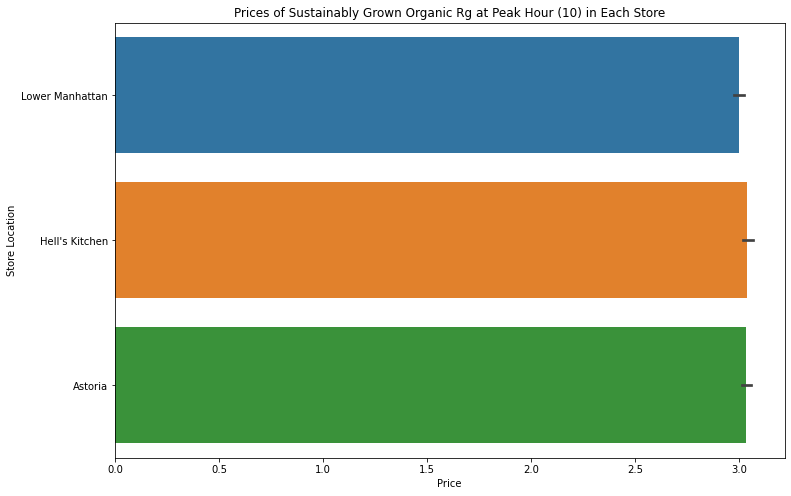

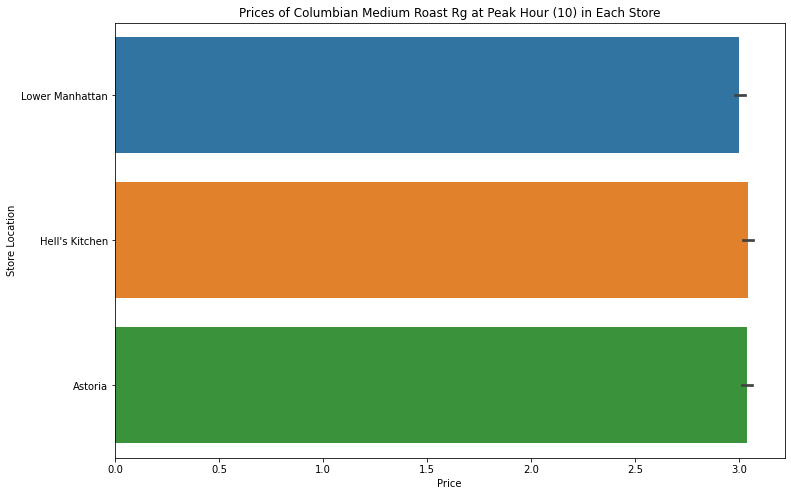

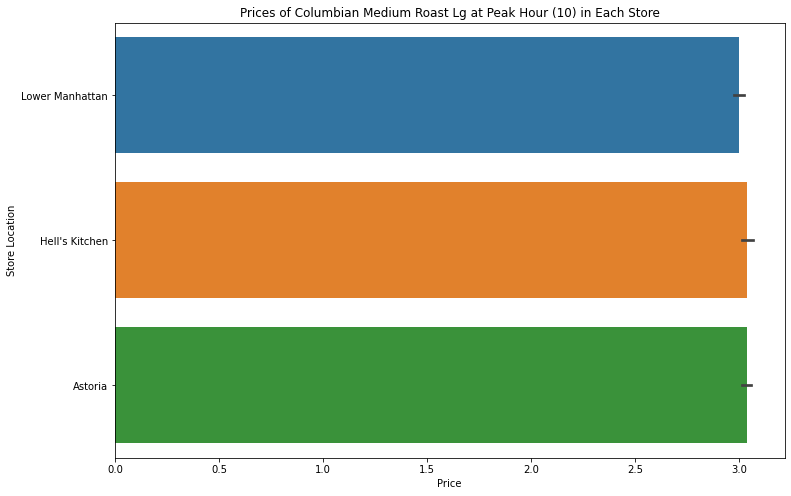

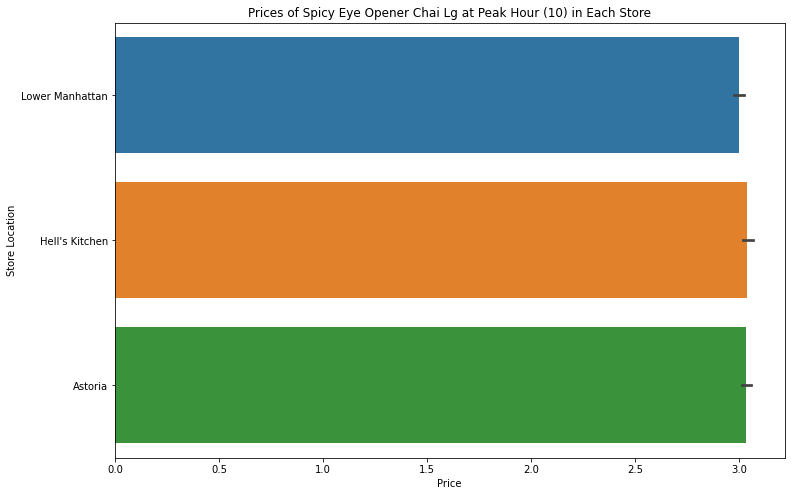

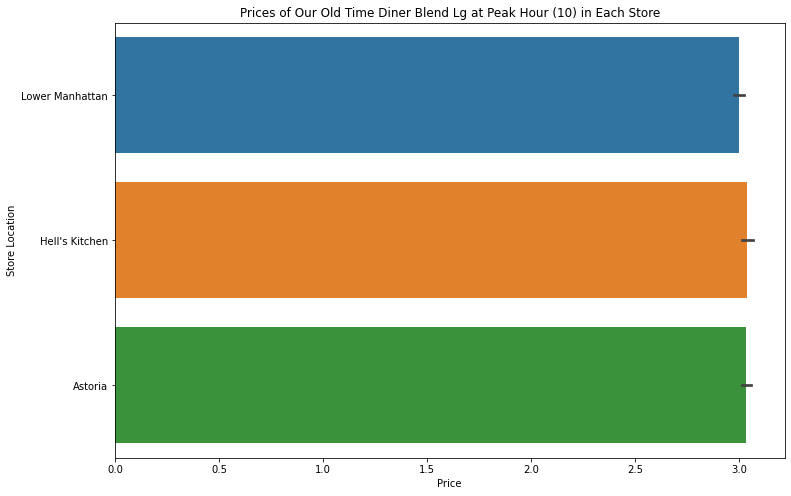

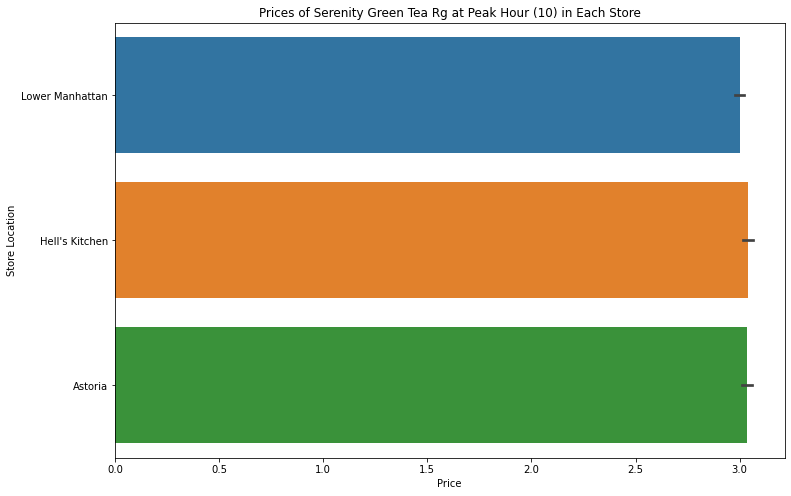

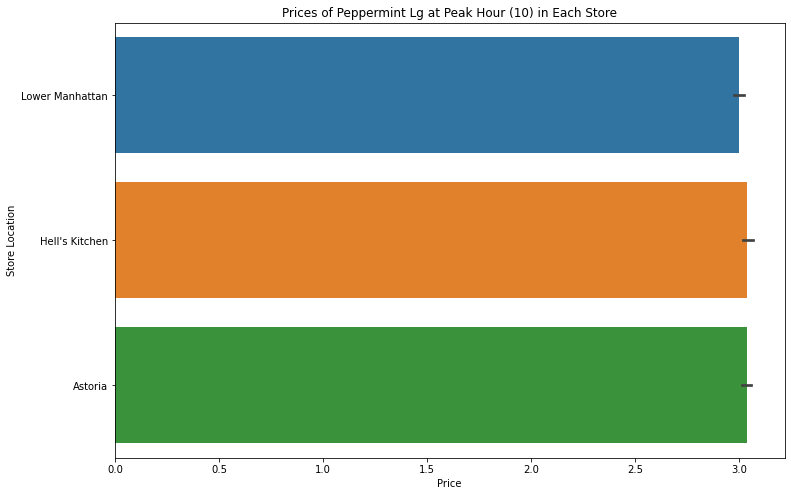

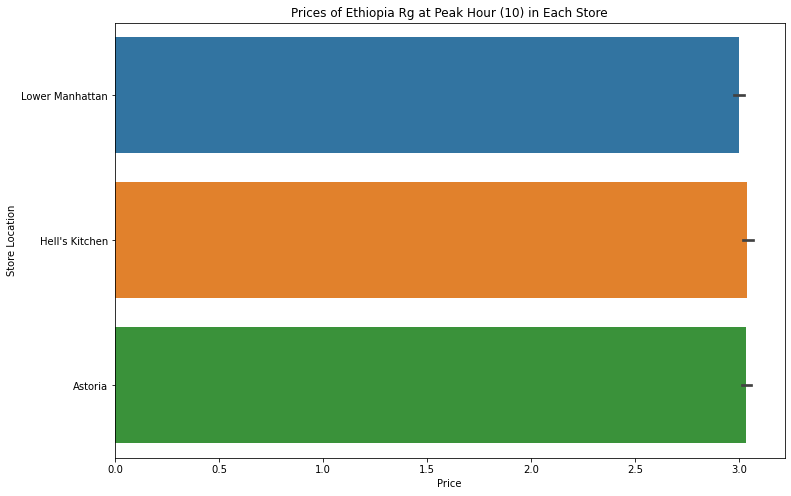

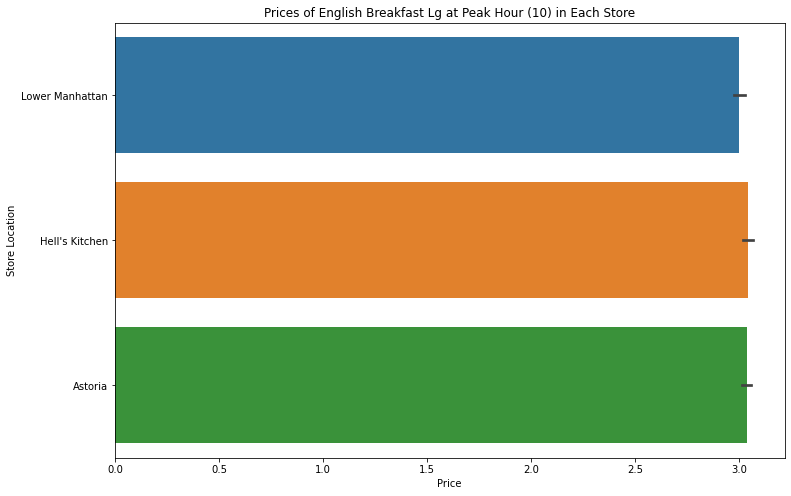

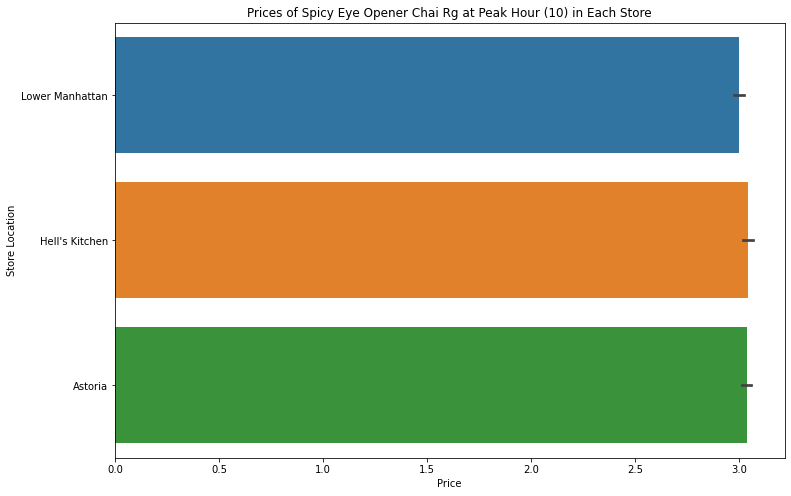

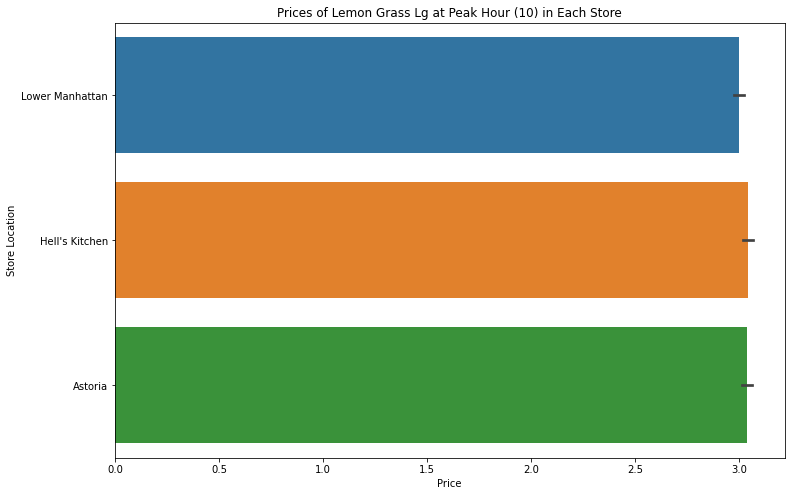

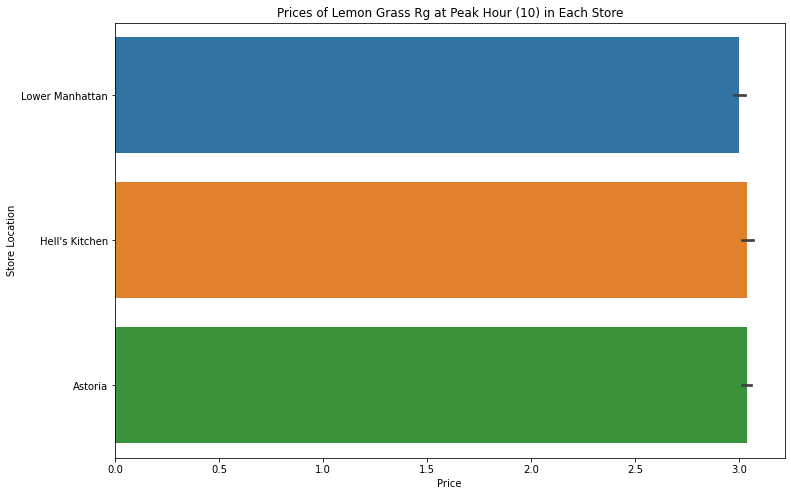

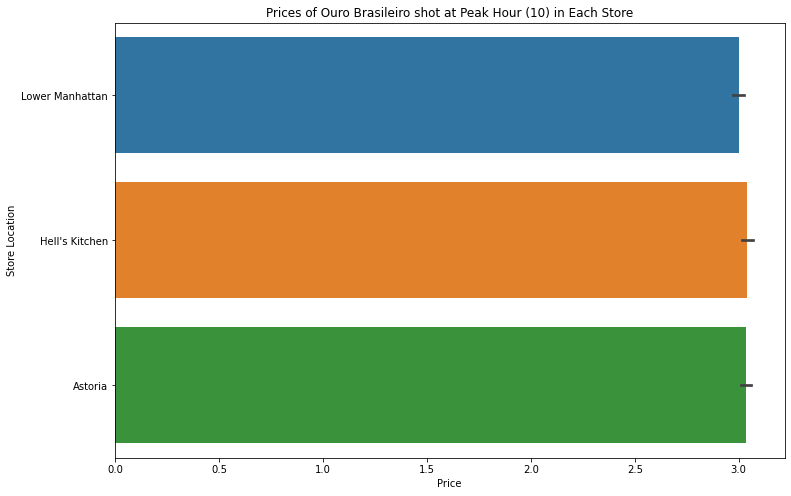

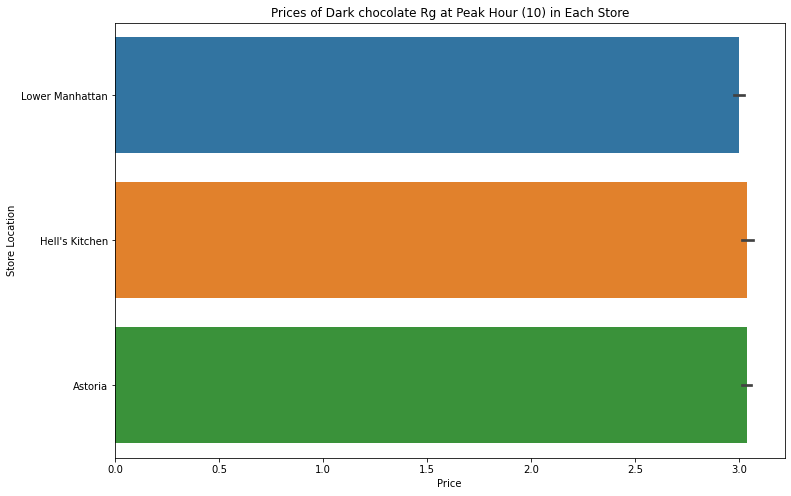

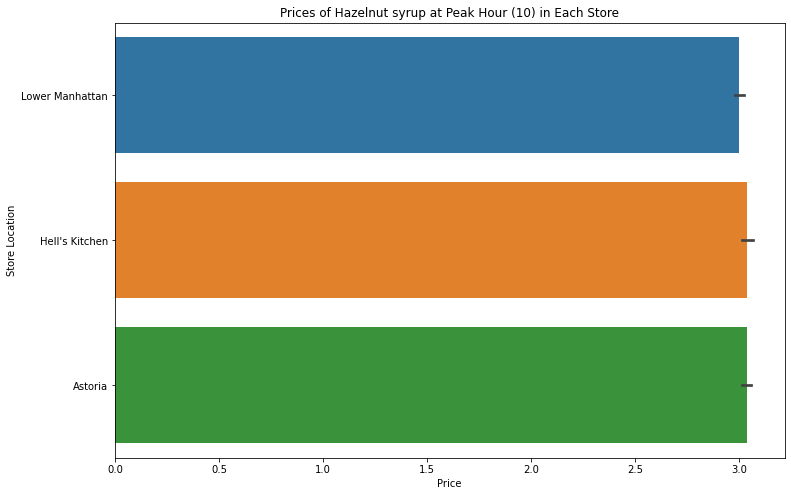

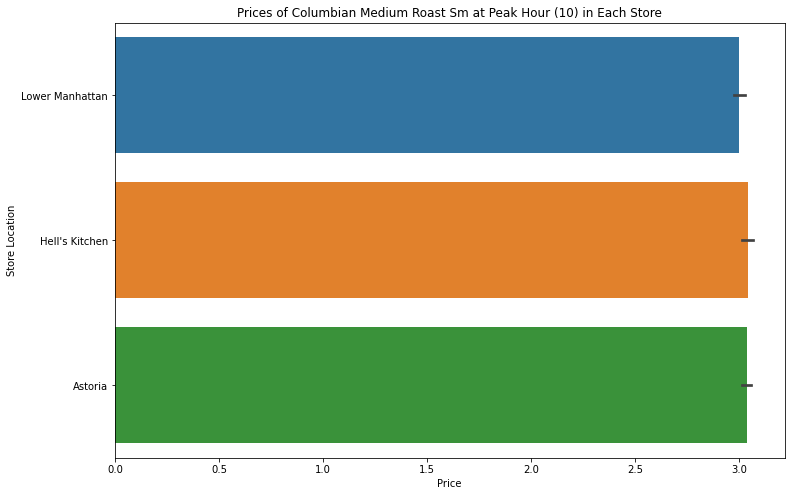

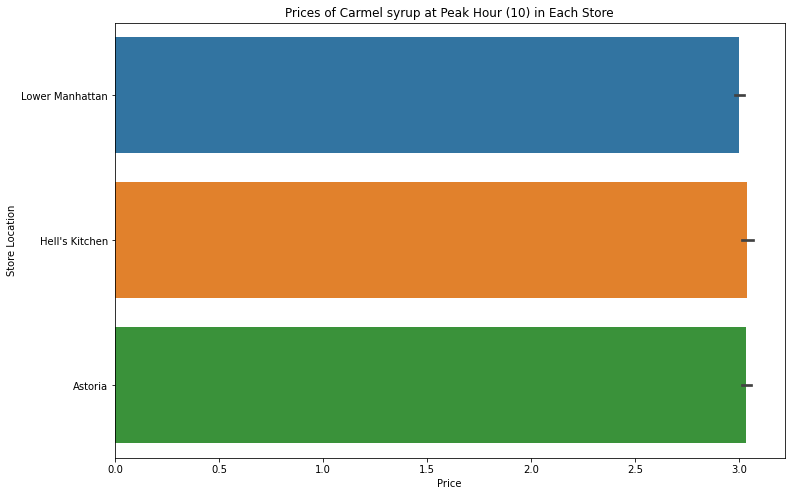

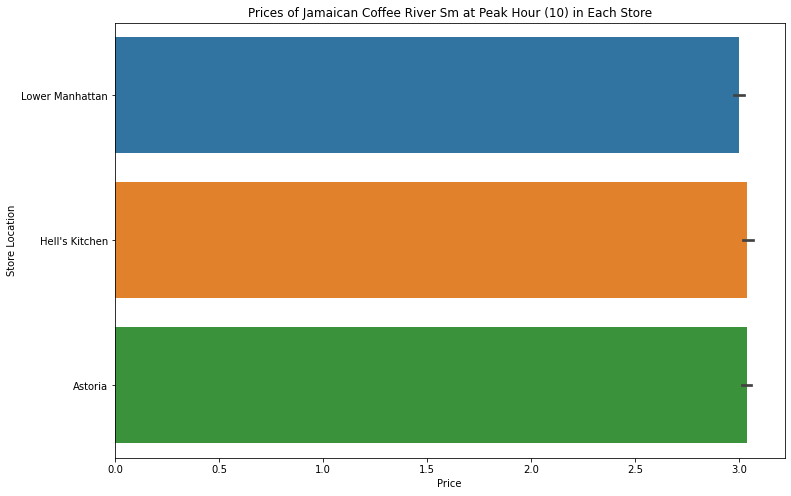

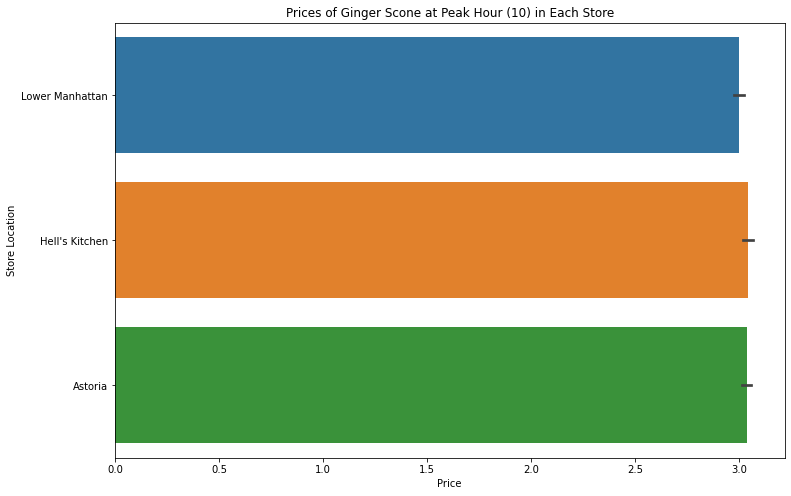

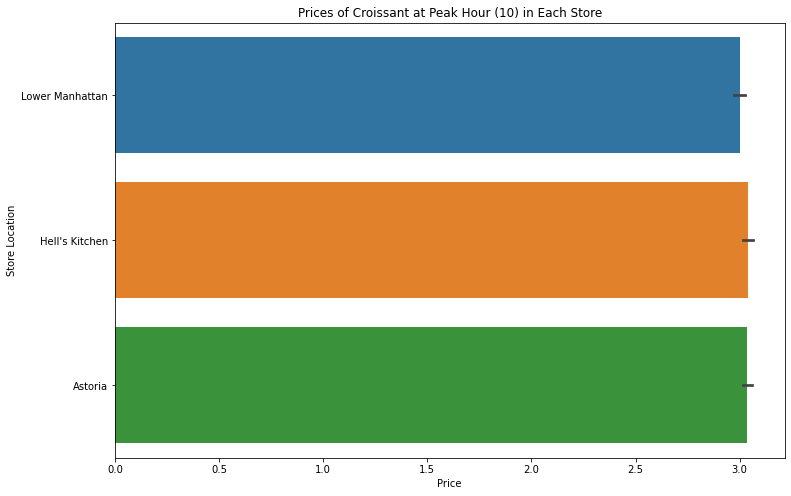

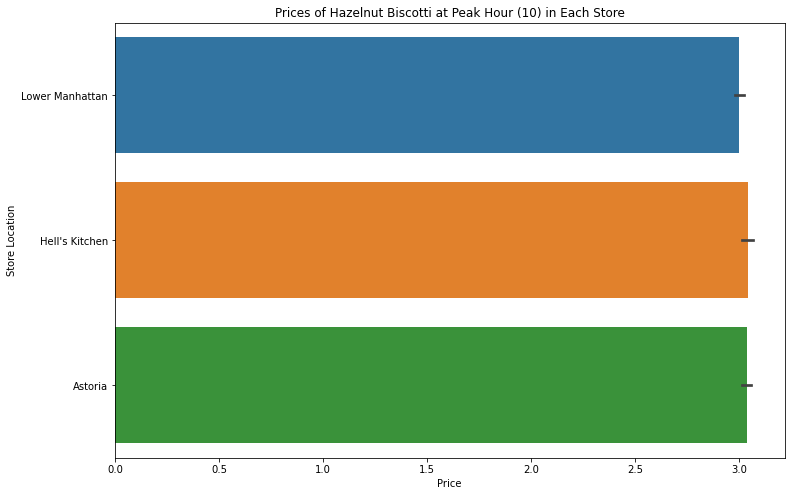

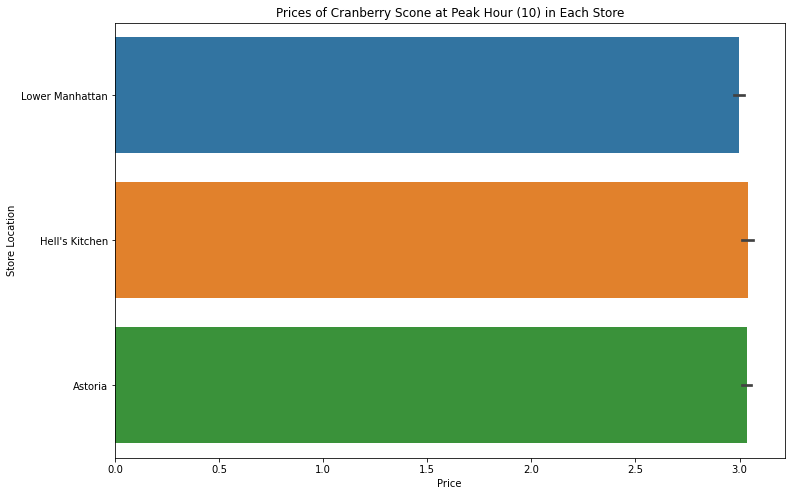

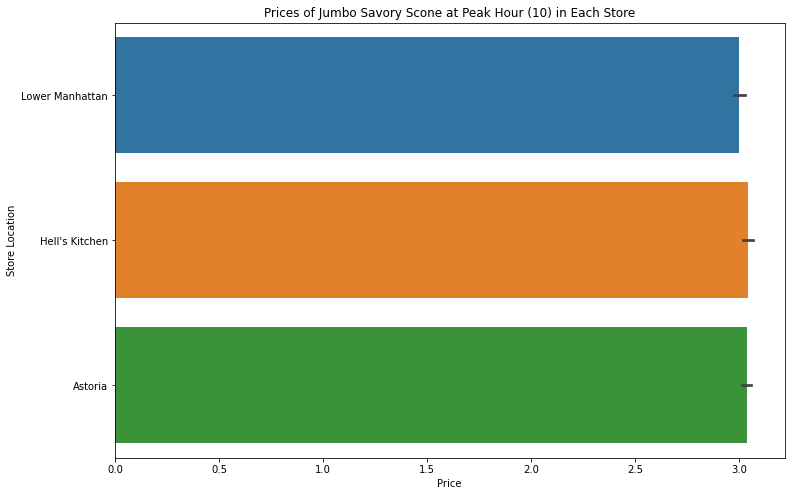

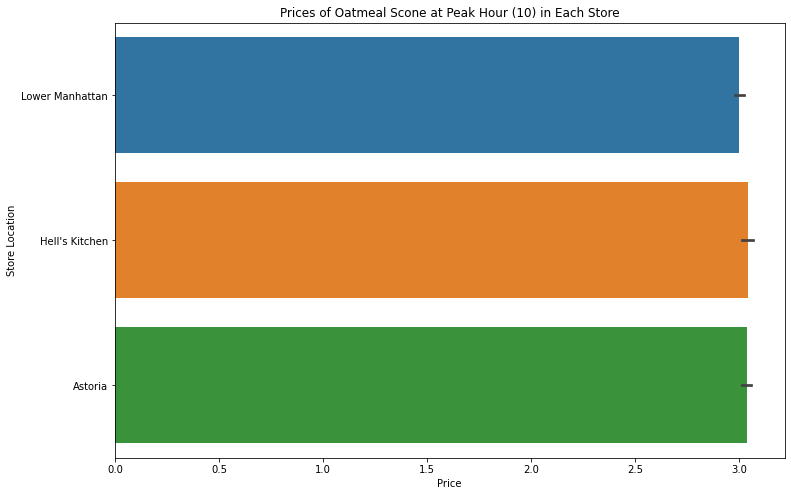

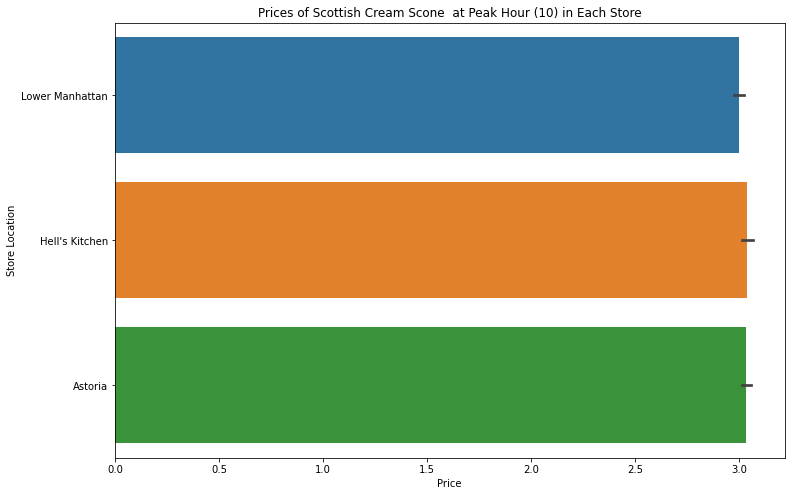

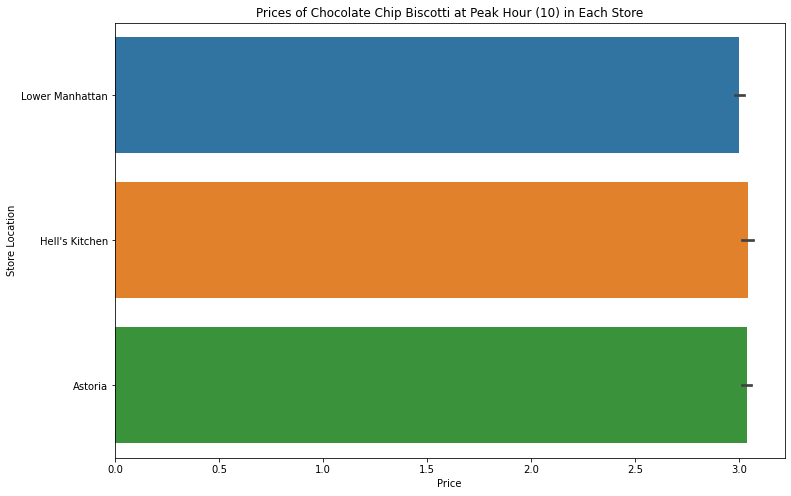

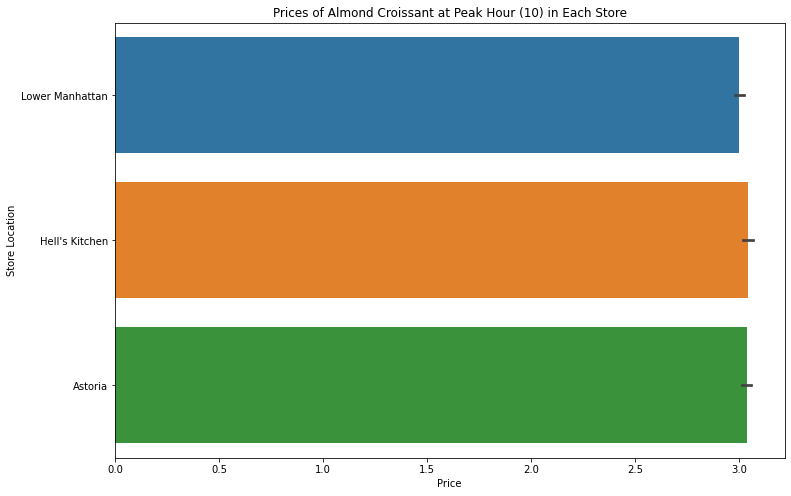

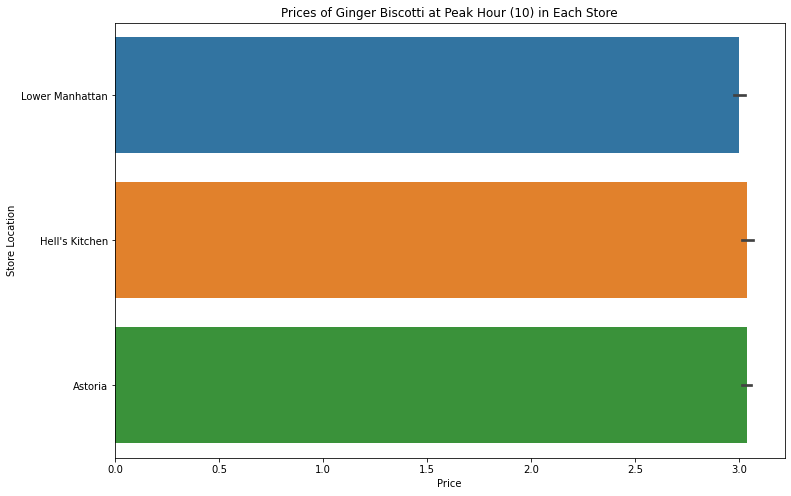

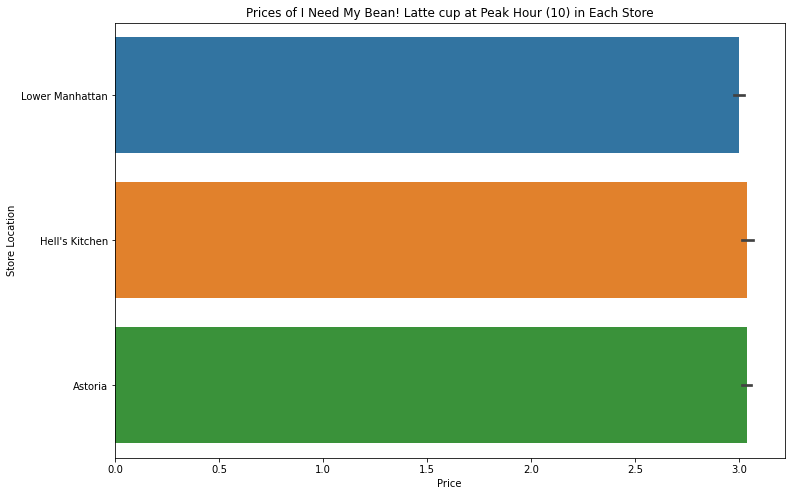

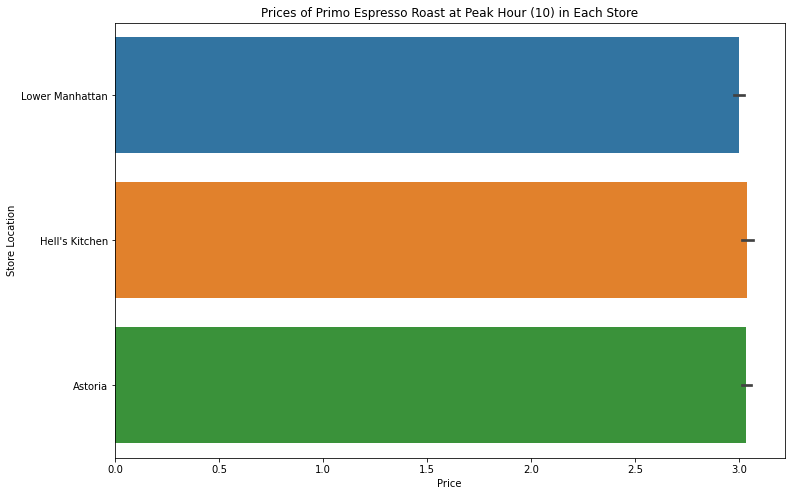

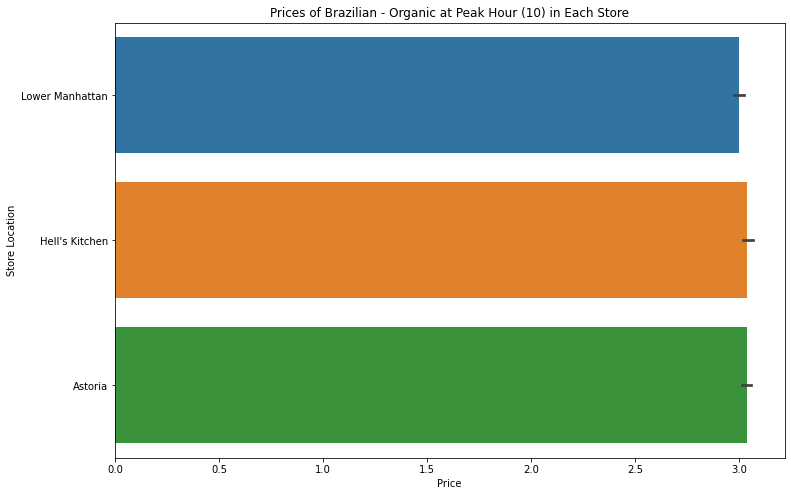

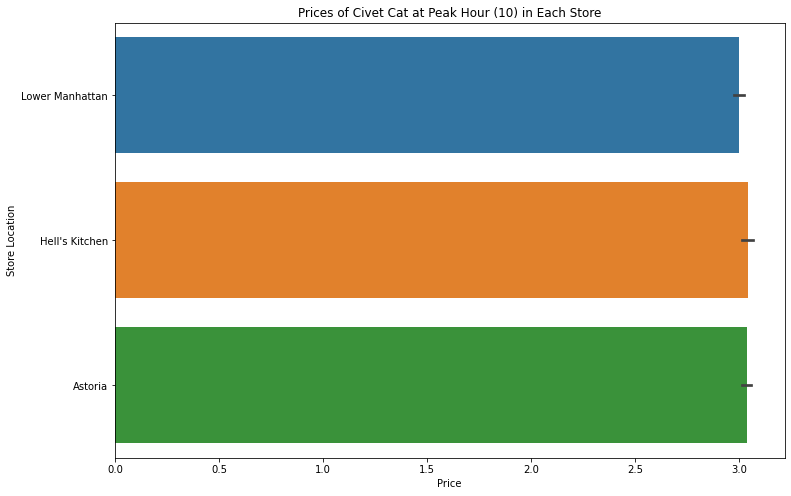

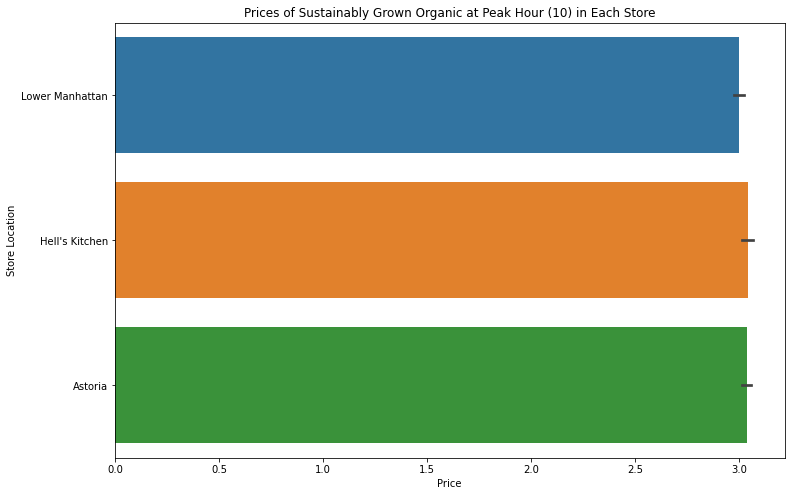

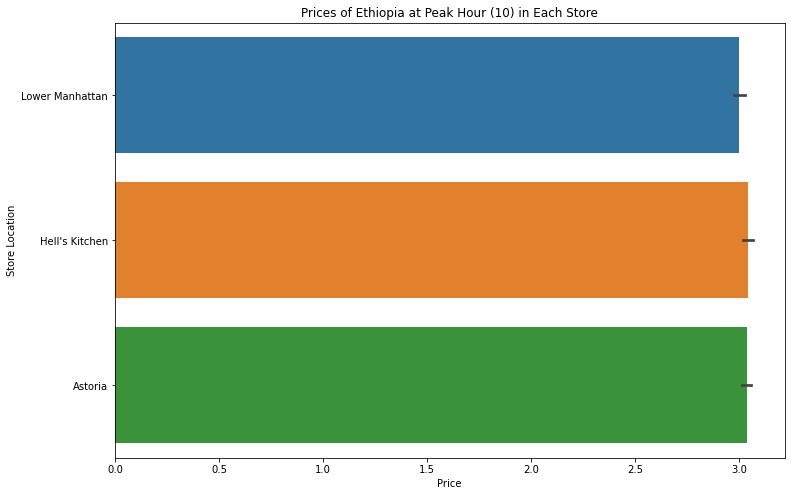

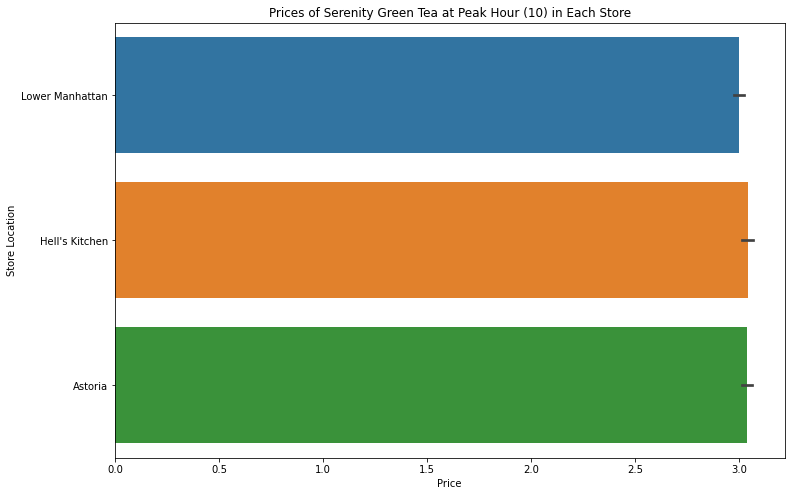

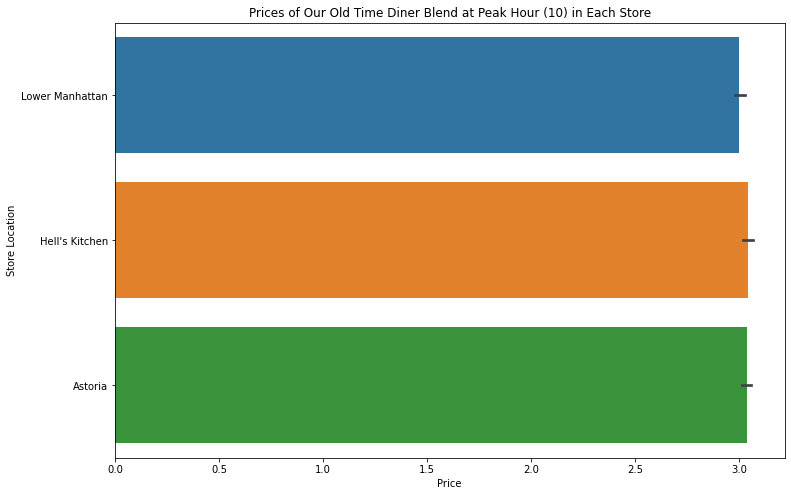

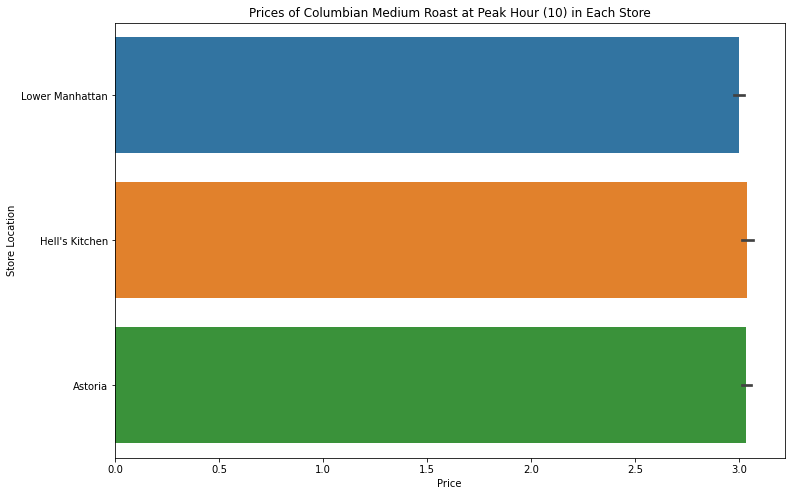

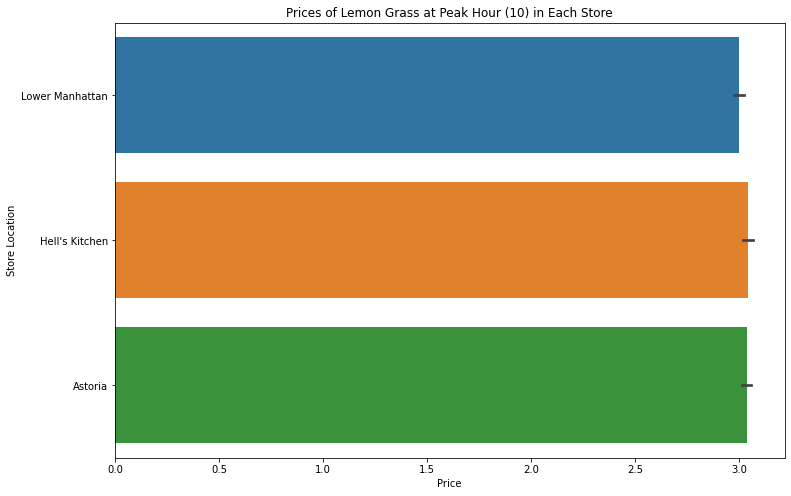

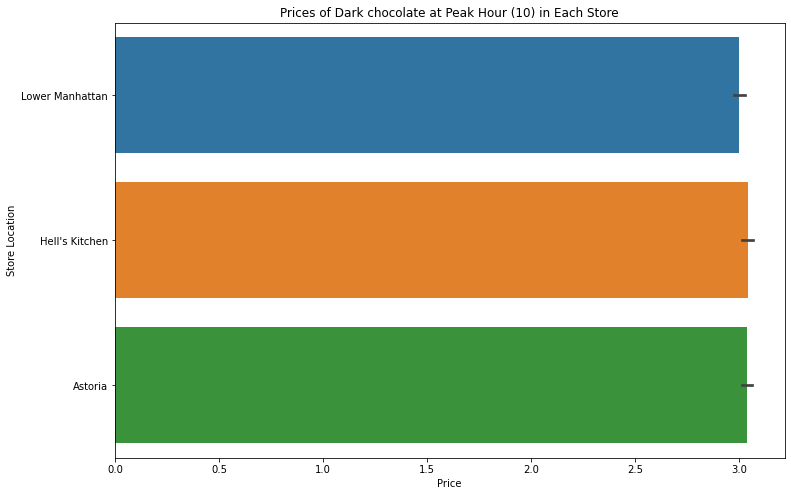

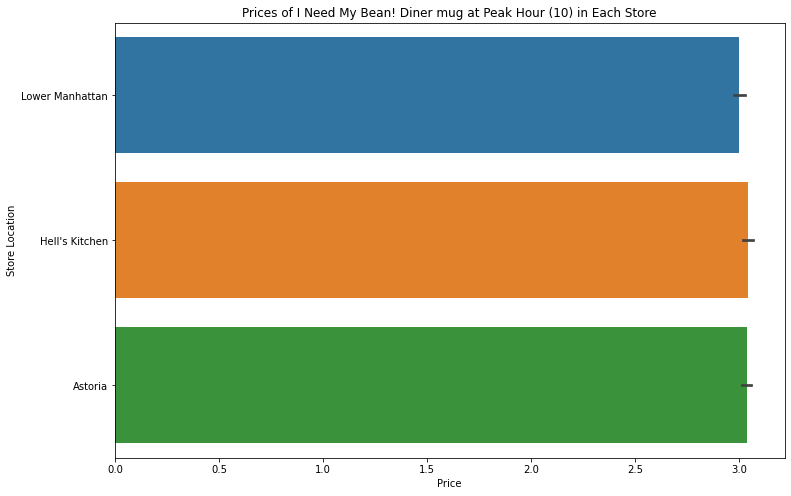

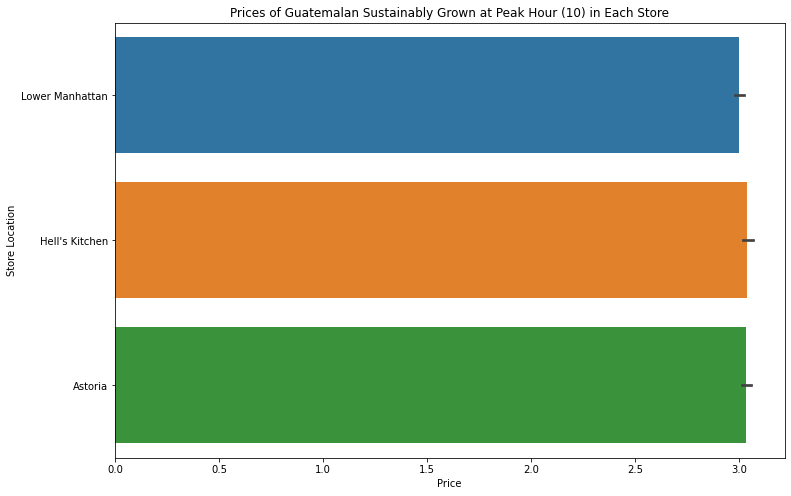

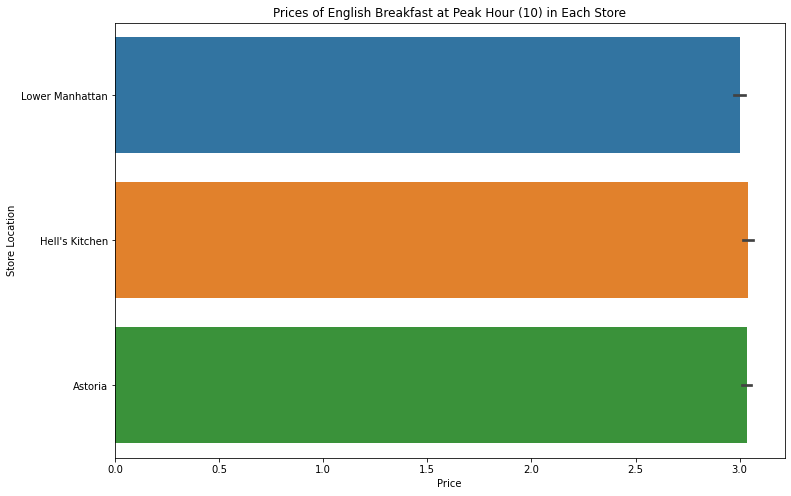

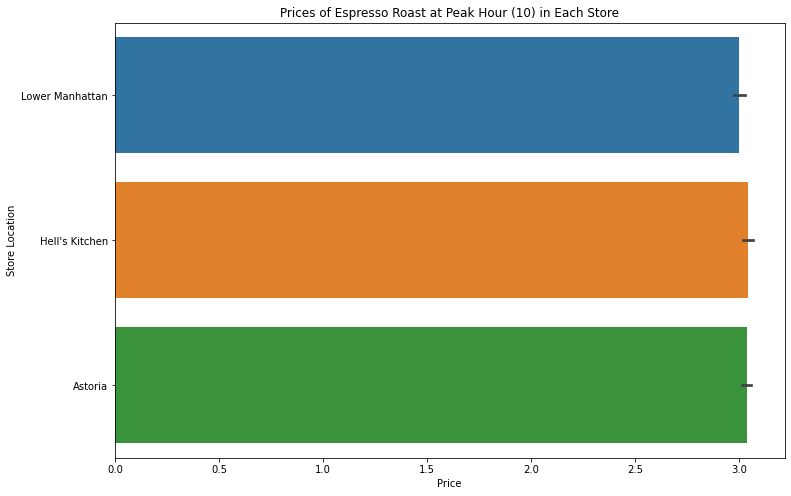

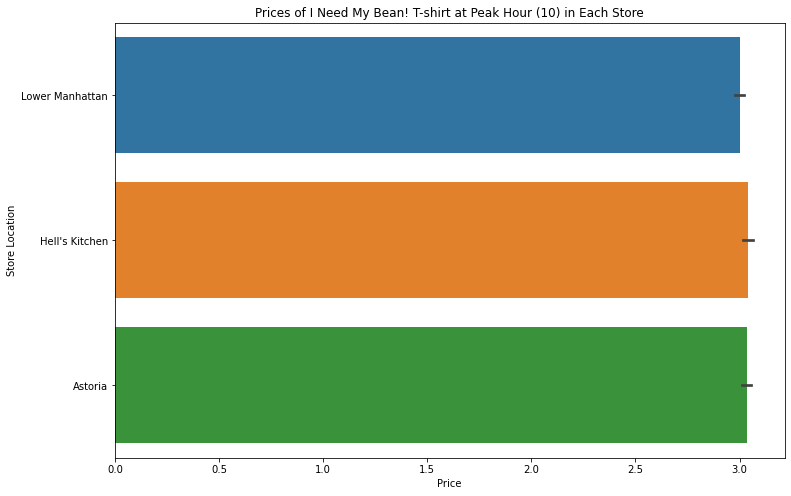

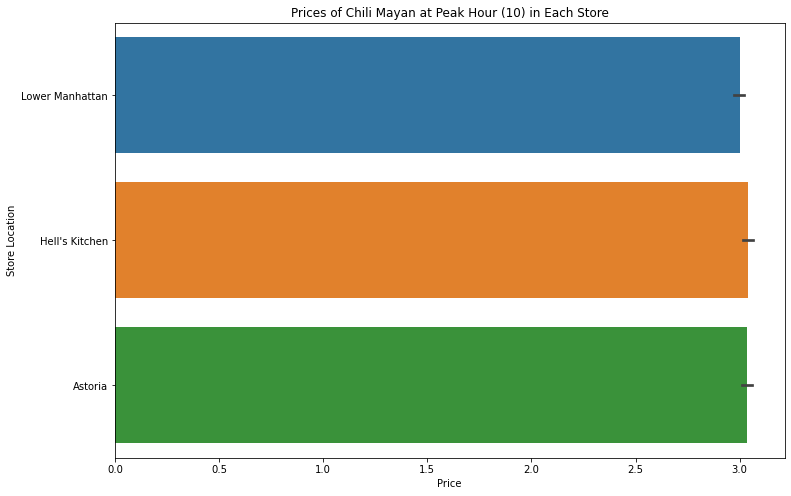

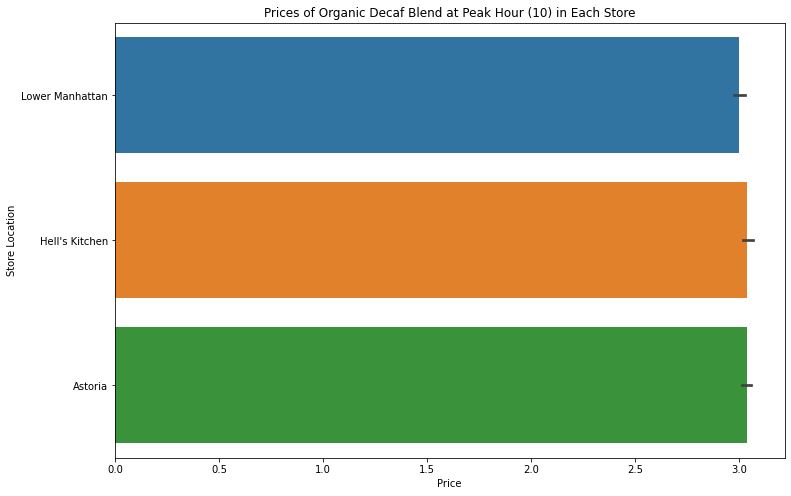

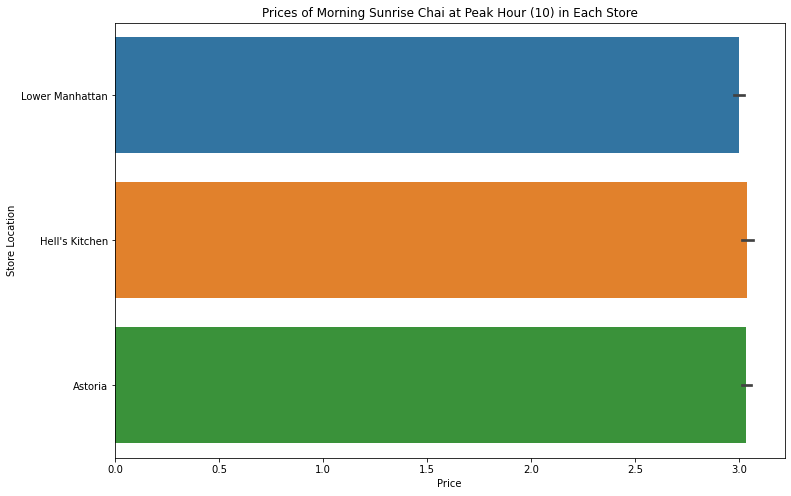

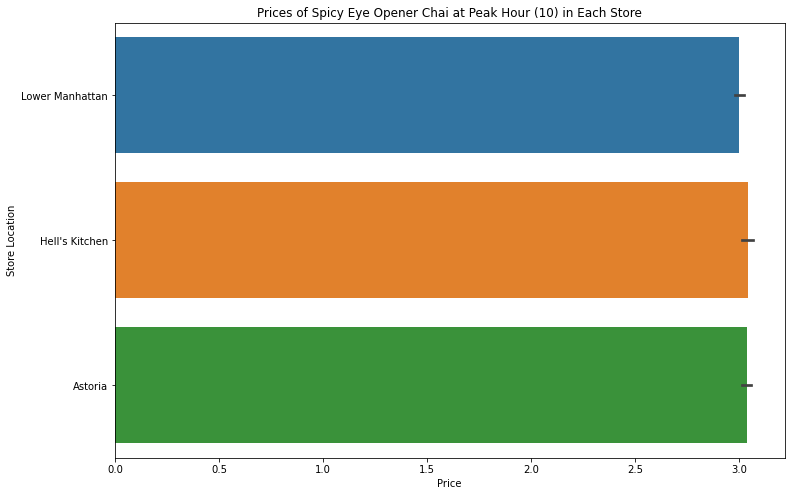

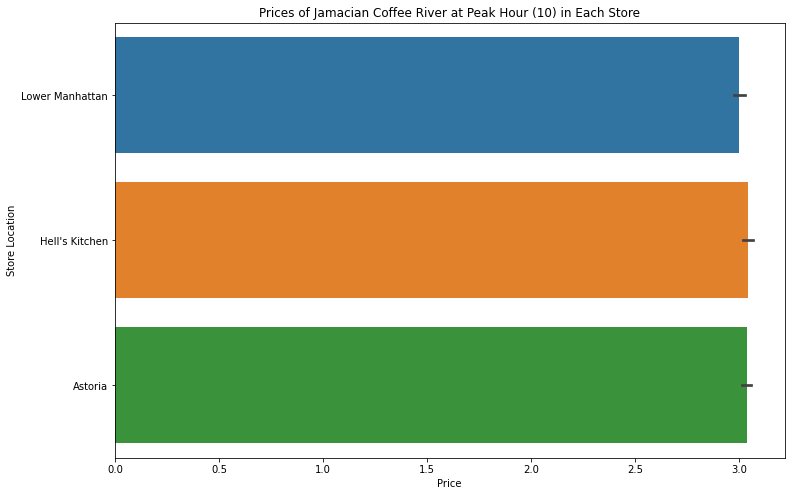

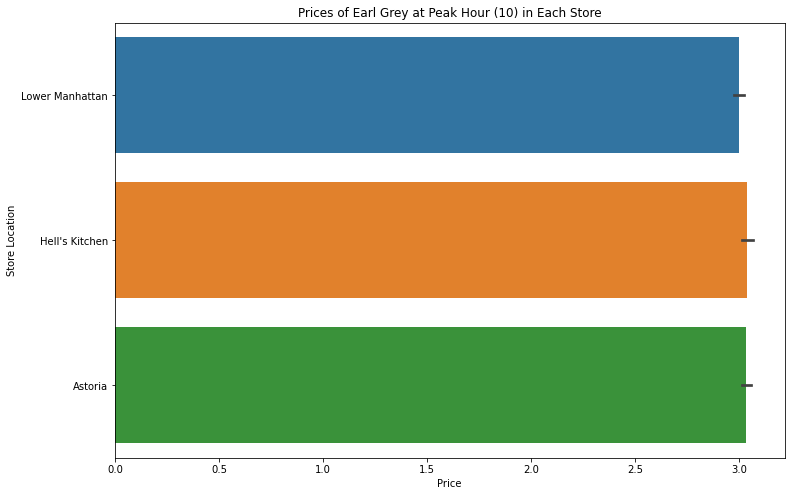

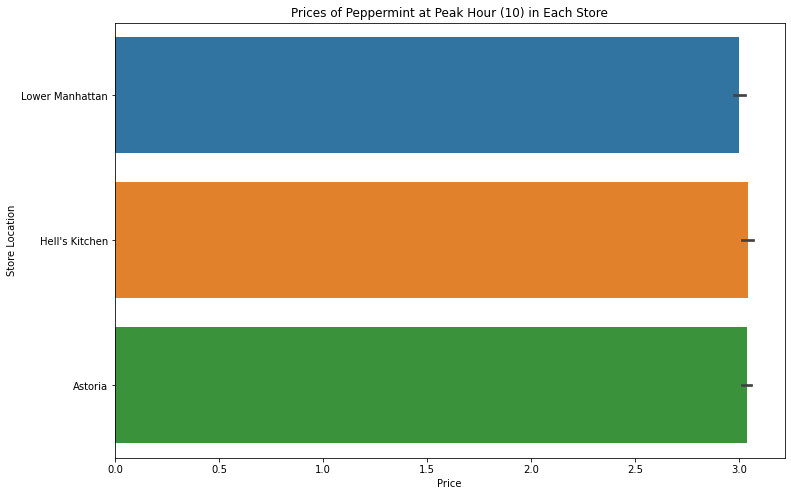

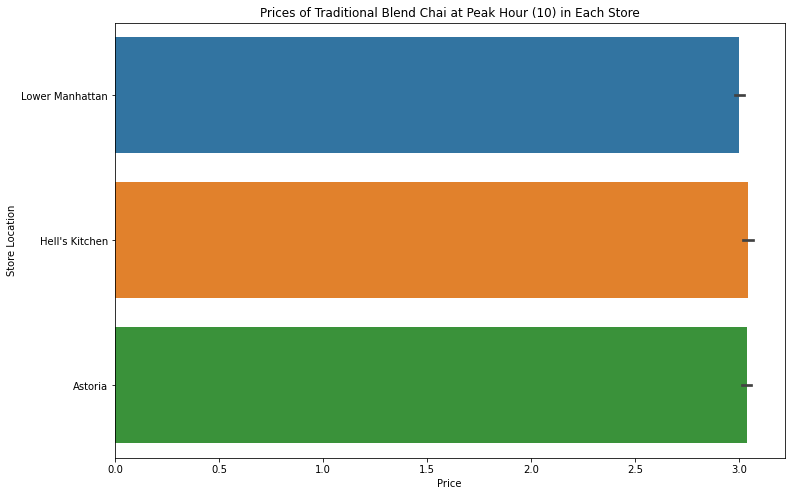

In [24]:
for product in popular_products_at_peak_hour['product_detail']:
    product_prices = unique_product_prices[unique_product_prices['product_detail'] == product]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='unit_price', y='store_location', data=df)
    plt.title(f'Prices of {product} at Peak Hour ({peak_hour}) in Each Store')
    plt.xlabel('Price')
    plt.ylabel('Store Location')
    plt.show()

In [25]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Load the dataset
#file_path = '/mnt/data/Coffee Shop Sales.xlsx'
#df = pd.read_excel(file_path)

# Convert transaction_time to datetime and extract the hour
#df['transaction_time'] = pd.to_datetime(df['transaction_time'])
#df['hour'] = df['transaction_time'].dt.hour

# Inspect the first few rows and columns to check data structure
#print(df.head())
#print(df.columns)


In [32]:
def compare_stores(df, store1, store2):
    # Filter data for the two stores
    store1_data = df[df['store_location'] == store1]
    store2_data = df[df['store_location'] == store2]

    # Best-selling products
    store1_best_products = store1_data.groupby('product_detail')['transaction_qty'].sum().reset_index().sort_values(by='transaction_qty', ascending=False)
    store2_best_products = store2_data.groupby('product_detail')['transaction_qty'].sum().reset_index().sort_values(by='transaction_qty', ascending=False)

    # Peak times
    store1_peak_time = store1_data.groupby('hour')['transaction_qty'].sum().reset_index().sort_values(by='transaction_qty', ascending=False).iloc[0]['hour']
    store2_peak_time = store2_data.groupby('hour')['transaction_qty'].sum().reset_index().sort_values(by='transaction_qty', ascending=False).iloc[0]['hour']

    # Best-selling categories (assuming 'category' column exists)
    if 'category' in df.columns:
        store1_best_category = store1_data.groupby('category')['transaction_qty'].sum().reset_index().sort_values(by='transaction_qty', ascending=False)
        store2_best_category = store2_data.groupby('category')['transaction_qty'].sum().reset_index().sort_values(by='transaction_qty', ascending=False)
    else:
        store1_best_category = pd.DataFrame()
        store2_best_category = pd.DataFrame()

    return store1_best_products, store2_best_products, store1_peak_time, store2_peak_time, store1_best_category, store2_best_category

# Compare Astoria vs Hell's Kitchen
astoria_vs_hells_kitchen = compare_stores(df, 'Astoria', 'Hell\'s Kitchen')
astoria_vs_lower_manhattan = compare_stores(df, 'Astoria', 'Lower Manhattan')
hells_kitchen_vs_lower_manhattan = compare_stores(df, 'Hell\'s Kitchen', 'Lower Manhattan')


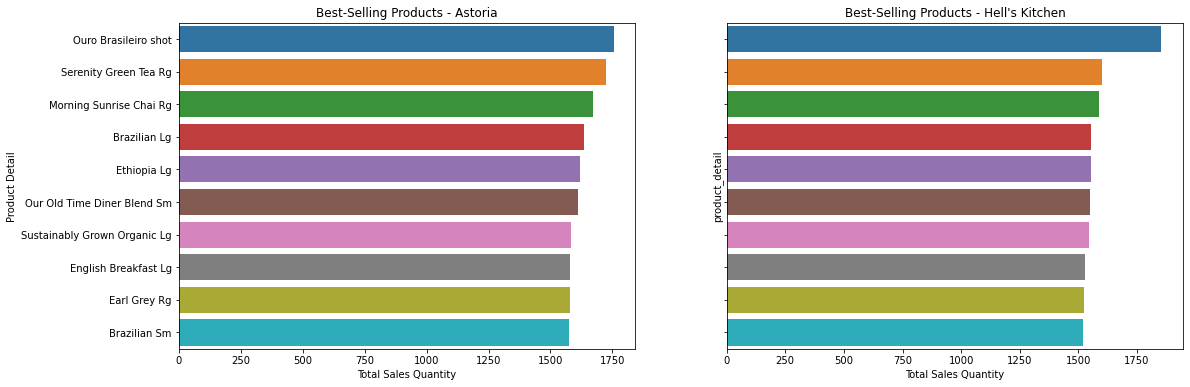

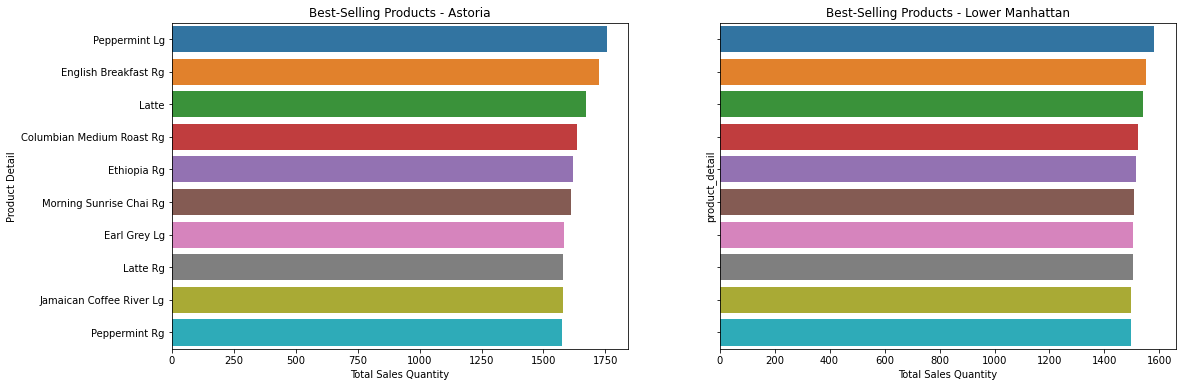

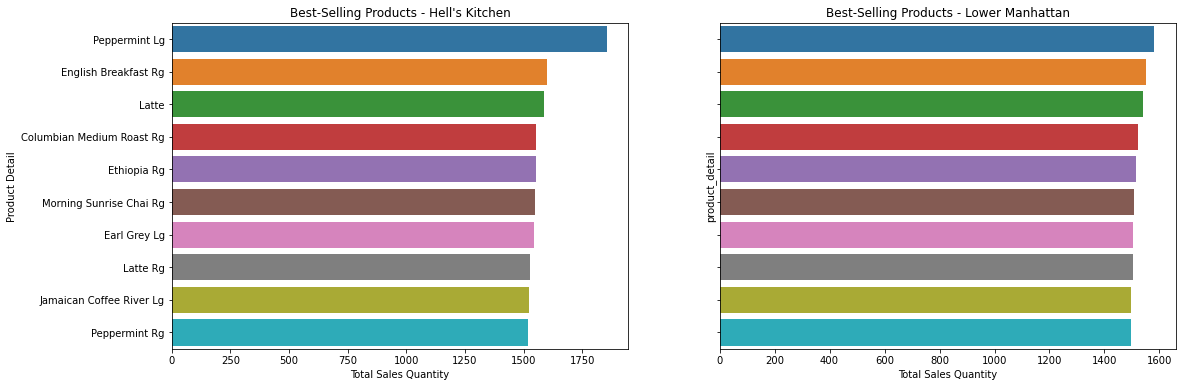

In [27]:
def plot_best_selling_products(store1, store2, store1_data, store2_data):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    sns.barplot(x='transaction_qty', y='product_detail', data=store1_data.head(10), ax=axes[0])
    axes[0].set_title(f'Best-Selling Products - {store1}')
    axes[0].set_xlabel('Total Sales Quantity')
    axes[0].set_ylabel('Product Detail')
    
    sns.barplot(x='transaction_qty', y='product_detail', data=store2_data.head(10), ax=axes[1])
    axes[1].set_title(f'Best-Selling Products - {store2}')
    axes[1].set_xlabel('Total Sales Quantity')
    
    plt.show()

# Plot Best-Selling Products for Astoria vs Hell's Kitchen
plot_best_selling_products('Astoria', 'Hell\'s Kitchen', astoria_vs_hells_kitchen[0], astoria_vs_hells_kitchen[1])
plot_best_selling_products('Astoria', 'Lower Manhattan', astoria_vs_lower_manhattan[0], astoria_vs_lower_manhattan[1])
plot_best_selling_products('Hell\'s Kitchen', 'Lower Manhattan', hells_kitchen_vs_lower_manhattan[0], hells_kitchen_vs_lower_manhattan[1])


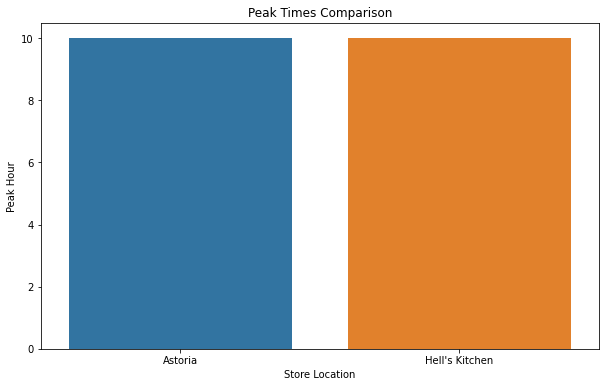

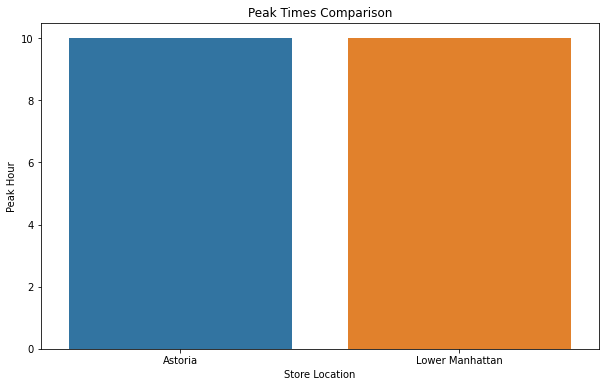

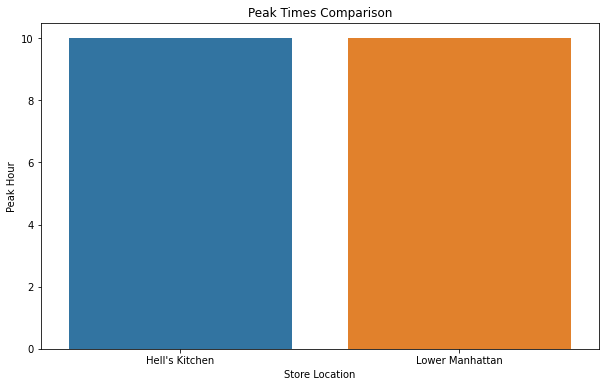

In [28]:
def plot_peak_times(store1, store2, store1_peak, store2_peak):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.barplot(x=[store1, store2], y=[store1_peak, store2_peak], ax=ax)
    ax.set_title('Peak Times Comparison')
    ax.set_xlabel('Store Location')
    ax.set_ylabel('Peak Hour')
    
    plt.show()

# Plot Peak Times for Astoria vs Hell's Kitchen
plot_peak_times('Astoria', 'Hell\'s Kitchen', astoria_vs_hells_kitchen[2], astoria_vs_hells_kitchen[3])
plot_peak_times('Astoria', 'Lower Manhattan', astoria_vs_lower_manhattan[2], astoria_vs_lower_manhattan[3])
plot_peak_times('Hell\'s Kitchen', 'Lower Manhattan', hells_kitchen_vs_lower_manhattan[2], hells_kitchen_vs_lower_manhattan[3])


In [4]:
#import seaborn as sns
#import matplotlib.pyplot as plt

def compare_unit_prices(df, store1, store2):
    # Filter data for the two stores
    store1_data = df[df['store_location'] == store1]
    store2_data = df[df['store_location'] == store2]

    # Combine the data for both stores with an additional column indicating the store
    store1_data['store'] = store1
    store2_data['store'] = store2
    combined_data = pd.concat([store1_data, store2_data])

    # Drop duplicates to avoid redundant comparisons
    combined_data = combined_data.drop_duplicates(subset=['store', 'product_detail', 'unit_price', 'category'])

    return combined_data
